In [1]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [2]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [3]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [4]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [5]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola'
Project_Folder_data = Project + Project_Name + '/mzml/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'canola_OzON'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola
Project_Folder_data: ./Projects/canola/mzml/
Project_results: ./Projects/canola/results/
file_name_to_save: canola_OzON
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [6]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [7]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/DegummedCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/RBDCanola_O3on_150gN3_02082023.mzML

Finished parsing all mzML files



In [8]:
df_MRM.head(None)

Class     Intensity                        Lipid  Parent_Ion  Product_Ion  \
0     NaN  5.451378e+05                          NaN       760.6        571.6   
1     NaN  6.208219e+05                          NaN       762.6        573.6   
2     NaN  9.441859e+05                          NaN       764.6        575.6   
3     NaN  1.137434e+06                          NaN       766.7        577.6   
4     NaN  5.900676e+05                          NaN       782.6        593.6   
..    ...           ...                          ...         ...          ...   
100   TAG  4.897507e+05            [TG(54:6)]_FA18:1       896.8        597.6   
101   TAG  1.179904e+06            [TG(54:5)]_FA18:1       898.8        599.6   
102   TAG  1.654774e+06  [TG(55:11),TG(54:4)]_FA18:1       900.8        601.6   
103   TAG  5.234119e+06  [TG(55:10),TG(54:3)]_FA18:1       902.8        603.6   
104   TAG  2.793856e+06   [TG(55:9),TG(54:2)]_FA18:1       904.8        605.6   

                            Sample_ID      Transition  
0    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
1    CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  
2    CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  
3    CrudeCanola_O3on_150gN3_02082023  766.7 -> 577.6  
4    CrudeCanola_O3on_150gN3_02082023  782.6 -> 593.6  
..                                ...             ...  
100    RBDCanola_O3on_150gN3_02082023  896.8 -> 597.6  
101    RBDCanola_O3on_150gN3_02082023  898.8 -> 599.6  
102    RBDCanola_O3on_150gN3_02082023  900.8 -> 601.6  
103    RBDCanola_O3on_150gN3_02082023  902.8 -> 603.6  
104    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  

[105 rows x 7 columns]

In [9]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

Lipid  Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
0        NaN       760.6        571.6        0.015933       190.400009   
1        NaN       760.6        571.6        0.032233       147.420013   
2        NaN       760.6        571.6        0.048550       153.620010   
3        NaN       760.6        571.6        0.064850       200.080017   
4        NaN       760.6        571.6        0.081167       206.900009   
...      ...         ...          ...             ...              ...   
225352   NaN       904.8        605.6       34.931700       148.500015   
225353   NaN       904.8        605.6       34.948000       131.800003   
225354   NaN       904.8        605.6       34.964317       151.960007   
225355   NaN       904.8        605.6       34.980617       137.700012   
225356   NaN       904.8        605.6       34.996933       103.460007   

                               Sample_ID      Transition  
0       CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
1       CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
2       CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
3       CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
4       CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
...                                  ...             ...  
225352    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
225353    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
225354    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
225355    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
225356    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  

[225357 rows x 7 columns]

The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [10]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (9.5, 21.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
582          760.6        571.6        9.507133       184.180008   
583          760.6        571.6        9.523450       207.180008   
584          760.6        571.6        9.539750       160.700012   
585          760.6        571.6        9.556067       102.660004   
586          760.6        571.6        9.572367        76.720009   
...            ...          ...             ...              ...   
224524       904.8        605.6       21.428717      2535.120117   
224525       904.8        605.6       21.445033      2666.960205   
224526       904.8        605.6       21.461333      2615.500244   
224527       904.8        605.6       21.477650      2479.740234   
224528       904.8        605.6       21.493950      2367.900146   

                               Sample_ID      Transition  
582     CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
583     CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
584     CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
585     CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
586     CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  
...                                  ...             ...  
224524    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
224525    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
224526    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
224527    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  
224528    RBDCanola_O3on_150gN3_02082023  904.8 -> 605.6  

[77262 rows x 6 columns]

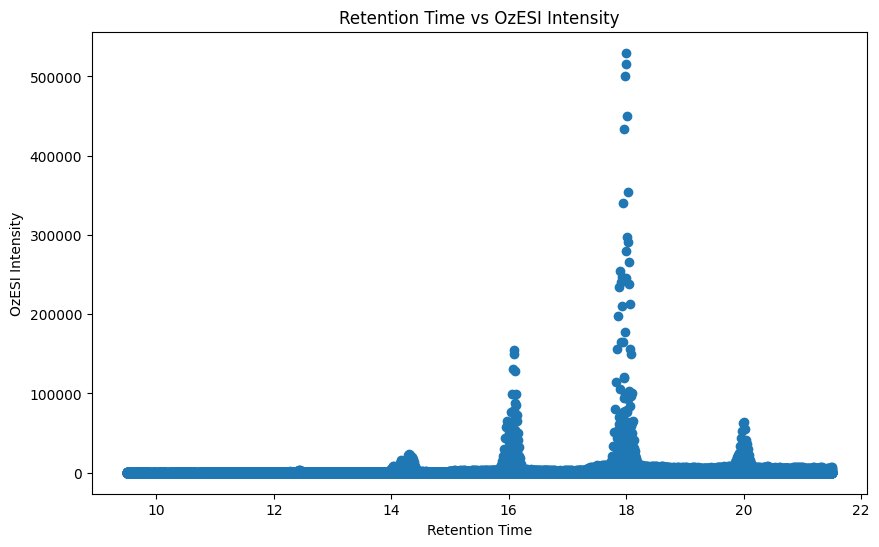

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [12]:
# Assuming d1 is your DataFrame and contains 'Retention_Time', 'Parent_Ion', 'Product_Ion', and 'OzESI_Intensity' columns

# Define the retention time range
retention_time_range = (12, 16)

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Filter to get only the rows with specific transition and OzESI_Intensity > 500
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6) & (n7_values['OzESI_Intensity'] > 300)]

# Display the filtered DataFrame
specific_transition.tail(50)


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
99588        790.7        573.6       14.084583       397.560028   
99589        790.7        573.6       14.100900       430.180023   
99590        790.7        573.6       14.117200       512.180054   
99591        790.7        573.6       14.133517       540.140015   
99592        790.7        573.6       14.149817       557.340027   
99593        790.7        573.6       14.166133       626.900024   
99594        790.7        573.6       14.182433       616.880066   
99595        790.7        573.6       14.198750       640.020020   
99596        790.7        573.6       14.215050       568.680054   
99597        790.7        573.6       14.231367       625.380066   
99598        790.7        573.6       14.247667       621.540039   
99599        790.7        573.6       14.263967       532.760010   
99600        790.7        573.6       14.280283       316.920013   
99621        790.7        573.6       14.622750       342.860016   
99622        790.7        573.6       14.639067       302.420013   
99658        790.7        573.6       15.226150       319.300018   
99659        790.7        573.6       15.242450       355.020020   
99662        790.7        573.6       15.291383       320.600037   
99663        790.7        573.6       15.307683       364.360016   
174626       790.7        573.6       12.763633       324.960022   
174639       790.7        573.6       12.975633       316.220032   
174646       790.7        573.6       13.089783       314.920013   
174647       790.7        573.6       13.106100       303.540009   
174651       790.7        573.6       13.171333       303.080017   
174710       790.7        573.6       14.133500       301.400024   
174711       790.7        573.6       14.149800       395.920013   
174712       790.7        573.6       14.166117       409.720032   
174713       790.7        573.6       14.182417       359.880035   
174714       790.7        573.6       14.198717       412.340027   
174715       790.7        573.6       14.215033       443.200043   
174716       790.7        573.6       14.231333       473.460022   
174717       790.7        573.6       14.247650       317.380035   
174718       790.7        573.6       14.263950       351.500031   
174719       790.7        573.6       14.280267       387.020020   
174720       790.7        573.6       14.296567       456.240021   
174721       790.7        573.6       14.312883       492.080048   
174722       790.7        573.6       14.329183       460.600037   
174723       790.7        573.6       14.345500       410.420044   
174724       790.7        573.6       14.361800       385.500031   
174725       790.7        573.6       14.378117       396.140015   
174726       790.7        573.6       14.394417       399.740021   
174727       790.7        573.6       14.410733       323.400024   
174728       790.7        573.6       14.427033       337.180023   
174734       790.7        573.6       14.524883       304.920013   
174737       790.7        573.6       14.573800       317.380035   
174738       790.7        573.6       14.590117       326.360016   
174766       790.7        573.6       15.046733       307.860016   
174770       790.7        573.6       15.111967       319.440033   
174818       790.7        573.6       15.894750       321.040009   
174819       790.7        573.6       15.911050       308.900024   

                                  Sample_ID      Transition  
99588   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99589   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99590   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99591   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99592   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99593   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99594   DegummedCanola_O3on_150gN3_02082023  790.7 -> 573.6  
99595   DegummedCanola_O3on_150gN3_02082023

Correct RTs add DB position based on correct RT

In [13]:
Correct_RT_directory = 'tools/RT/'
#MRM CORRECT RT DF
df_MRM_RT_correct = pd.read_csv(Correct_RT_directory + 'CLAW_Canola_CorrectRT_v3_manual.csv') #correct MRM RT
# df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time']

# List of new column names based on db_pos_list
db_column_names = []
db_pos_list = [7, 9, 10, 12]


df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

# Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

for number in db_pos_list:
    db_column_names.append(f'n-{number}')

# Create an empty DataFrame with initial columns
df_db_pos = pd.DataFrame(columns=['Lipid', 'Retention_Time', 'Parent_Ion','Product_Ion'])

# Append new column names to the DataFrame
for column_name in db_column_names:
    df_db_pos[column_name] = pd.NA  # Initialize the new columns with NA

# df_DB_aldehyde #aldehyde ion values


#append df_MRM_RT_correct to df_db_pos
df_db_pos = df_db_pos.append(df_MRM_RT_correct, ignore_index=True)


# Loop through the specified db_pos_list
for ozesi_position in db_pos_list:
    # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
    aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

    # Calculate and store the n-i value for the current OzESI position
    df_db_pos["n-{}".format(ozesi_position)] = df_db_pos["Parent_Ion"] - aldehyde_ion


# df_db_pos.to_csv('df_db_pos.csv')
# df_MRM_RT_correct  #correct MRM RT
#drop Average_Retention_Time column from df db pos
df_db_pos  #empty df with n-7, n-9, n-10, n-12 columns





Lipid  Retention_Time  Parent_Ion  Product_Ion  \
0             [TG(52:4)]_FA18:1           14.32       872.8        573.6   
1             [TG(52:5)]_FA18:1           12.59       870.8        571.6   
2   [TG(53:10),TG(52:3)]_FA18:1           16.12       874.8        575.6   
3    [TG(53:9),TG(52:2)]_FA18:1           18.04       876.8        577.6   
4             [TG(54:5)]_FA18:1           14.30       898.8        599.6   
5             [TG(54:6)]_FA18:1           12.43       896.8        597.6   
6    [TG(54:7),TG(53:0)]_FA18:1           10.73       894.8        595.6   
7   [TG(55:10),TG(54:3)]_FA18:1           17.99       902.8        603.6   
8   [TG(55:11),TG(54:4)]_FA18:1           16.08       900.8        601.6   
9    [TG(55:9),TG(54:2)]_FA18:1           20.00       904.8        605.6   
10                          NaN           22.16       760.6        571.6   

      n-7    n-9   n-10   n-12  
0   790.8  762.8  748.8  720.8  
1   788.8  760.8  746.8  718.8  
2   792.8  764.8  750.8  722.8  
3   794.8  766.8  752.8  724.8  
4   816.8  788.8  774.8  746.8  
5   814.8  786.8  772.8  744.8  
6   812.8  784.8  770.8  742.8  
7   820.8  792.8  778.8  750.8  
8   818.8  790.8  776.8  748.8  
9   822.8  794.8  780.8  752.8  
10  678.6  650.6  636.6  608.6

Filter through filtered_d1 based on matched OzOFF lipids df_db_pos for n-7 and n-9 values

In [2356]:
# Assuming df_db_pos and filtered_d1 are your DataFrames

tolerance = 0.3
retention_time_tolerance = 1.0  # Adjust this value as needed

# Re-initializing an empty DataFrame for filtered_d2
d2 = pd.DataFrame()

# Iterating through df_db_pos
for index, row in df_db_pos.iterrows():
    ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
    product_ion = row['Product_Ion']
    parent_ion_n7 = row['n-7']
    parent_ion_n9 = row['n-9']
    parent_ion_n10 = row['n-10']
    parent_ion_n12 = row['n-12']
    lipid_name = row['Lipid']  # Extracting Lipid name from df_db_pos

    # Defining the retention time window based on ground truth
    lower_bound_time = ground_truth_retention_time - retention_time_tolerance
    upper_bound_time = ground_truth_retention_time + retention_time_tolerance

    # Defining the tolerance for Parent and Product ions
    lower_bound_ion = product_ion - tolerance
    upper_bound_ion = product_ion + tolerance

    # Filtering filtered_d1 within the specified window and matching ions with tolerance
    matches = d1a[(d1a['Retention_Time'] >= lower_bound_time) & 
                        (d1a['Retention_Time'] <= upper_bound_time) &
                        (d1a['OzESI_Intensity'] >= 5) &
                        (d1a['Product_Ion'] >= lower_bound_ion) &
                        (d1a['Product_Ion'] <= upper_bound_ion)]

    # Adding 'db' and 'Lipid' columns based on the tolerance matching
    matches['db'] = ''
    matches['Lipid'] = lipid_name  # Adding the Lipid name to all matches
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n7 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n7 + tolerance), 'db'] = 'n-7'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n9 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n9 + tolerance), 'db'] = 'n-9'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n10 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n10 + tolerance), 'db'] = 'n-10'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n12 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n12 + tolerance), 'db'] = 'n-12'

    # Append the matching rows to filtered_d2
    d2 = d2.append(matches)

# Resetting the index of the new DataFrame
d2 = d2.reset_index(drop=True)

# Display the first few rows of the new DataFrame
d2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
0           762.6        573.6       13.322733       184.040009   
1           762.6        573.6       13.339033       188.620010   
2           762.6        573.6       13.355350       177.520020   
3           762.6        573.6       13.371650       203.960022   
4           762.6        573.6       13.387967       162.880005   
...           ...          ...             ...              ...   
11224       870.8        571.6       21.432950       174.080017   
11225       870.8        571.6       21.449250       143.320007   
11226       870.8        571.6       21.465567       143.560013   
11227       870.8        571.6       21.481867       127.220009   
11228       870.8        571.6       21.498183        83.320007   

                              Sample_ID      Transition   db  \
0      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
1      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
2      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
3      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
4      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
...                                 ...             ...  ...   
11224    RBDCanola_O3on_150gN3_02082023  870.8 -> 571.6        
11225    RBDCanola_O3on_150gN3_02082023  870.8 -> 571.6        
11226    RBDCanola_O3on_150gN3_02082023  870.8 -> 571.6        
11227    RBDCanola_O3on_150gN3_02082023  870.8 -> 571.6        
11228    RBDCanola_O3on_150gN3_02082023  870.8 -> 571.6        

                   Lipid  
0      [TG(52:4)]_FA18:1  
1      [TG(52:4)]_FA18:1  
2      [TG(52:4)]_FA18:1  
3      [TG(52:4)]_FA18:1  
4      [TG(52:4)]_FA18:1  
...                  ...  
11224                NaN  
11225                NaN  
11226                NaN  
11227                NaN  
11228                NaN  

[11229 rows x 8 columns]

Check specific transition RT for validate RT

In [2357]:
# Assuming filtered_d2 is already created and contains the 'db' column

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d2[d2['db'] == 'n-7']

# Filter to get only the rows with specific transition: Parent_Ion 788.7 to Product_Ion 599.5
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6)]

specific_transition


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
123       790.7        573.6       13.334400        85.600006   
124       790.7        573.6       13.350700        96.760010   
125       790.7        573.6       13.367017       128.720016   
126       790.7        573.6       13.383317       158.860016   
127       790.7        573.6       13.399633       187.420013   
..          ...          ...             ...              ...   
976       790.7        573.6       15.242433       198.260010   
977       790.7        573.6       15.258733       232.260010   
978       790.7        573.6       15.275050       264.300018   
979       790.7        573.6       15.291350       220.440018   
980       790.7        573.6       15.307667       228.080017   

                            Sample_ID      Transition   db              Lipid  
123  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
124  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
125  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
126  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
127  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
..                                ...             ...  ...                ...  
976    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
977    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
978    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
979    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  
980    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1  

[366 rows x 8 columns]

Filter for only db values

In [2358]:
# Creating filtered_d3 from filtered_d2
d3 = d2.copy()

# Dropping rows where 'db' column is blank
d3 = d3[d3['db'] != '']

# Alternatively, you can use:
# filtered_d3 = filtered_d3.dropna(subset=['db'])

d3


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
0           762.6        573.6       13.322733       184.040009   
1           762.6        573.6       13.339033       188.620010   
2           762.6        573.6       13.355350       177.520020   
3           762.6        573.6       13.371650       203.960022   
4           762.6        573.6       13.387967       162.880005   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
0      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
1      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
2      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
3      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
4      CrudeCanola_O3on_150gN3_02082023  762.6 -> 573.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  
0               [TG(52:4)]_FA18:1  
1               [TG(52:4)]_FA18:1  
2               [TG(52:4)]_FA18:1  
3               [TG(52:4)]_FA18:1  
4               [TG(52:4)]_FA18:1  
...                           ...  
10913  [TG(55:9),TG(54:2)]_FA18:1  
10914  [TG(55:9),TG(54:2)]_FA18:1  
10915  [TG(55:9),TG(54:2)]_FA18:1  
10916  [TG(55:9),TG(54:2)]_FA18:1  
10917  [TG(55:9),TG(54:2)]_FA18:1  

[7353 rows x 8 columns]

CLUSTER GMM

In [2359]:
# import pandas as pd
# from sklearn.mixture import GaussianMixture

# # Assuming filtered_d2 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply GMM clustering to this specific ion pair group
#     # Note: The number of components (n_components) and the covariance type are parameters
#     # that might need tuning based on your specific dataset
#     gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

#     # Get the cluster labels
#     labels = gmm.predict(retention_times)

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


# GMM

In [2360]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming filtered_d2 is your DataFrame
d4 = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion, db), group in d3.groupby(['Parent_Ion', 'Product_Ion','db']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.00005

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 0)]

    # Check if the filtered group is empty or has less than 2 samples
    if filtered_group.empty or len(filtered_group) < 2:
        continue

    # Reshape the 'Retention_Time' data for GMM
    retention_times = filtered_group[['Retention_Time']].values

    # Apply GMM clustering to this specific ion pair group
    # Note: Adjust the number of components (n_components) as needed
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(retention_times)

    # Get the cluster labels
    labels = gmm.predict(retention_times)

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    d4 = pd.concat([d4, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
d4


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label  
1104            [TG(52:5)]_FA18:1              1  
1105            [TG(52:5)]_FA18:1              1  
1106            [TG(52:5)]_FA18:1              1  
1107            [TG(52:5)]_FA18:1              1  
1108            [TG(52:5)]_FA18:1              1  
...                           ...            ...  
10913  [TG(55:9),TG(54:2)]_FA18:1              0  
10914  [TG(55:9),TG(54:2)]_FA18:1              0  
10915  [TG(55:9),TG(54:2)]_FA18:1              0  
10916  [TG(55:9),TG(54:2)]_FA18:1              0  
10917  [TG(55:9),TG(54:2)]_FA18:1              0  

[7353 rows x 9 columns]

In [2361]:
# Assuming d1 is your DataFrame and contains 'Retention_Time', 'Parent_Ion', 'Product_Ion', and 'OzESI_Intensity' columns

# Define the retention time range
retention_time_range = (13, 15)

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d4[(d4['Retention_Time'] >= retention_time_range[0]) & (d4['Retention_Time'] <= retention_time_range[1])]

# Filter to get only the rows with specific transition and OzESI_Intensity > 500
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6) & (n7_values['OzESI_Intensity'] > 200)]

# Display the filtered DataFrame
specific_transition


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
128       790.7        573.6       13.415933       207.760010   
129       790.7        573.6       13.432250       212.840012   
130       790.7        573.6       13.448550       228.640015   
136       790.7        573.6       13.546400       237.740021   
137       790.7        573.6       13.562717       246.840012   
..          ...          ...             ...              ...   
953       790.7        573.6       14.867350       296.100006   
954       790.7        573.6       14.883650       227.480011   
959       790.7        573.6       14.965200       208.480011   
960       790.7        573.6       14.981500       226.840012   
961       790.7        573.6       14.997817       218.160019   

                            Sample_ID      Transition   db              Lipid  \
128  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
129  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
130  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
136  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
137  CrudeCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
..                                ...             ...  ...                ...   
953    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
954    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
959    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
960    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   
961    RBDCanola_O3on_150gN3_02082023  790.7 -> 573.6  n-7  [TG(52:4)]_FA18:1   

     Cluster_Label  
128              0  
129              0  
130              0  
136              0  
137              0  
..             ...  
953              1  
954              1  
959              1  
960              1  
961              1  

[193 rows x 9 columns]

Cluster by RT ALL SAMPLES

In [2362]:
# import pandas as pd
# from sklearn.cluster import DBSCAN

# # Assuming filtered_d1 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 400)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply DBSCAN clustering to this specific ion pair group
#     dbscan = DBSCAN(eps=0.09, min_samples=20).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


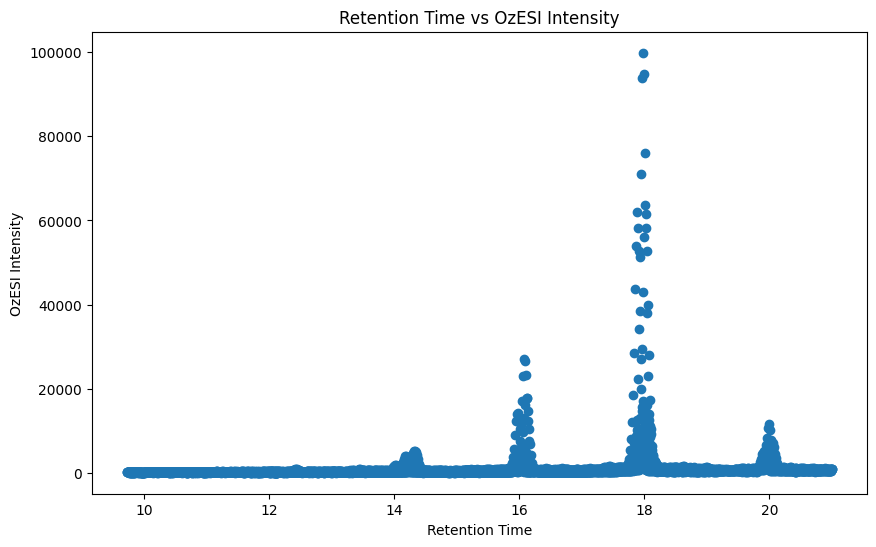

In [2363]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d4['Retention_Time'], d4['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [2364]:
# Function to determine the value for the Purity column
def determine_purity(sample_id):
    if 'Crude' in sample_id:
        return 'Crude'
    elif 'Degummed' in sample_id:
        return 'Degummed'
    elif 'RBD' in sample_id:
        return 'RBD'
    else:
        return None  # or some other default value if needed

# Apply the function to the Sample_ID column to create the Purity column
d4['Purity'] = d4['Sample_ID'].apply(determine_purity)
d4

grouped_cluster_data = d4.groupby(['Parent_Ion', 'Product_Ion','db','Purity'])
#add group number to each to a new column called Group
d4['Group'] = grouped_cluster_data.ngroup()
d4
d5= d4.copy()  # Create a copy of the clustered_data DataFrame
#print transition 870.8 -> 788.8
d5

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label Purity  Group  
1104            [TG(52:5)]_FA18:1              1  Crude      0  
1105            [TG(52:5)]_FA18:1              1  Crude      0  
1106            [TG(52:5)]_FA18:1              1  Crude      0  
1107            [TG(52:5)]_FA18:1              1  Crude      0  
1108            [TG(52:5)]_FA18:1              1  Crude      0  
...                           ...            ...    ...    ...  
10913  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  
10914  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  
10915  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  
10916  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  
10917  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  

[7353 rows x 11 columns]

# Area and RT range AREA AREA AREA AREA AREA AREA AREA AREA 

In [2365]:


# Calculate the minimum and maximum Retention_Time for each group with Cluster_Label included
min_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion', 'db', 'Cluster_Label'])['Retention_Time'].transform('min')
max_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion', 'db', 'Cluster_Label'])['Retention_Time'].transform('max')

# # Summing up OzESI_Intensity for each combination of Sample_ID, Parent_Ion, Product_Ion, db, and Cluster_Label
# Calculate the absolute difference and add it to the dataframe as 'Area_RT'
d5['Area_RT'] = abs(max_rt - min_rt)

# Display the updated dataframe
d5

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label Purity  Group   Area_RT  
1104            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1105            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1106            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1107            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1108            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
...                           ...            ...    ...    ...       ...  
10913  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10914  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10915  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10916  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10917  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  

[7353 rows x 12 columns]

# Calculate Area Numerical

In [2366]:
import pandas as pd
from scipy.integrate import trapz

d5a = d5.copy()
# Assuming 'data' is your pandas DataFrame
# Replace 'data' with the name of your DataFrame

# Group by the 'Group' column and calculate the area for each group
# grouped_data = d5a.groupby(['Group'])
grouped_data = d5a.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group
areas = {}
for group, group_data in grouped_data:
    sorted_group_data = group_data.sort_values(by='Retention_Time')
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']
    
    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)
    areas[group] = area

# # Map each row in the original DataFrame to its group's area
# d5a['Area'] = d5a['Group'].map(areas)
# Map each row in the original DataFrame to its subgroup's area
d5a['Area'] = d5a.apply(lambda row: areas.get((row['Group'], row['Cluster_Label'])), axis=1)
#round Area to 0 decimal places
d5a['Area'] = d5a['Area'].round(0)

# Now 'data' has a new column 'Area' with the area for each group
d5a

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label Purity  Group   Area_RT  \
1104            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1105            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1106            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1107            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1108            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
...                           ...            ...    ...    ...       ...   
10913  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10914  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10915  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10916  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10917  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   

        Area  
1104   130.0  
1105   130.0  
1106   130.0  
1107   130.0  
1108   130.0  
...      ...  
10913  348.0  
10914  348.0  
10915  348.0  
10916  348.0  
10917  348.0  

[7353 rows x 13 columns]

# Area Peak height and half width

In [2367]:
# Assuming 'd5a' is your pandas DataFrame and it contains the necessary data

# # Filter the DataFrame for Group 4 and Group 28
# group_4_data = d5a[d5a['Group'] == 4]
# group_28_data = d5a[d5a['Group'] == 28]

# # Print the areas for each group
# print("Areas for Group 4:")
# print(group_4_data['Area'].unique())

# print("\nAreas for Group 28:")
# print(group_28_data['Area'].unique())
import pandas as pd

# Assuming 'd5' is your pandas DataFrame and contains the necessary columns
d5b = d5.copy()  # Replace d5 with your actual DataFrame

# Define the peak_height_times_width_half_height function (as provided earlier)
def peak_height_times_width_half_height(group_data):
    """
    Function to calculate the area under a peak by multiplying peak height with width at half height.

    Args:
    group_data (pd.DataFrame): DataFrame containing the data for the group.

    Returns:
    float: Estimated area of the peak.
    """
    # Find the peak height (maximum intensity)
    peak_height = group_data['OzESI_Intensity'].max()

    # Calculate half peak height
    half_peak_height = peak_height / 2

    # Filter data points greater than half peak height
    half_height_data = group_data[group_data['OzESI_Intensity'] >= half_peak_height]

    # Find the minimum and maximum retention times where intensity is greater than half peak height
    min_time_at_half_height = half_height_data['Retention_Time'].min()
    max_time_at_half_height = half_height_data['Retention_Time'].max()

    # Calculate width at half height
    width_half_height = max_time_at_half_height - min_time_at_half_height

    # Area is approximately peak height times width at half height
    area = peak_height * width_half_height

    return area



# Group by both 'Group' and 'Cluster_Label' columns
grouped_data = d5b.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group using peak height times width at half height
areas = {}
for (group, cluster_label), group_data in grouped_data:
    area = peak_height_times_width_half_height(group_data)
    areas[(group, cluster_label)] = area

# Map each row in the original DataFrame to its subgroup's area
d5b['Area_HW'] = d5b.apply(lambda row: areas.get((row['Group'], row['Cluster_Label'])), axis=1)

# Round the 'Area_HW' column to 0 decimal places
d5b['Area_HW'] = d5b['Area_HW'].round(0)

# d5b now has a new column 'Area' with the area for each subgroup
d5b.head()  # Display the first few rows of the updated DataFrame


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104       760.6        571.6       11.594550       172.220016   
1105       760.6        571.6       11.610850       105.180008   
1106       760.6        571.6       11.627167       130.900009   
1107       760.6        571.6       11.643467       147.580017   
1108       760.6        571.6       11.659783       195.600021   

                             Sample_ID      Transition   db  \
1104  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   

                  Lipid  Cluster_Label Purity  Group   Area_RT  Area_HW  
1104  [TG(52:5)]_FA18:1              1  Crude      0  0.652317    215.0  
1105  [TG(52:5)]_FA18:1              1  Crude      0  0.652317    215.0  
1106  [TG(52:5)]_FA18:1              1  Crude      0  0.652317    215.0  
1107  [TG(52:5)]_FA18:1              1  Crude      0  0.652317    215.0  
1108  [TG(52:5)]_FA18:1              1  Crude      0  0.652317    215.0

# Merge both Area calculations to 1 df

In [2368]:
d5c = d5a.copy()  # Create a copy of the clustered_data DataFrame
d5c

d5c = pd.merge(d5c, d5b[['Area_HW']], left_index=True, right_index=True)
d5c


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label Purity  Group   Area_RT  \
1104            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1105            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1106            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1107            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
1108            [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
...                           ...            ...    ...    ...       ...   
10913  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10914  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10915  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10916  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
10917  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   

        Area  Area_HW  
1104   130.0    215.0  
1105   130.0    215.0  
1106   130.0    215.0  
1107   130.0    215.0  
1108   130.0    215.0  
...      ...      ...  
10913  348.0    558.0  
10914  348.0    558.0  
10915  348.0    558.0  
10916  348.0    558.0  
10917  348.0    558.0  

[7353 rows x 14 columns]

# Data Dependent Threshold (List of intensities)

In [2404]:
# import pandas as pd

# # Assuming d5 is your DataFrame
# # Group by Lipid and Sample_ID, and Cluster_Label, then calculate the average Area for each group
# grouped = d5.groupby(['Lipid', 'Sample_ID', 'Cluster_Label'])['Area'].mean().reset_index()

# # Find the Cluster_Label with the minimum average Area for each Lipid and Sample_ID combination
# idx = grouped.groupby(['Lipid', 'Sample_ID'])['Area'].idxmin()

# # Use these indices to locate the rows with the minimum average Area
# lowest_clusters = grouped.loc[idx, ['Lipid', 'Sample_ID', 'Cluster_Label']]

# # Rename the Cluster_Label column for clarity
# lowest_clusters.rename(columns={'Cluster_Label': 'Lowest_Cluster'}, inplace=True)

# # Create a copy of the original DataFrame for the merge
# d5d = d5.copy()

# import pandas as pd

# # Create a DataFrame to store the Lowest_Cluster for each group
# lowest_cluster_for_group = pd.DataFrame()

# # Iterate through each group in d5d
# for group in d5d['Group'].unique():
#     # Filter the DataFrame for the current group
#     group_rows = d5d[d5d['Group'] == group]

#     # Group by Cluster_Label and get the first values of Lipid, Sample_ID, and Area for each Cluster_Label
#     first_cluster_details = group_rows.groupby('Cluster_Label').first()[['Lipid', 'Sample_ID', 'Area']]

#     # Find the Cluster_Label with the lowest Area in this group
#     lowest_cluster = first_cluster_details['Area'].idxmin()

#     # Append the result to the DataFrame
#     lowest_cluster_for_group = lowest_cluster_for_group.append({'Group': group, 'Lowest_Cluster': lowest_cluster}, ignore_index=True)

# # Merge this information back into the original DataFrame
# d5d = d5d.merge(lowest_cluster_for_group, on='Group', how='left')

# # Display the updated DataFrame
# d5d.head(60)

# # lowest_cluster_for_group.to_excel('lowest_cluster_for_group.xlsx')
# # lowest_cluster_for_group
d5d = d5c.copy()

# Group the data by 'Group' and collect the 'OzESI_Intensity' values in lists
grouped_data = d5d.groupby('Group')['OzESI_Intensity'].apply(list).reset_index(name='Group_Intensity')
# Merge the original data with the grouped data
d5d = d5d.merge(grouped_data, on='Group')


# Sorting the lists in the 'Group_Intensity' column
d5d['Group_Intensity'] = d5d['Group_Intensity'].apply(lambda x: sorted(x))

d5d  # Display the first few rows of the merged DataFrame

import pandas as pd

def set_threshold(group_intensity_list, threshold1=0.3, threshold2=0):
    """
    Function to set a threshold at a specified level of the list and add an additional value to it.

    :param group_intensity_list: List of intensity values for a group.
    :param threshold1: The percentage level at which to set the threshold (default is 0.3 for 30%).
    :param threshold2: An additional value to add to the threshold (default is 0).
    :return: The threshold value.
    """
    if not group_intensity_list:
        return None
    sorted_list = sorted(group_intensity_list)
    index = int(len(sorted_list) * threshold1)
    return sorted_list[index] + threshold2

# Example usage
#.1 100 15dev| .2 120 decent | .17 120 23dev | 0.05 50 13dev| 0 0 14dev| 
# Assuming df_merged is your DataFrame with the 'Group_Intensity' column
d5d['Group_Threshold'] = d5d['Group_Intensity'].apply(lambda x: set_threshold(x, threshold1=0.3, threshold2=100))
#round the threshold to 0 decimal places
d5d['Group_Threshold'] = d5d['Group_Threshold'].round(0)


# To display the first few rows of the DataFrame with the new column
d5d

# Filter the DataFrame to keep only the rows where 'OzESI_Intensity' is greater than or equal to 'Group_Threshold'
d5e = d5d[d5d['OzESI_Intensity'] >= d5d['Group_Threshold']]

# Display the first few rows of the filtered DataFrame
d5e




Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
11         760.6        571.6       11.773933       287.960022   
20         760.6        571.6       11.920700       322.140015   
21         760.6        571.6       11.937017       330.280029   
22         760.6        571.6       11.953317       287.600006   
40         760.6        571.6       12.246867       275.620026   
...          ...          ...             ...              ...   
7343       822.7        605.6       20.847233       558.300049   
7344       822.7        605.6       20.863533       583.740051   
7346       822.7        605.6       20.896150       769.160034   
7347       822.7        605.6       20.912467       855.940063   
7348       822.7        605.6       20.928767       731.720032   

                             Sample_ID      Transition   db  \
11    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
20    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
21    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
22    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
40    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                ...             ...  ...   
7343    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7344    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7346    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7347    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7348    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                           Lipid  Cluster_Label Purity  Group   Area_RT  \
11             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
20             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
21             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
22             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
40             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
...                          ...            ...    ...    ...       ...   
7343  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7344  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7346  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7347  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7348  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   

       Area  Area_HW                                    Group_Intensity  \
11    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
20    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
21    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
22    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
40    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
...     ...      ...                                                ...   
7343  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7344  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7346  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7347  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7348  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   

      Group_Threshold  
11              274.0  
20              274.0  
21              274.0  
22              274.0  
40              274.0  
...               ...  
7343            557.0  
7344            557.0  
7346            557.0  
7347            557.0  
7348            557.0  

[2428 rows x 16 columns]

# DDT Area Calculations 

In [2405]:
import pandas as pd
from scipy.integrate import trapz

d5f = d5e.copy()
# Assuming 'data' is your pandas DataFrame
# Replace 'data' with the name of your DataFrame

# Group by the 'Group' column and calculate the area for each group
# grouped_data = d5f.groupby(['Group'])
grouped_data = d5f.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group
areas = {}
for group, group_data in grouped_data:
    sorted_group_data = group_data.sort_values(by='Retention_Time')
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']
    
    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)
    areas[group] = area

# # Map each row in the original DataFrame to its group's area
# d5f['Area_DDT'] = d5f['Group'].map(areas)
# Map each row in the original DataFrame to its subgroup's area
d5f['Area_DDT'] = d5f.apply(lambda row: areas.get((row['Group'], row['Cluster_Label'])), axis=1)
#round Area_DDT to 0 decimal places
d5f['Area_DDT'] = d5f['Area_DDT'].round(0)

# Now 'data' has a new column 'Area_DDT' with the area for each group
d5f

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
11         760.6        571.6       11.773933       287.960022   
20         760.6        571.6       11.920700       322.140015   
21         760.6        571.6       11.937017       330.280029   
22         760.6        571.6       11.953317       287.600006   
40         760.6        571.6       12.246867       275.620026   
...          ...          ...             ...              ...   
7343       822.7        605.6       20.847233       558.300049   
7344       822.7        605.6       20.863533       583.740051   
7346       822.7        605.6       20.896150       769.160034   
7347       822.7        605.6       20.912467       855.940063   
7348       822.7        605.6       20.928767       731.720032   

                             Sample_ID      Transition   db  \
11    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
20    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
21    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
22    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
40    CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                ...             ...  ...   
7343    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7344    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7346    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7347    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
7348    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                           Lipid  Cluster_Label Purity  Group   Area_RT  \
11             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
20             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
21             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
22             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
40             [TG(52:5)]_FA18:1              1  Crude      0  0.652317   
...                          ...            ...    ...    ...       ...   
7343  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7344  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7346  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7347  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   
7348  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317   

       Area  Area_HW                                    Group_Intensity  \
11    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
20    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
21    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
22    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
40    130.0    215.0  [69.62000274658203, 84.74000549316406, 105.180...   
...     ...      ...                                                ...   
7343  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7344  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7346  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7347  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   
7348  348.0    558.0  [268.8800048828125, 280.4000244140625, 290.480...   

      Group_Threshold  Area_DDT  
11              274.0     138.0  
20              274.0     138.0  
21              274.0     138.0  
22              274.0     138.0  
40              274.0     138.0  
...               ...       ...  
7343            557.0     360.0  
7344            557.0     360.0  
7346            557.0     360.0  
7347            557.0     360.0  
7348            557.0     360.0  

[2428 rows x 17 columns]

In [2406]:

# Assuming 'd5' is your pandas DataFrame and contains the necessary columns
d5g = d5f.copy()  # Replace d5 with your actual DataFrame

# Define the peak_height_times_width_half_height function (as provided earlier)
def peak_height_times_width_half_height(group_data):
    """
    Function to calculate the area under a peak by multiplying peak height with width at half height.

    Args:
    group_data (pd.DataFrame): DataFrame containing the data for the group.

    Returns:
    float: Estimated area of the peak.
    """
    # Find the peak height (maximum intensity)
    peak_height = group_data['OzESI_Intensity'].max()

    # Calculate half peak height
    half_peak_height = peak_height / 2

    # Filter data points greater than half peak height
    half_height_data = group_data[group_data['OzESI_Intensity'] >= half_peak_height]

    # Find the minimum and maximum retention times where intensity is greater than half peak height
    min_time_at_half_height = half_height_data['Retention_Time'].min()
    max_time_at_half_height = half_height_data['Retention_Time'].max()

    # Calculate width at half height
    width_half_height = max_time_at_half_height - min_time_at_half_height

    # Area is approximately peak height times width at half height
    area = peak_height * width_half_height

    return area



# Group by both 'Group' and 'Cluster_Label' columns
grouped_data = d5g.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group using peak height times width at half height
areas = {}
for (group, cluster_label), group_data in grouped_data:
    area = peak_height_times_width_half_height(group_data)
    areas[(group, cluster_label)] = area

# Map each row in the original DataFrame to its subgroup's area
d5g['Area_HW_DDT'] = d5g.apply(lambda row: areas.get((row['Group'], row['Cluster_Label'])), axis=1)

# Round the 'Area_HW_DDT' column to 0 decimal places
d5g['Area_HW_DDT'] = d5g['Area_HW_DDT'].round(0)

# d5g now has a new column 'Area' with the area for each subgroup
d5g.head()  # Display the first few rows of the updated DataFrame


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
11       760.6        571.6       11.773933       287.960022   
20       760.6        571.6       11.920700       322.140015   
21       760.6        571.6       11.937017       330.280029   
22       760.6        571.6       11.953317       287.600006   
40       760.6        571.6       12.246867       275.620026   

                           Sample_ID      Transition   db              Lipid  \
11  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9  [TG(52:5)]_FA18:1   
20  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9  [TG(52:5)]_FA18:1   
21  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9  [TG(52:5)]_FA18:1   
22  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9  [TG(52:5)]_FA18:1   
40  CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9  [TG(52:5)]_FA18:1   

    Cluster_Label Purity  Group   Area_RT   Area  Area_HW  \
11              1  Crude      0  0.652317  130.0    215.0   
20              1  Crude      0  0.652317  130.0    215.0   
21              1  Crude      0  0.652317  130.0    215.0   
22              1  Crude      0  0.652317  130.0    215.0   
40              1  Crude      0  0.652317  130.0    215.0   

                                      Group_Intensity  Group_Threshold  \
11  [69.62000274658203, 84.74000549316406, 105.180...            274.0   
20  [69.62000274658203, 84.74000549316406, 105.180...            274.0   
21  [69.62000274658203, 84.74000549316406, 105.180...            274.0   
22  [69.62000274658203, 84.74000549316406, 105.180...            274.0   
40  [69.62000274658203, 84.74000549316406, 105.180...            274.0   

    Area_DDT  Area_HW_DDT  
11     138.0        156.0  
20     138.0        156.0  
21     138.0        156.0  
22     138.0        156.0  
40     138.0        156.0

In [2407]:
# Assuming d5g is your actual DataFrame and contains Groups 4 and 27

# Extract the 'Area' for Group 4
area_group_4 = d5g[d5g['Group'] == 4]['Area_HW_DDT'].iloc[0] if not d5g[d5g['Group'] == 4].empty else "Group 4 not found"

# Extract the 'Area_HW_DDT' for Group 27
area_group_27 = d5g[d5g['Group'] == 28]['Area_HW_DDT'].iloc[0] if not d5g[d5g['Group'] == 28].empty else "Group 27 not found"

print("Area_HW_DDT for Group 4:", area_group_4)
print("Area_HW_DDT for Group 28:", area_group_27)


Area_HW_DDT for Group 4: 202.0
Area_HW_DDT for Group 28: 57.0


Plotting to confirm clusters

In [2408]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # Define custom colors for the clusters add up to 10 clusters
# #color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# color_map = {0: 'green', 1: 'blue', 2: 'red'}
# # color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# # Get unique Group values from complete_df
# unique_groups = d5['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group
#     group_filtered_data = d5[d5['Group'] == group]
#     colors = group_filtered_data['Cluster_Label'].map(color_map)

#     # Extract the corresponding Transition, Lipid Name, and db value for the group
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
#     db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#     # Create a legend for the plot
#     patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#     plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
#     # # Uncomment the following lines if you want to save the plot
#     # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


## Plot Clusters for each Purity

In [2409]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # Define custom colors for the clusters
# color_map = {0: 'green', 1: 'blue', 2: 'red'}
# # color_map = {0: 'green', 1: 'blue', 2: 'red', 3: 'orange'}

# # Get unique Group values from d5b
# unique_groups = d5b['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Get unique purity levels within this group
#     unique_purities = d5b[d5b['Group'] == group]['Purity'].unique()

#     # Iterate through each unique purity within the group
#     for purity in unique_purities:
#         # Filter the data for each Group and Purity
#         group_purity_filtered_data = d5b[(d5b['Group'] == group) & (d5b['Purity'] == purity)]

#         # Check if the filtered data is not empty
#         if not group_purity_filtered_data.empty:
#             # Extract the corresponding Transition, Lipid Name, and db value for the first row of the filtered data
#             transition_value = group_purity_filtered_data['Transition'].iloc[0]
#             lipid_name = group_purity_filtered_data['Lipid'].iloc[0]
#             db_value = group_purity_filtered_data['db'].iloc[0]

#             # Set up the plot for each group and purity
#             plt.figure(figsize=(10, 6))

#             # Plot each point with color based on Cluster_Label
#             for i, row in group_purity_filtered_data.iterrows():
#                 plt.scatter(row['Retention_Time'], row['OzESI_Intensity'], color=color_map[row['Cluster_Label']])
#                 plt.annotate(row['Cluster_Label'], (row['Retention_Time'], row['OzESI_Intensity']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

#             # Add labels and title
#             plt.xlabel('Retention Time')
#             plt.ylabel('OzESI Intensity')
#             plt.title(f'Scatter Plot for Group {group}, Purity: {purity} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#             # Create a legend for Cluster Labels
#             cluster_patches = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#             plt.legend(handles=cluster_patches, loc='upper left', title='Cluster Labels')

#             # Show the plot
#             plt.show()


In [2410]:
d5

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
1104        760.6        571.6       11.594550       172.220016   
1105        760.6        571.6       11.610850       105.180008   
1106        760.6        571.6       11.627167       130.900009   
1107        760.6        571.6       11.643467       147.580017   
1108        760.6        571.6       11.659783       195.600021   
...           ...          ...             ...              ...   
10913       822.7        605.6       20.928767       731.720032   
10914       822.7        605.6       20.945083       419.760040   
10915       822.7        605.6       20.961383       348.300018   
10916       822.7        605.6       20.977700       437.960022   
10917       822.7        605.6       20.994000       462.880035   

                              Sample_ID      Transition   db  \
1104   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1105   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1106   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1107   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
1108   CrudeCanola_O3on_150gN3_02082023  760.6 -> 571.6  n-9   
...                                 ...             ...  ...   
10913    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10914    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10915    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10916    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   
10917    RBDCanola_O3on_150gN3_02082023  822.7 -> 605.6  n-7   

                            Lipid  Cluster_Label Purity  Group   Area_RT  
1104            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1105            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1106            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1107            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
1108            [TG(52:5)]_FA18:1              1  Crude      0  0.652317  
...                           ...            ...    ...    ...       ...  
10913  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10914  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10915  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10916  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  
10917  [TG(55:9),TG(54:2)]_FA18:1              0    RBD     59  0.652317  

[7353 rows x 12 columns]

PLOT for Canola oil Purity check

In [2411]:
# import matplotlib.pyplot as plt
# import os

# # Assuming 'Purity' is a categorical column in d6

# # Define a color map for the Purity categories
# purity_color_map = {
#     'Crude': 'red',
#     'Degummed': 'green',
#     'RBD': 'blue',
#     None: 'gray'  # Color for samples without a purity value
# }

# # Get unique Group values from d6
# unique_groups = d5['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group
#     group_filtered_data = d5[d5['Group'] == group]

#     # Map Purity values to colors
#     colors = group_filtered_data['Purity'].map(purity_color_map)

#     # Extract the corresponding Transition, Lipid Name, and db value for the group
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
#     db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#     # Create a legend for the plot
#     patches = [plt.Line2D([0], [0], marker='o', color='w', label=purity, markersize=10, markerfacecolor=color) for purity, color in purity_color_map.items()]
#     plt.legend(handles=patches, title='Purity')

#     # # Uncomment the following lines if you want to save the plot
#     # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


# Cluster Check

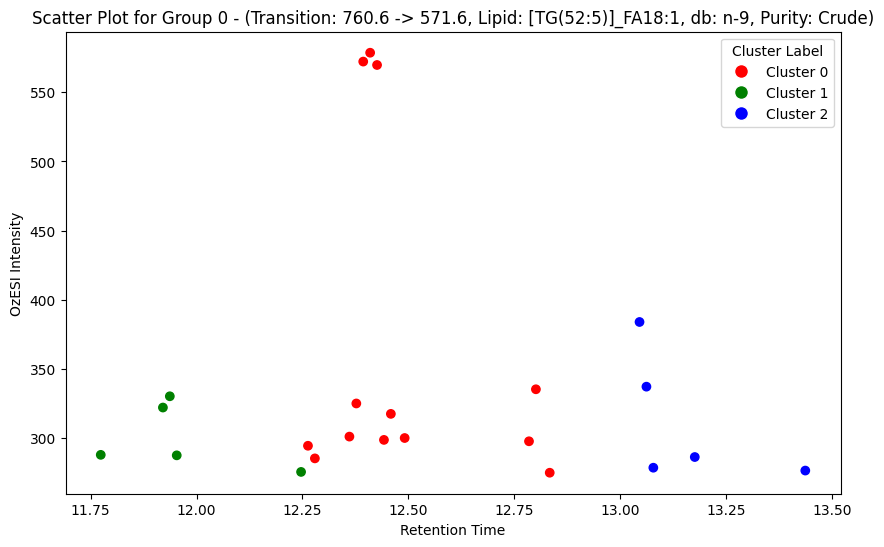

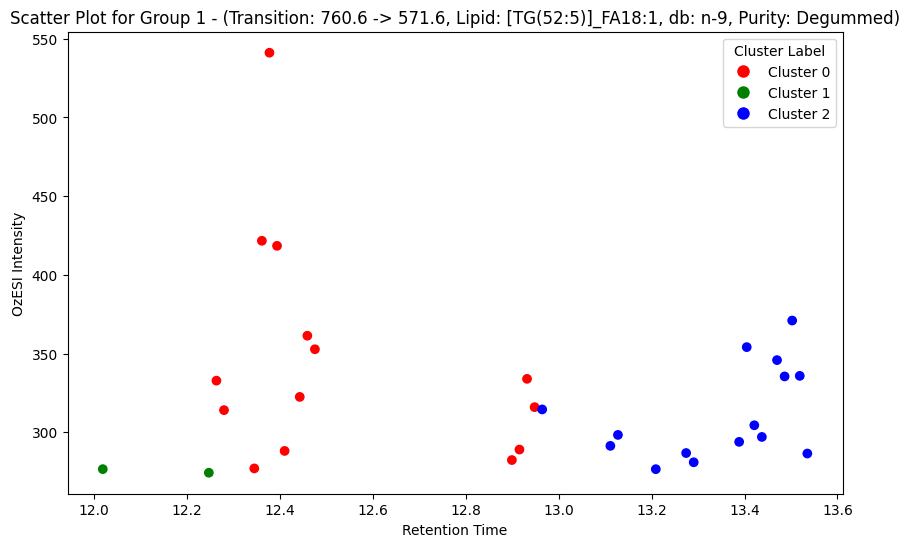

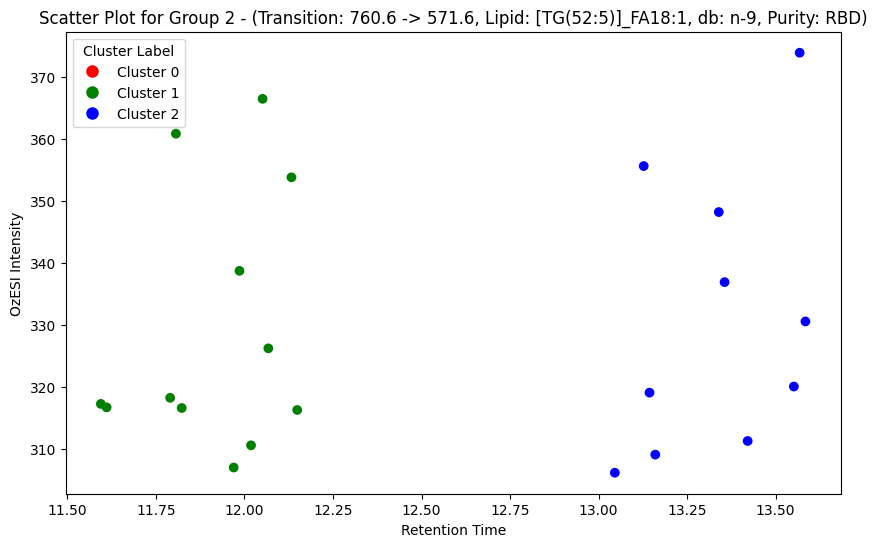

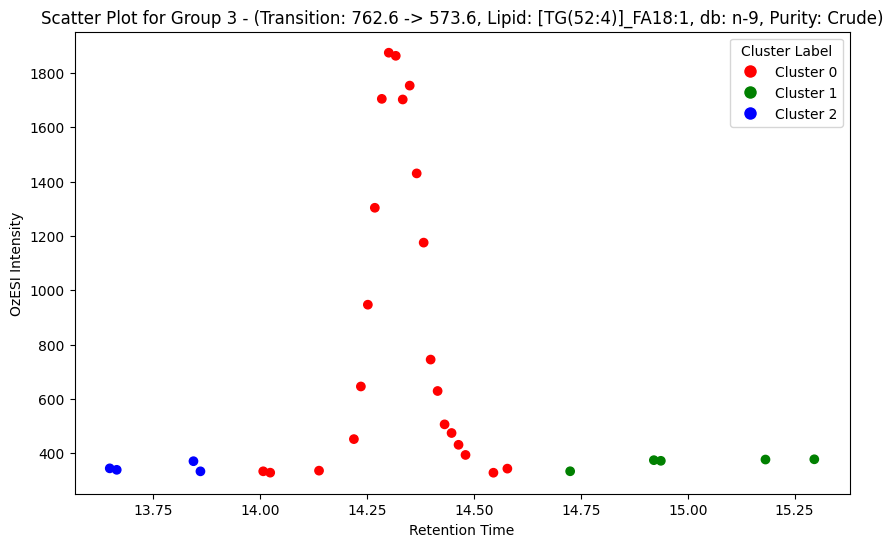

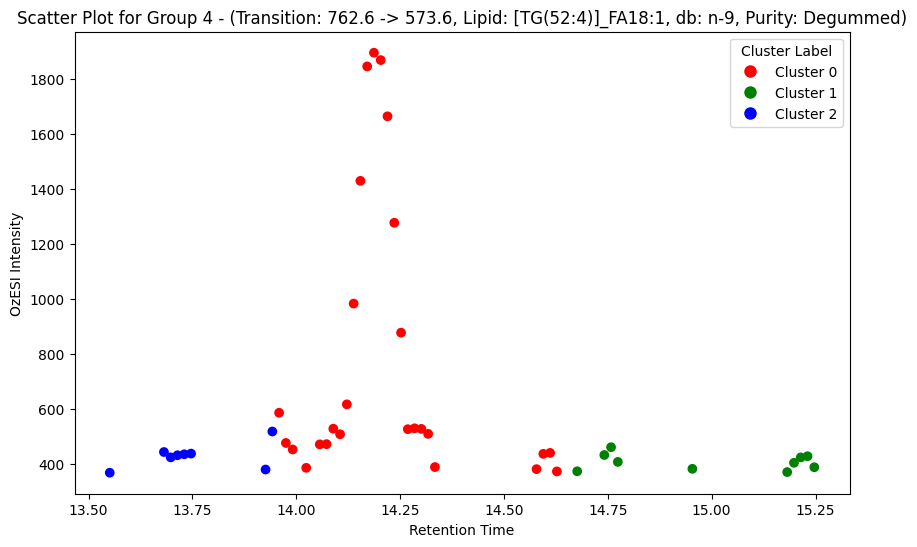

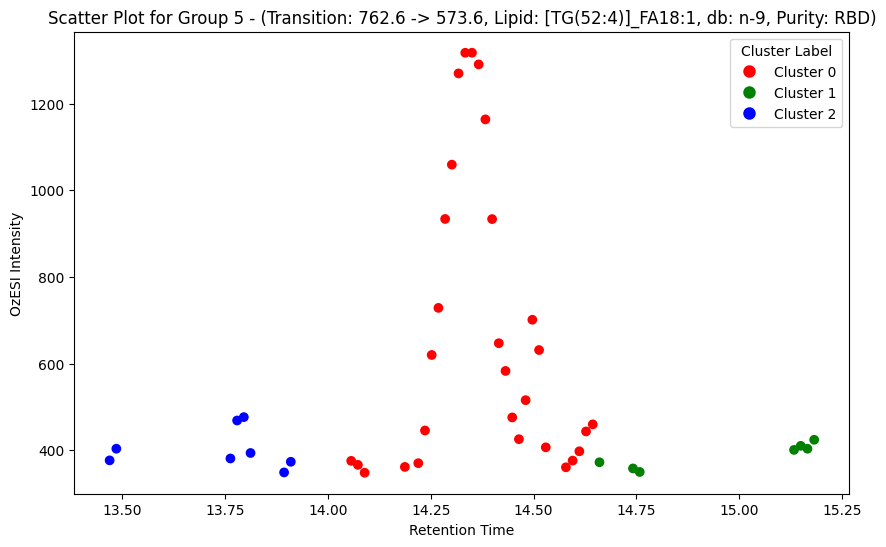

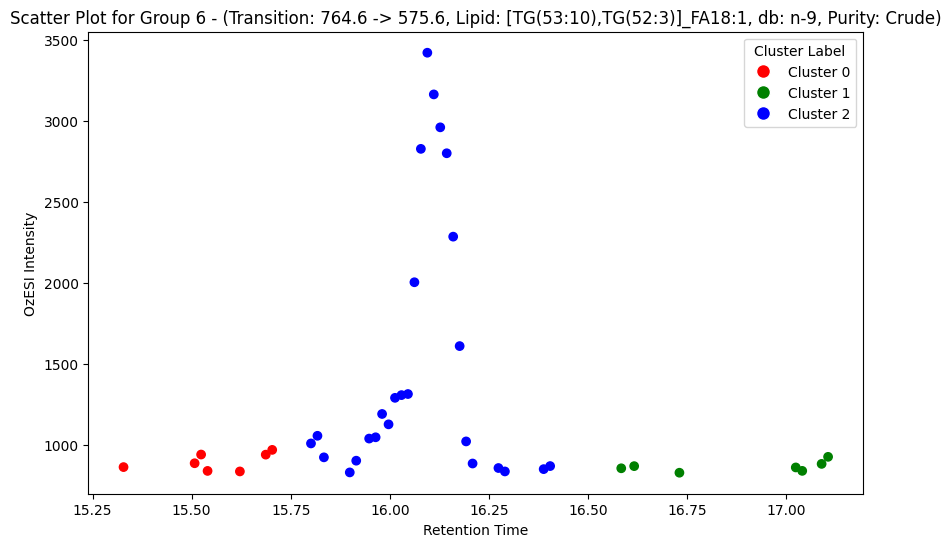

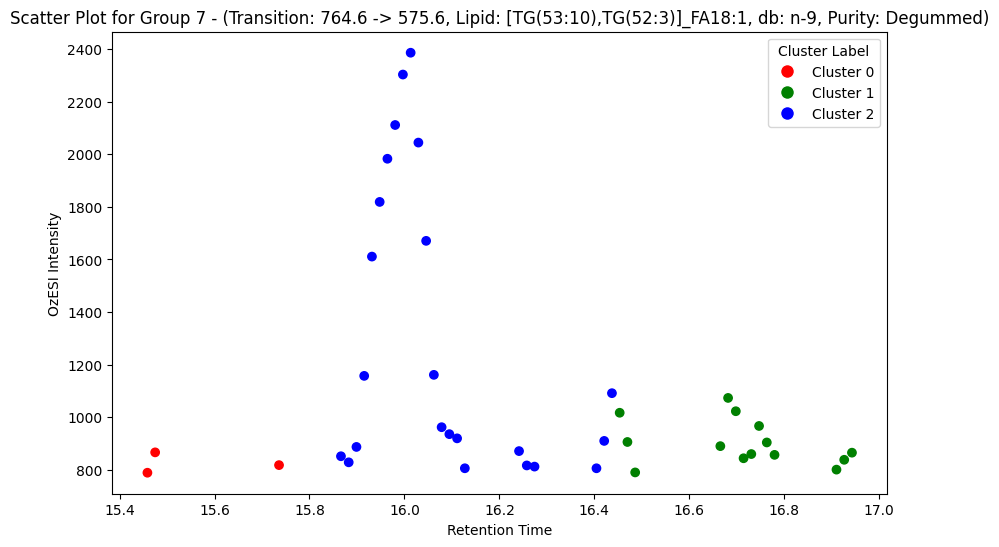

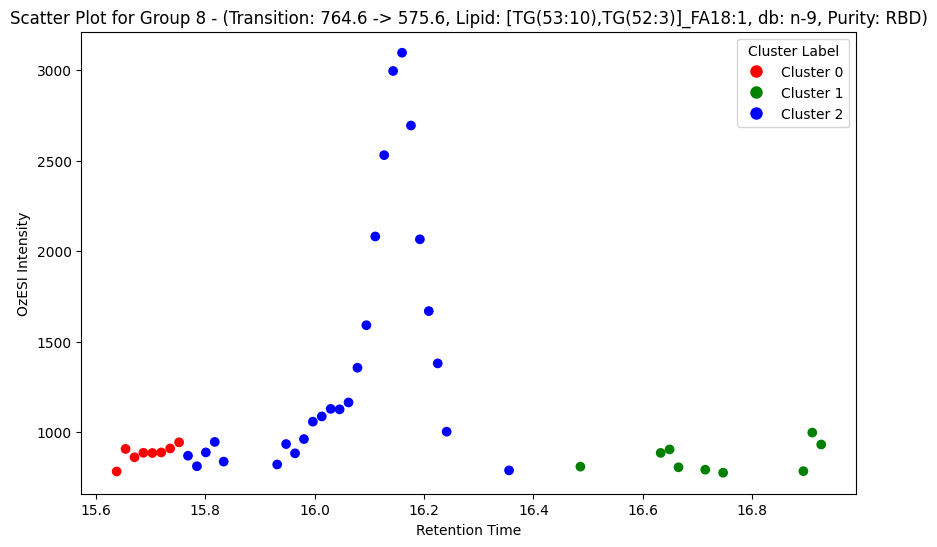

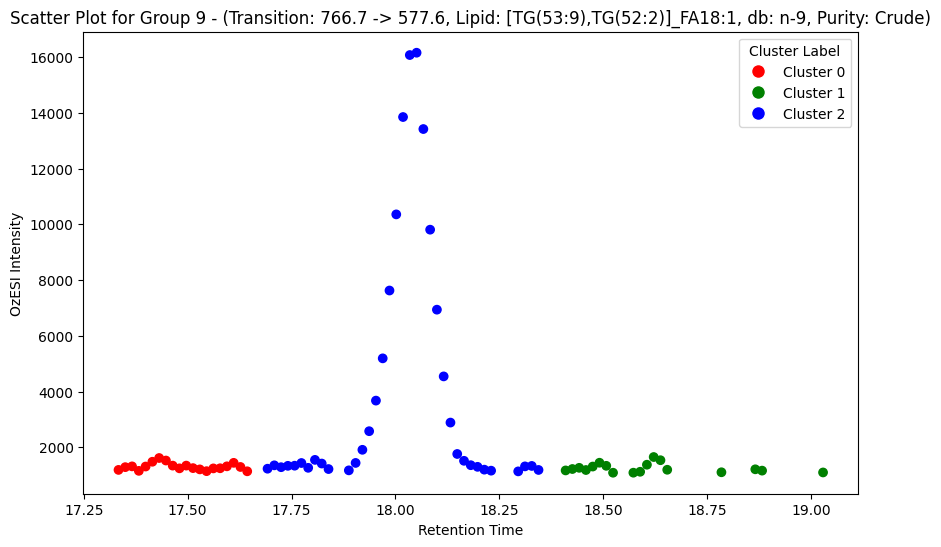

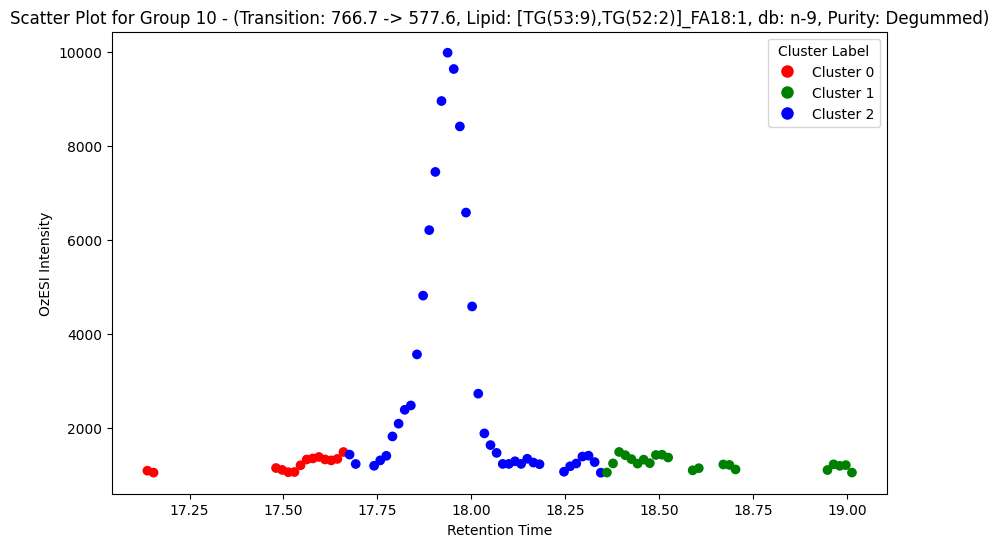

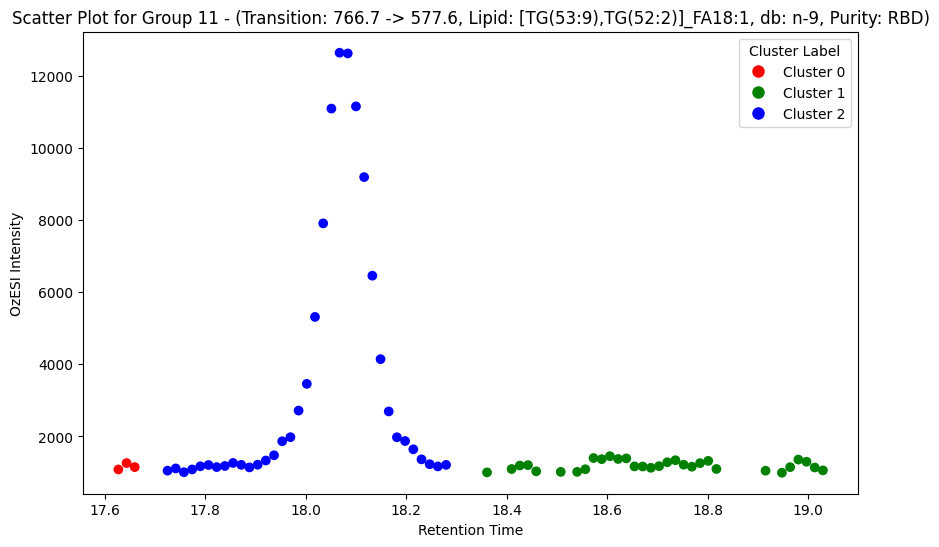

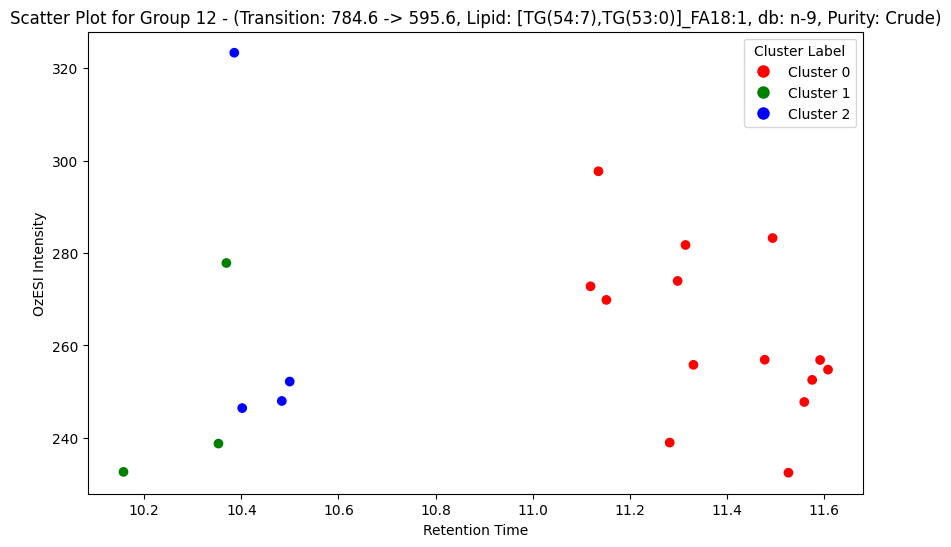

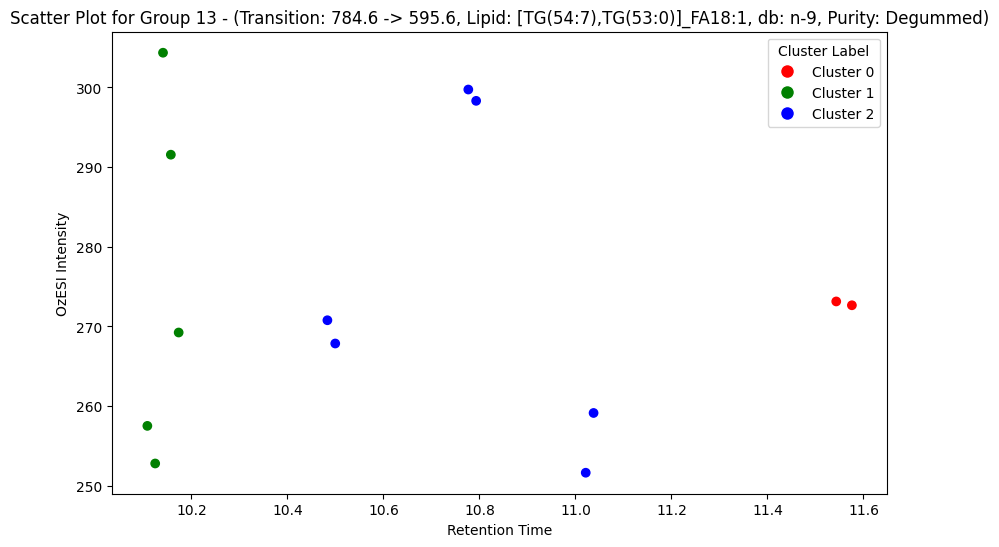

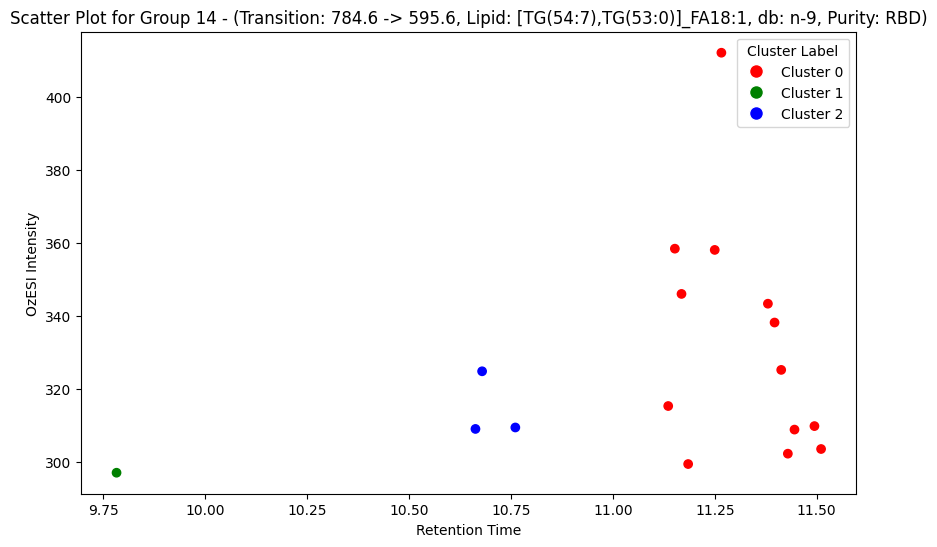

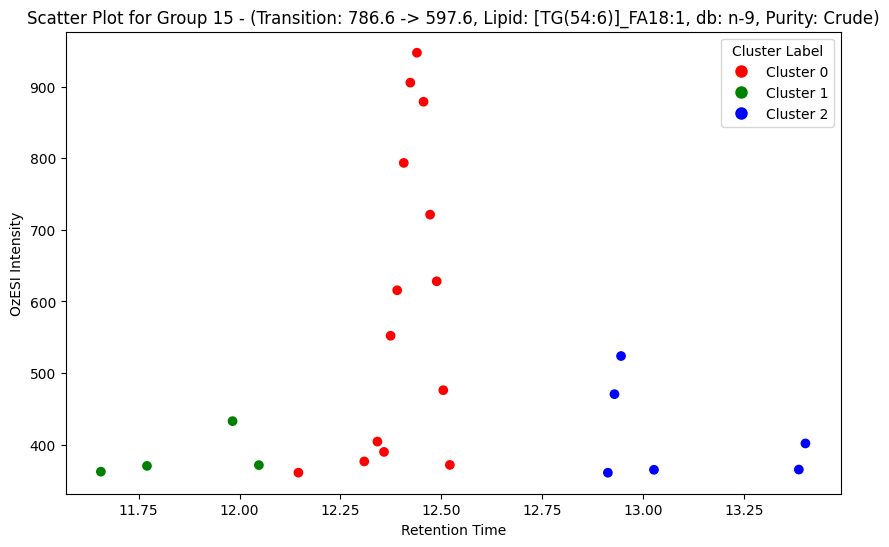

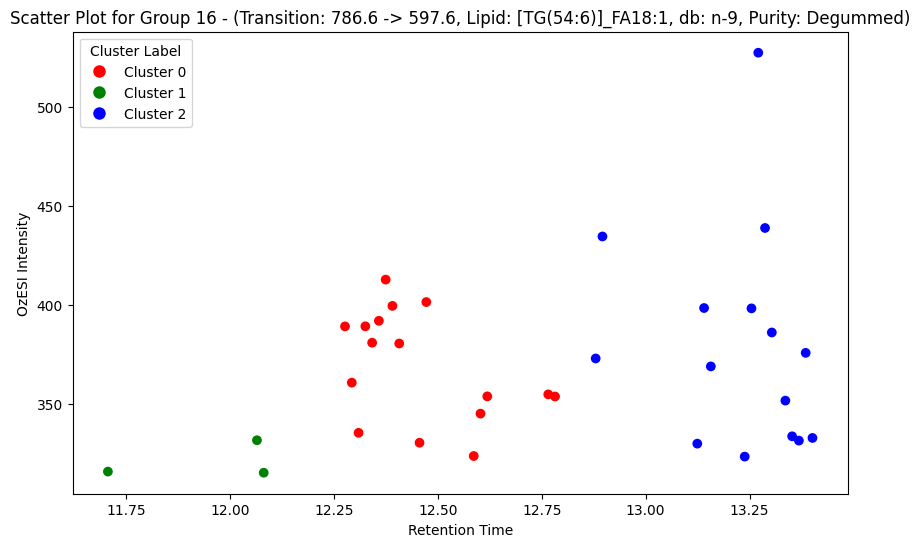

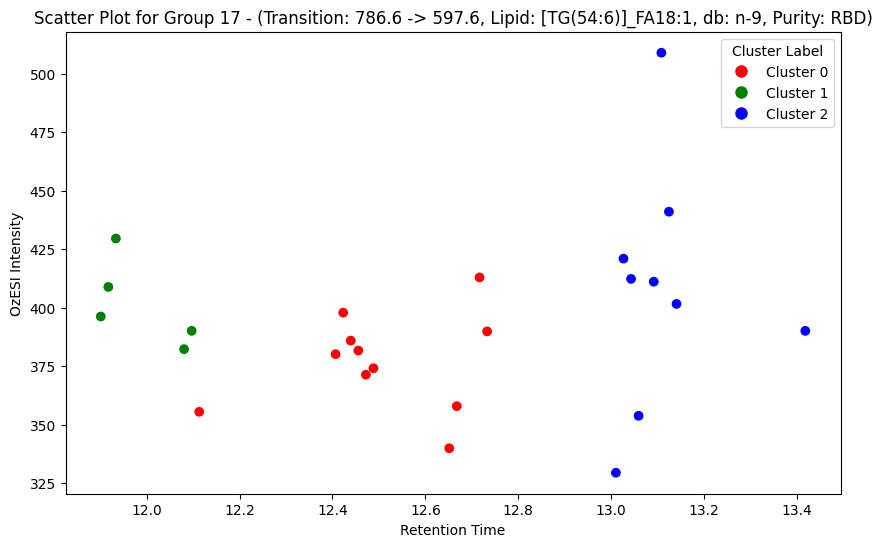

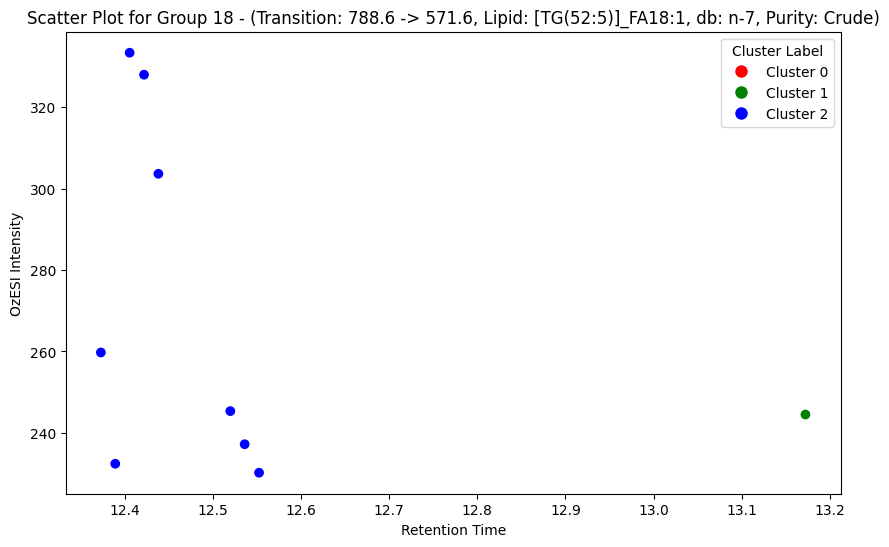

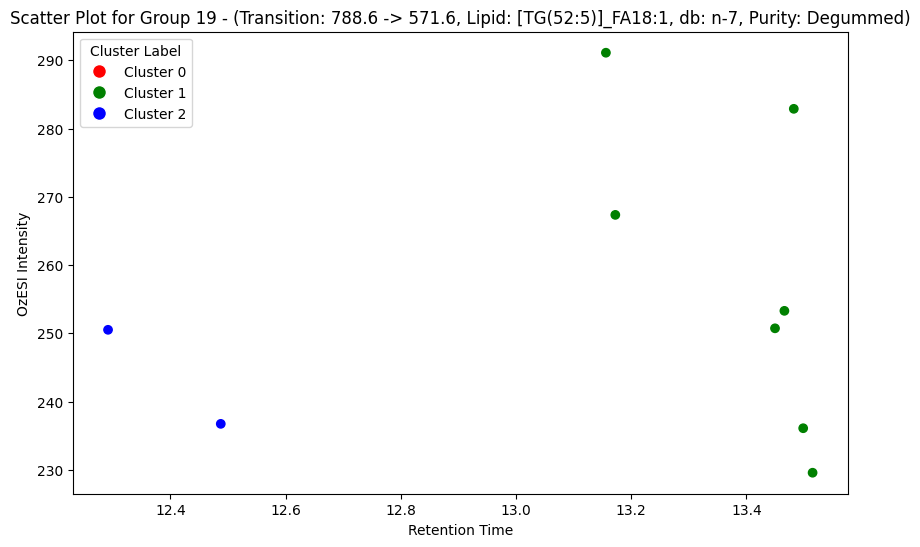

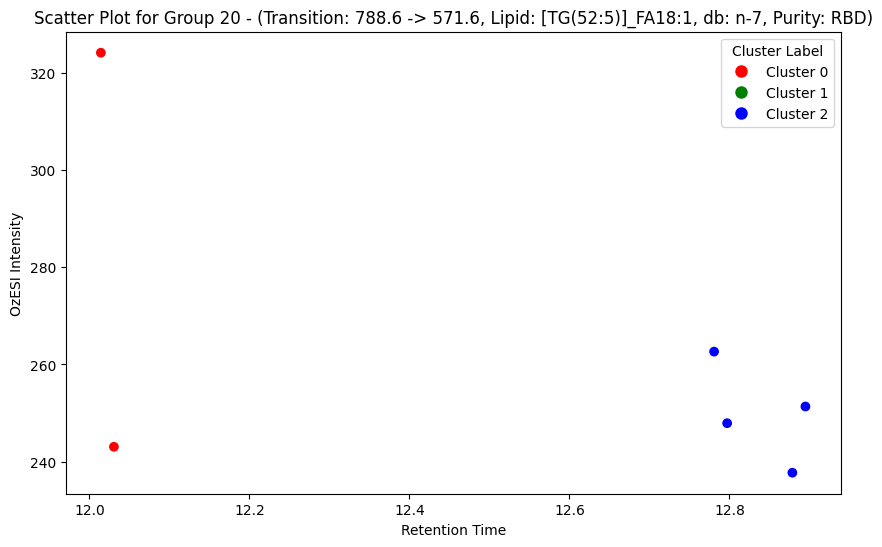

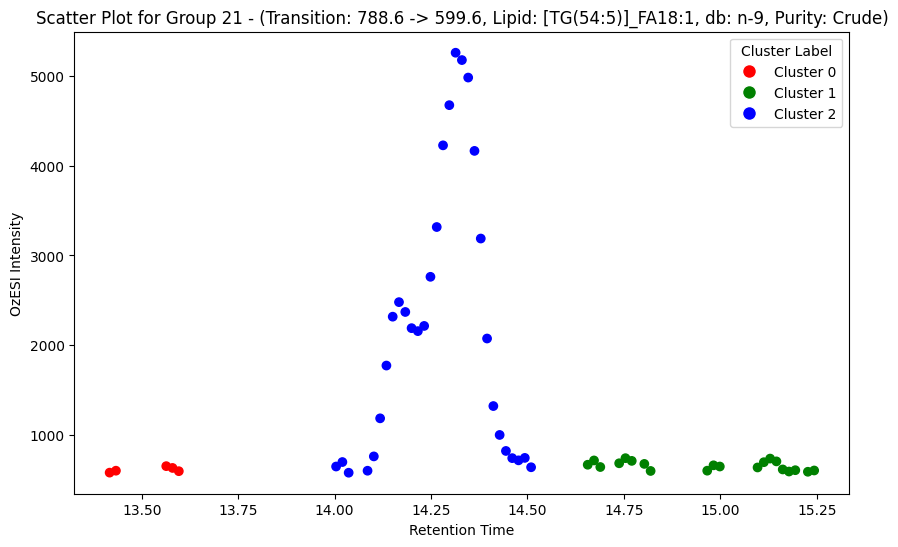

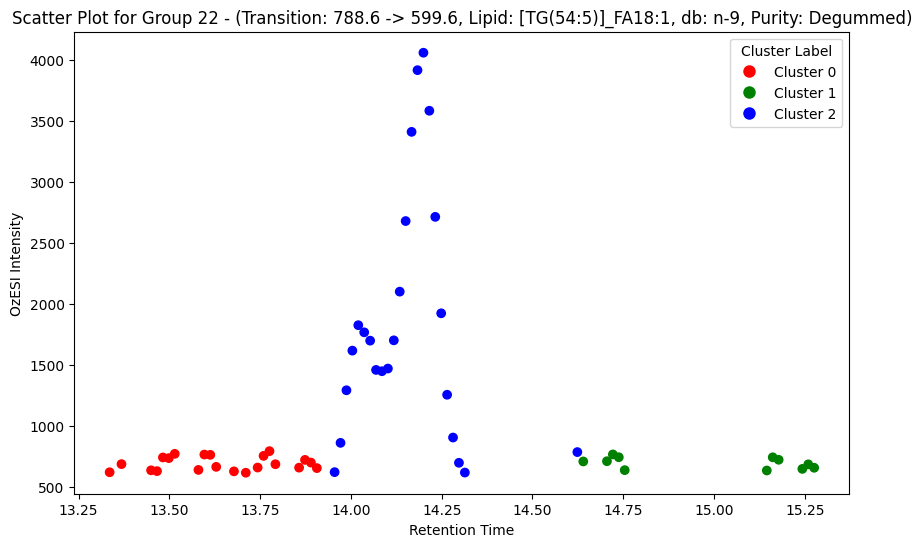

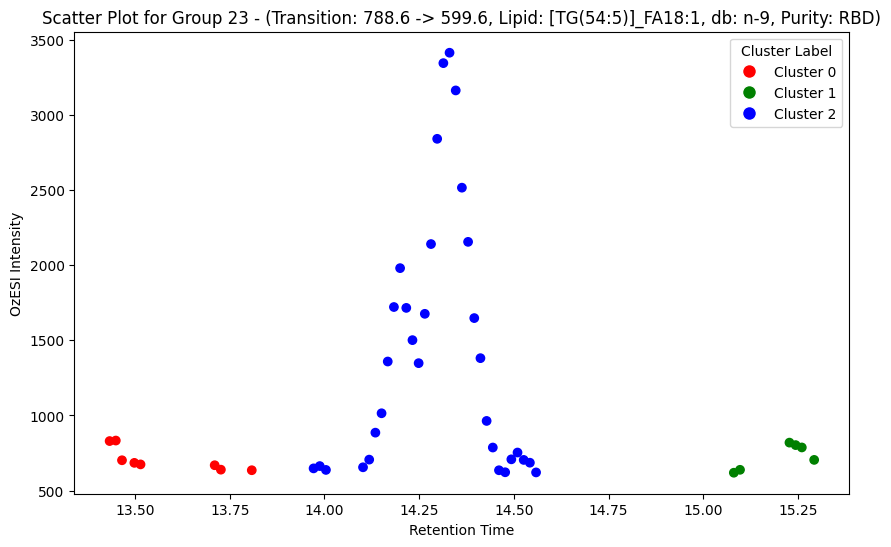

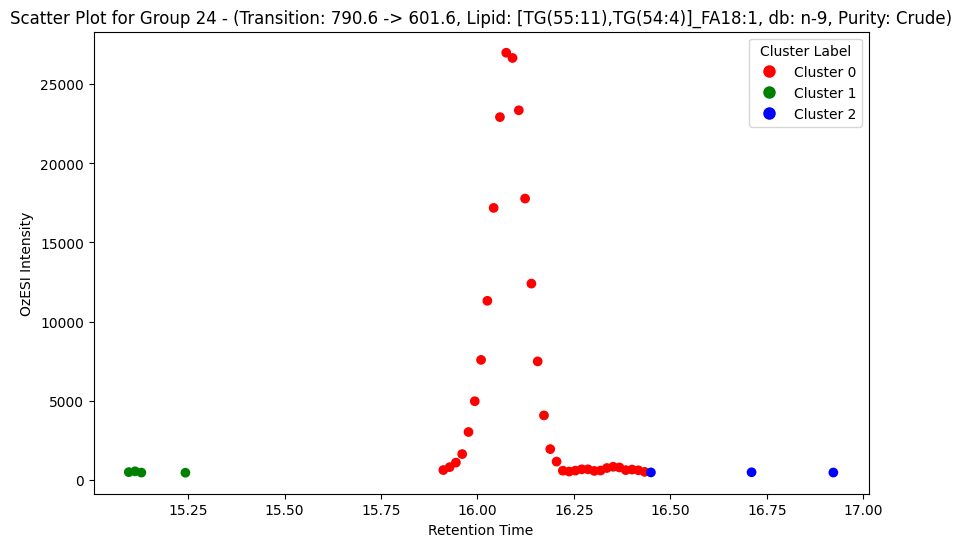

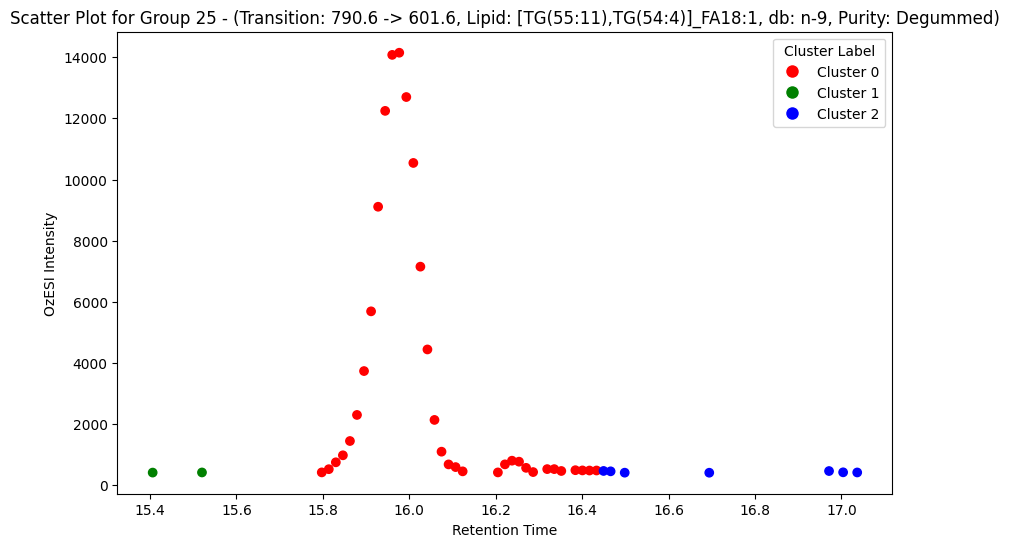

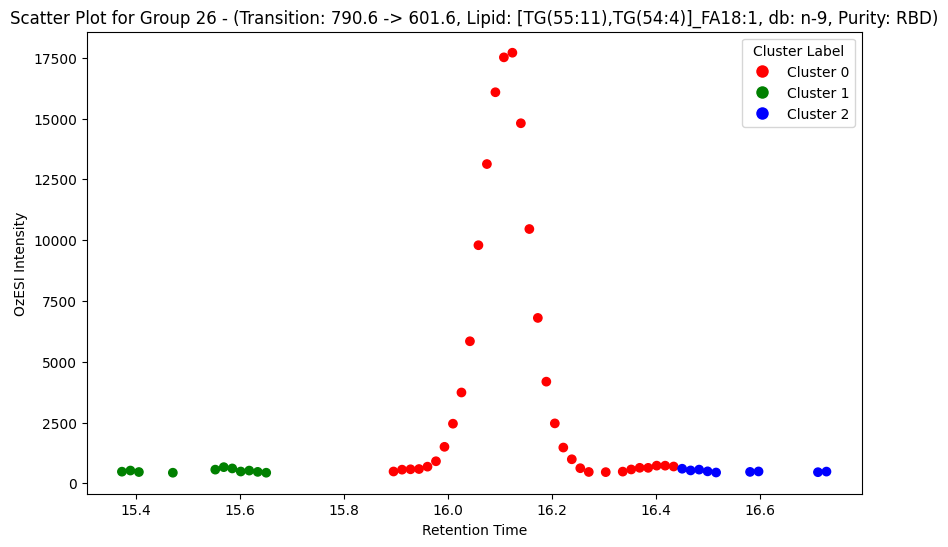

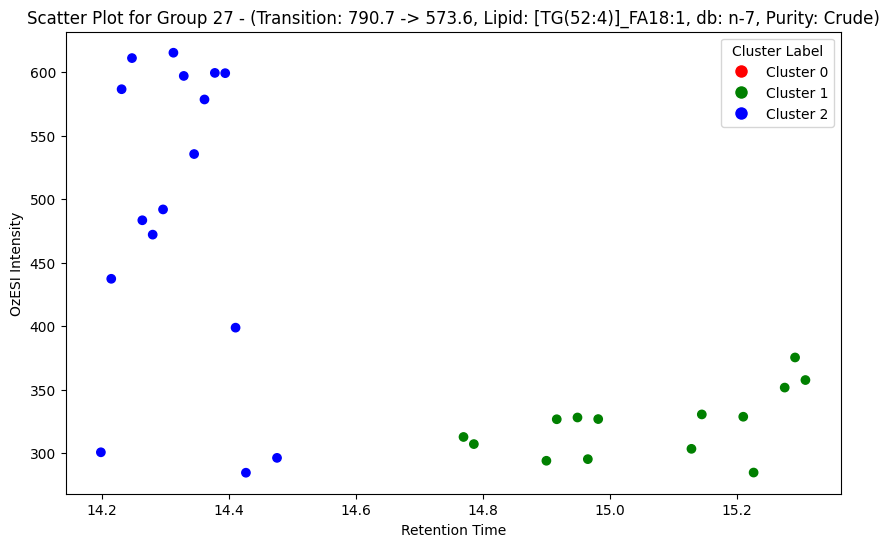

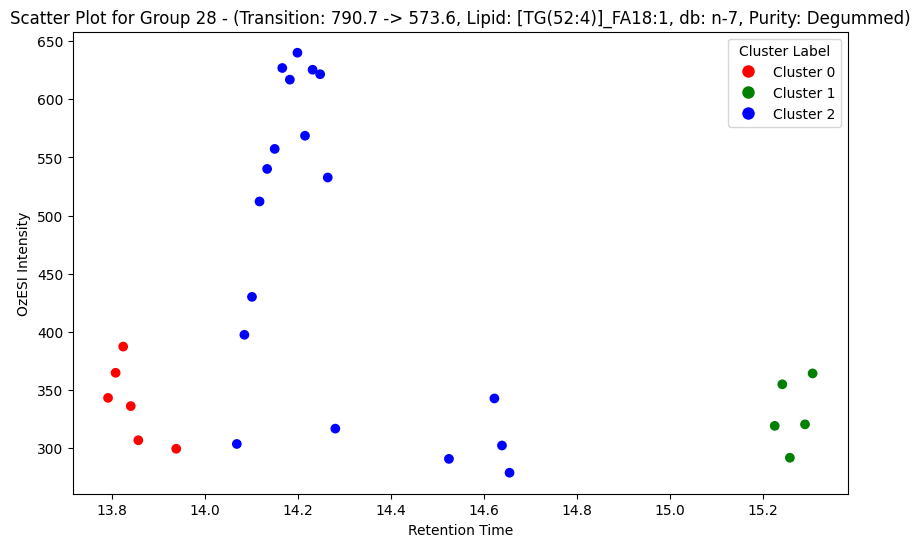

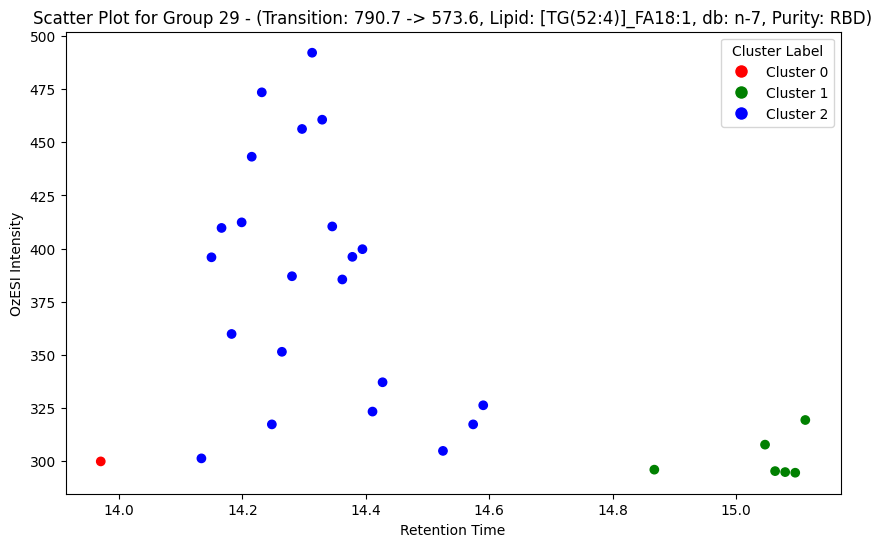

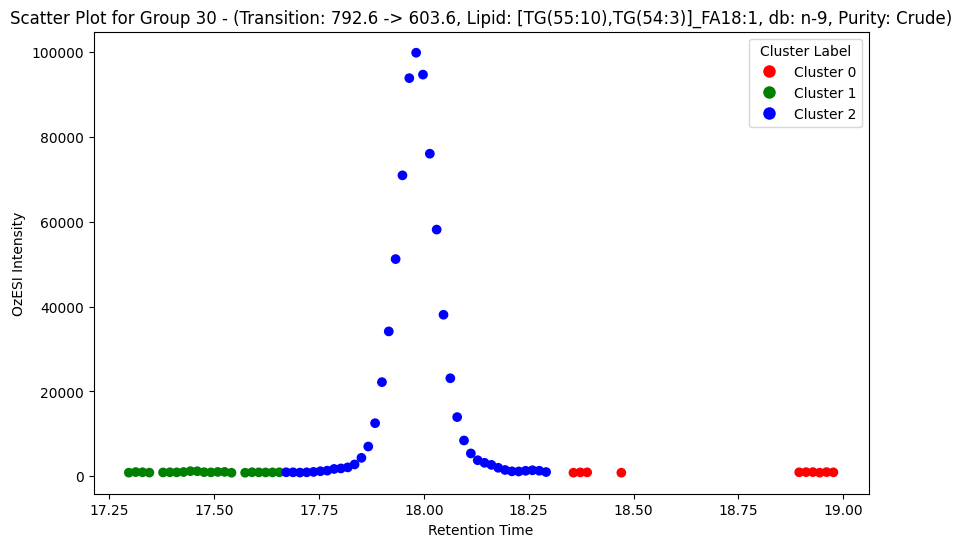

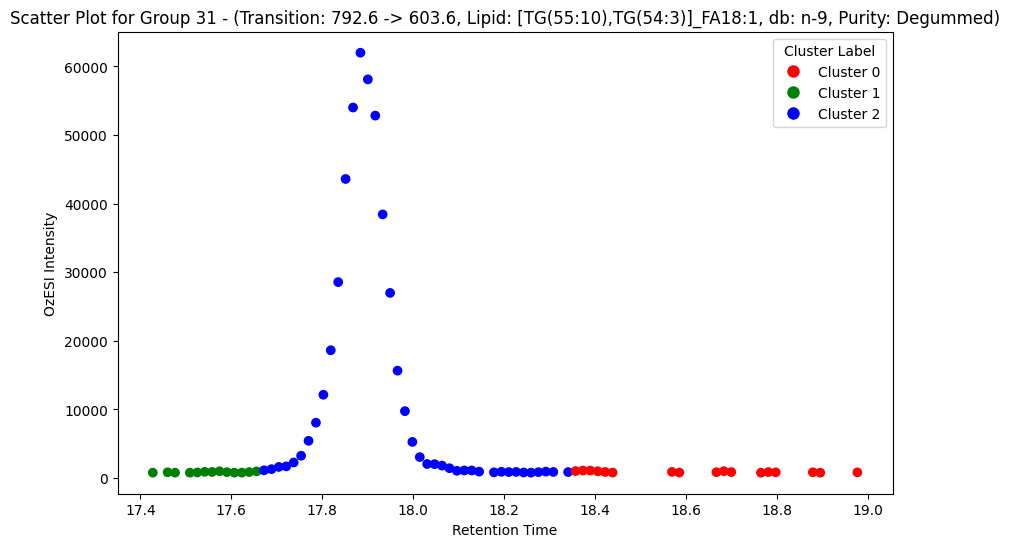

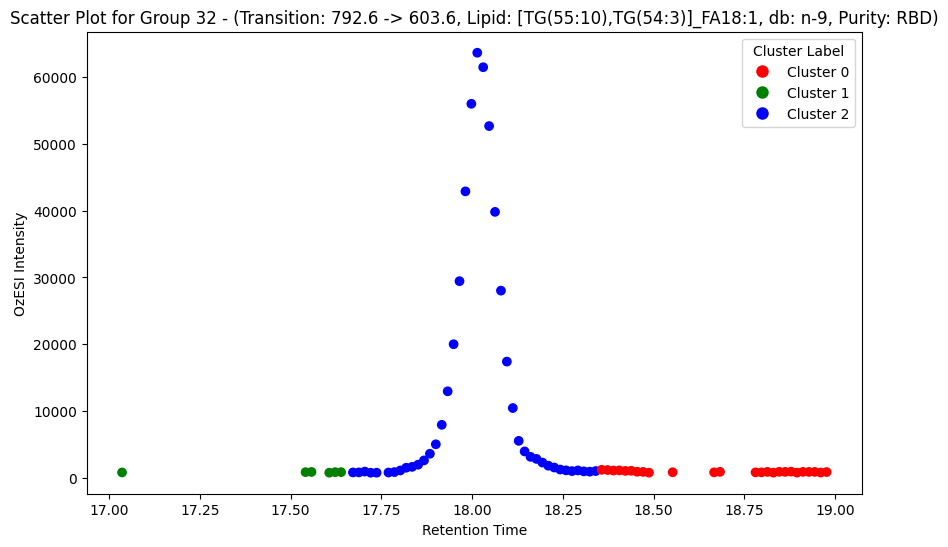

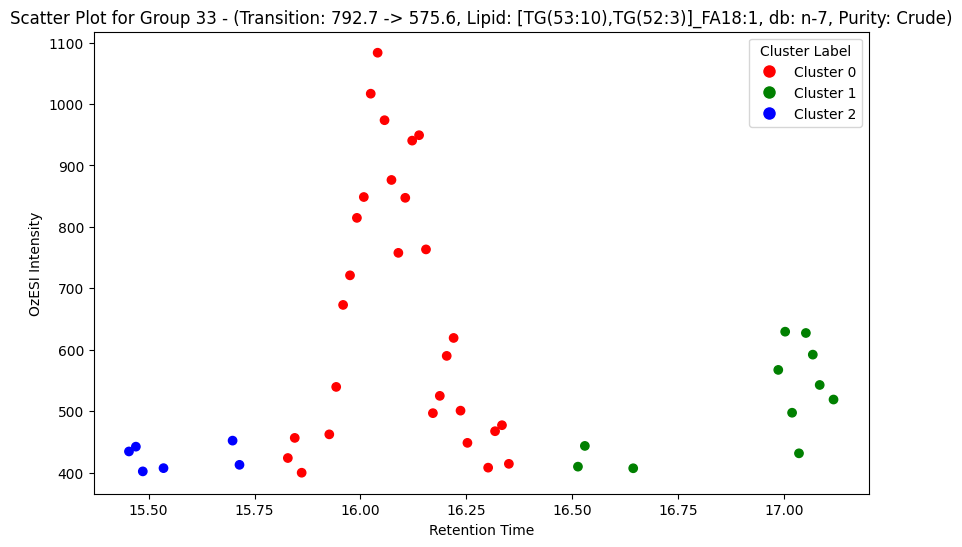

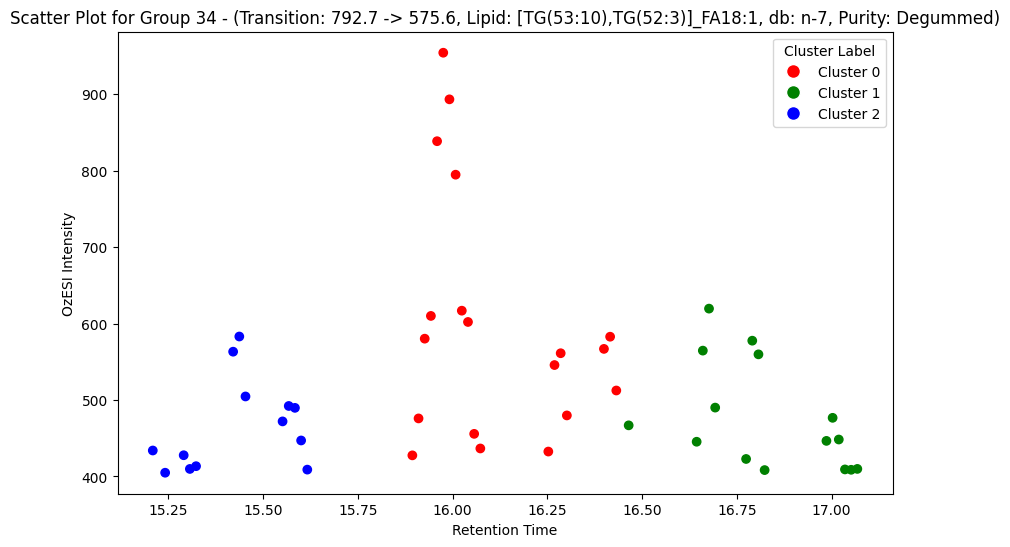

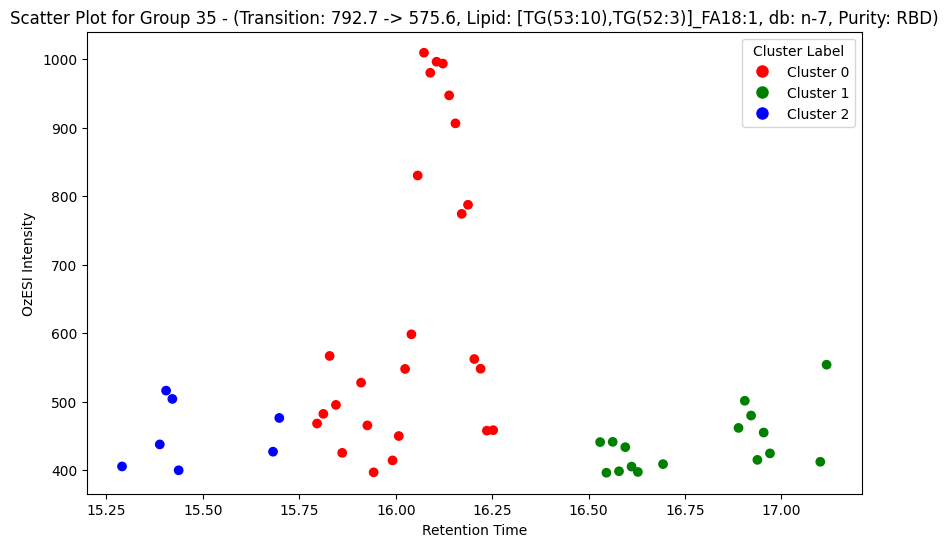

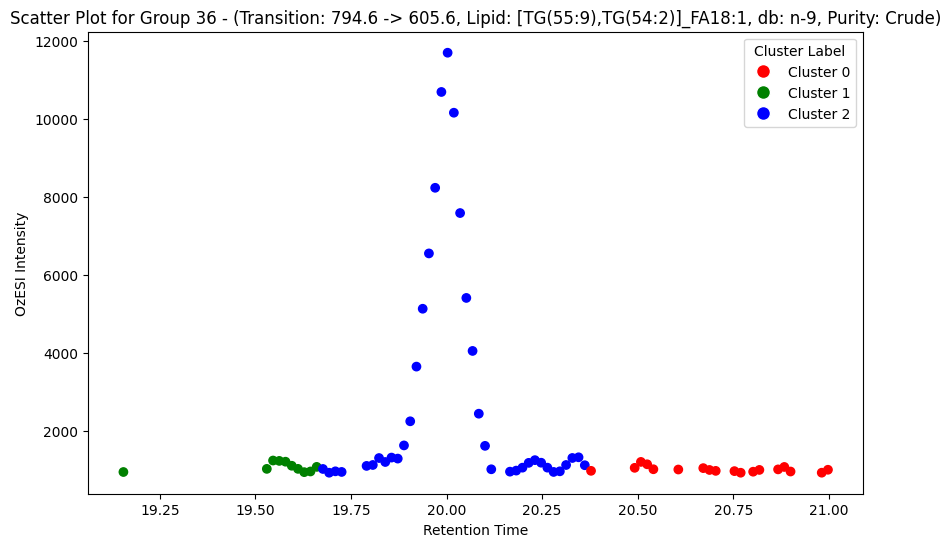

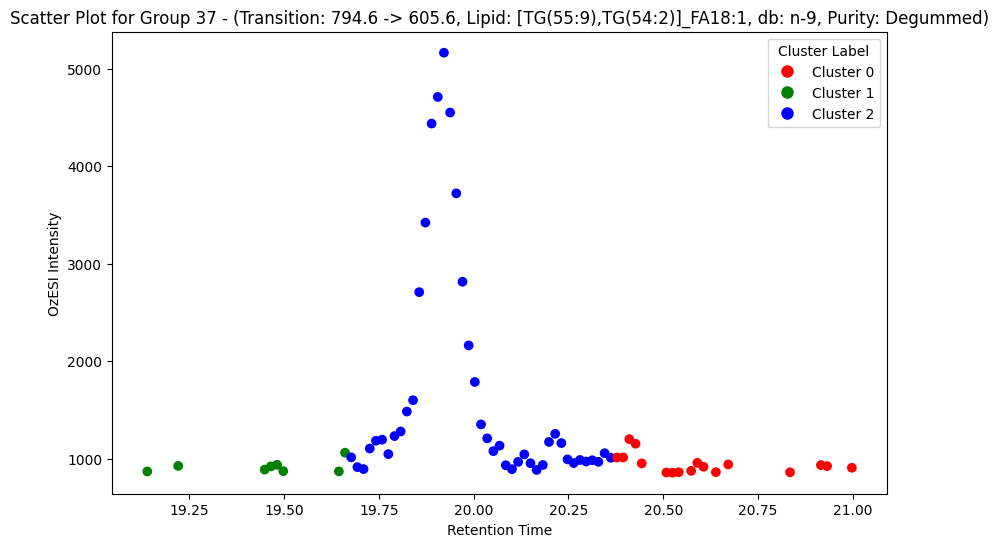

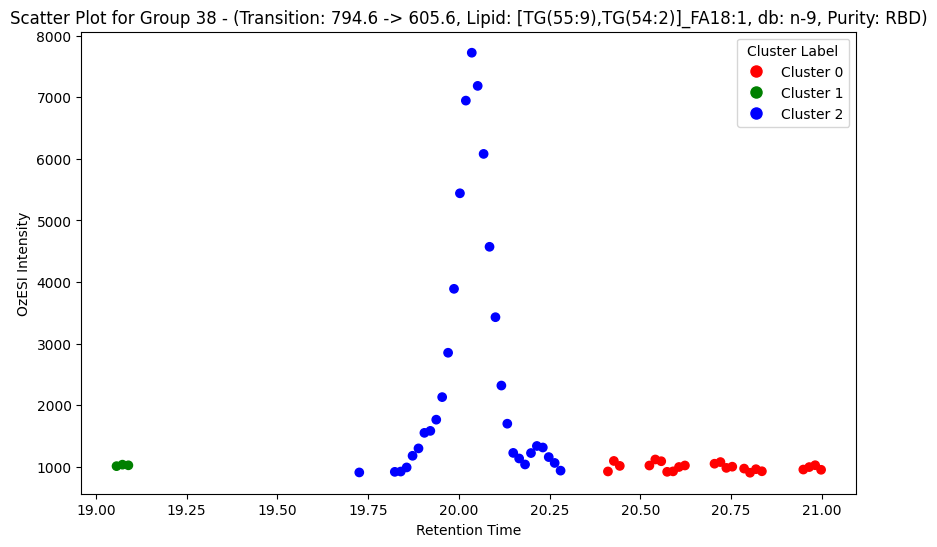

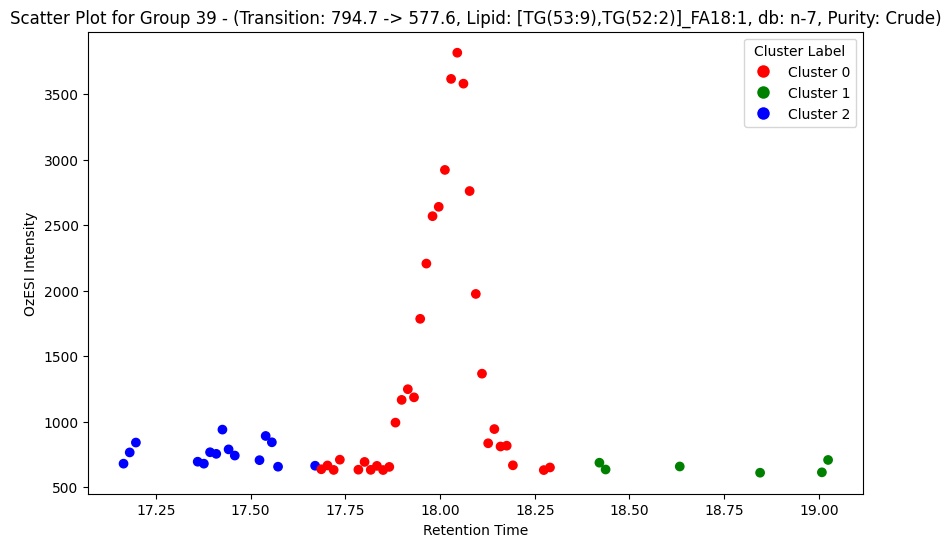

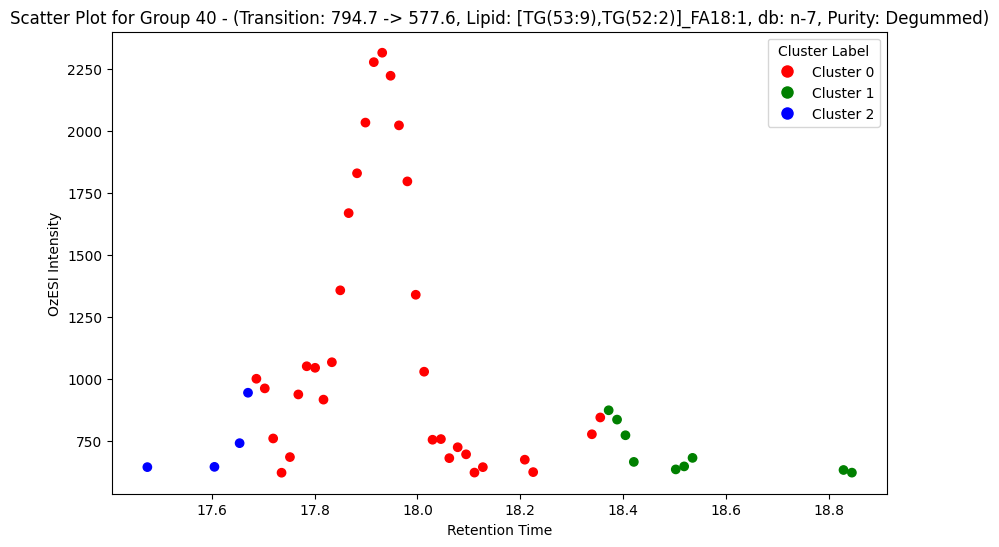

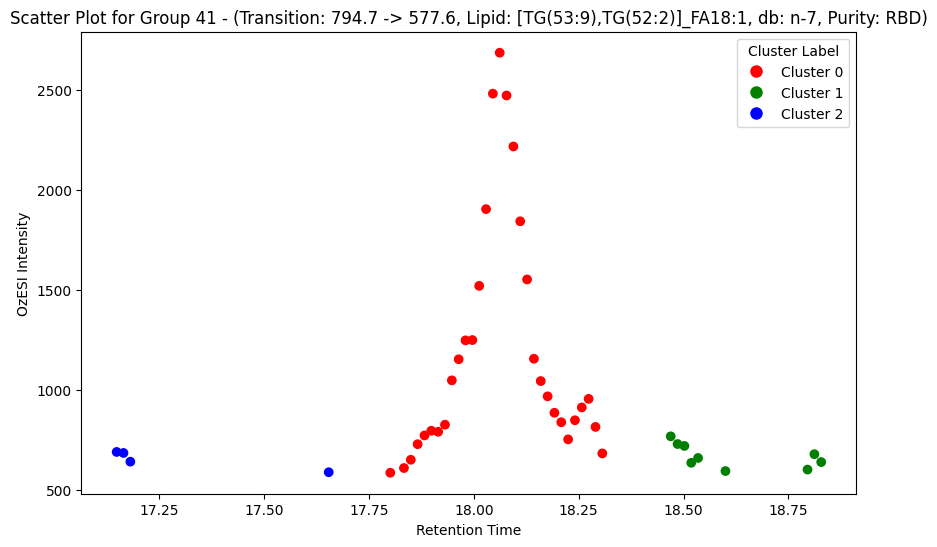

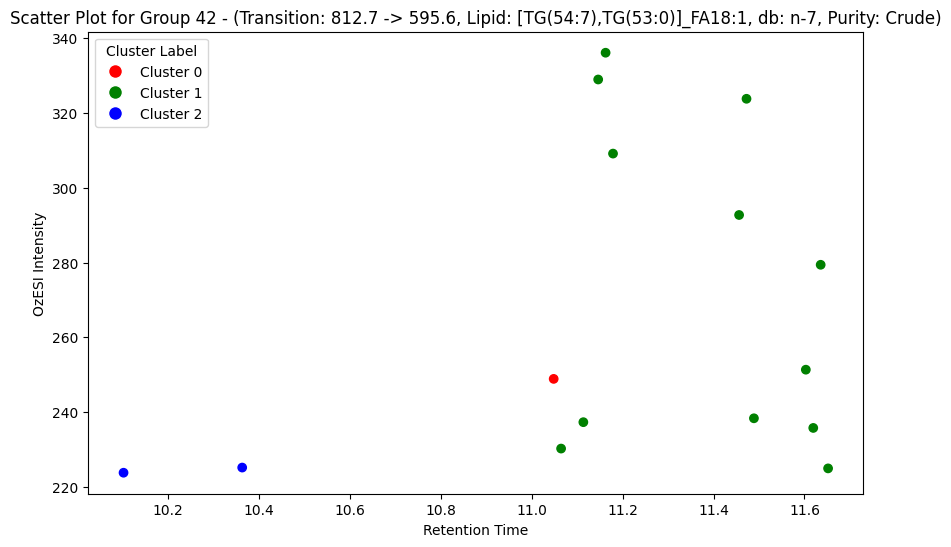

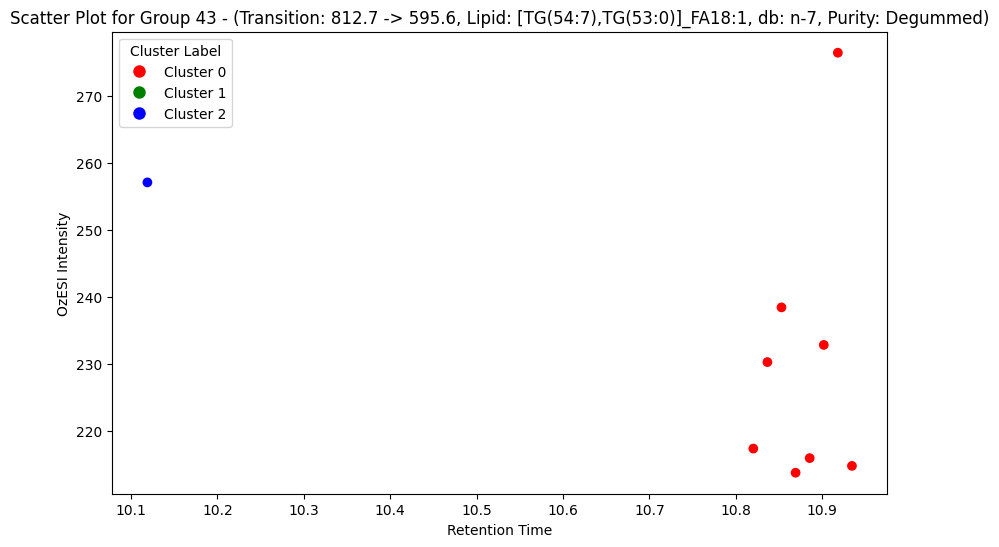

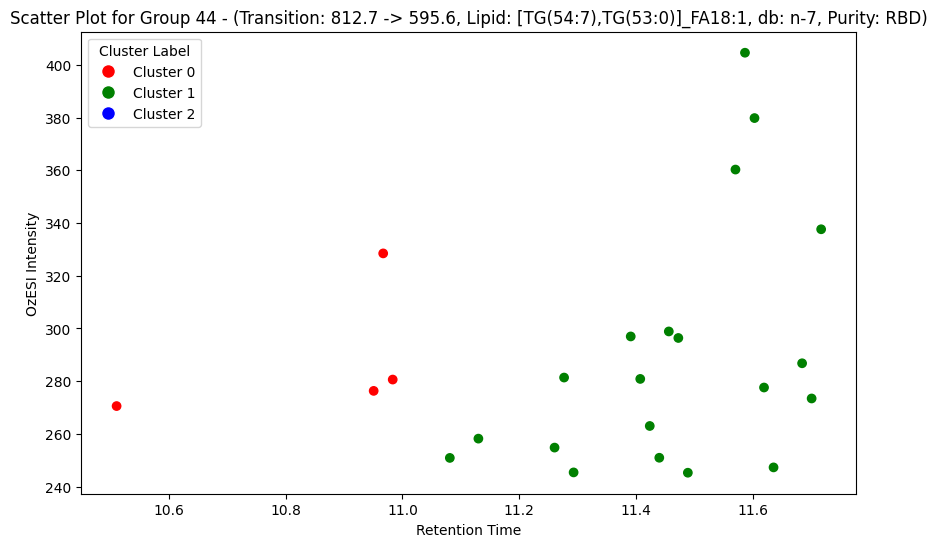

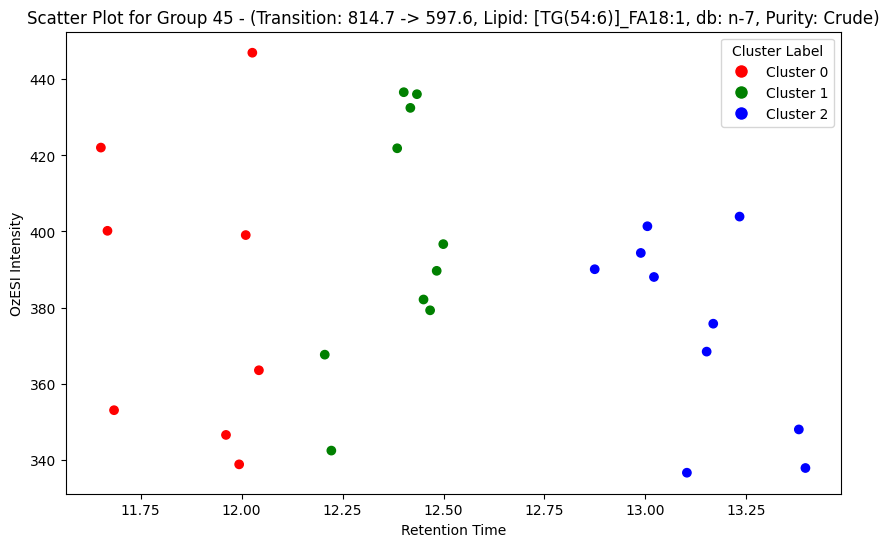

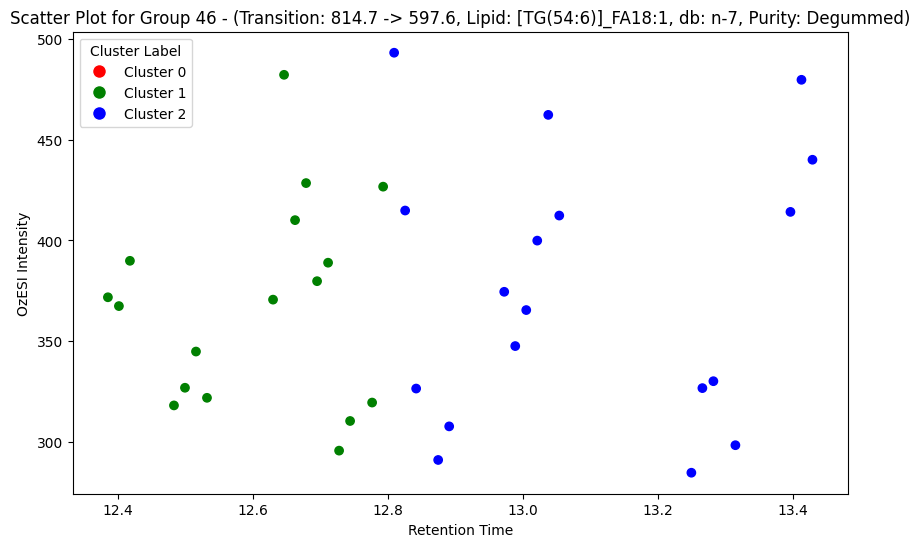

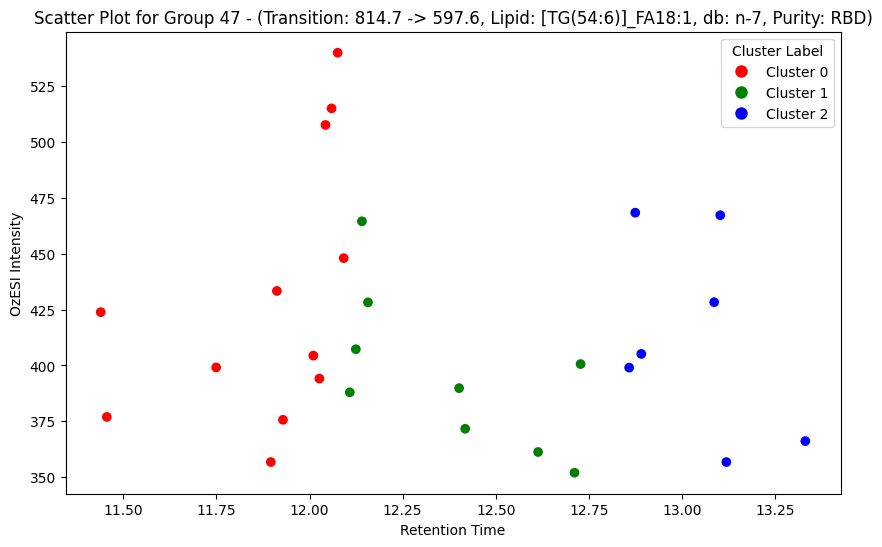

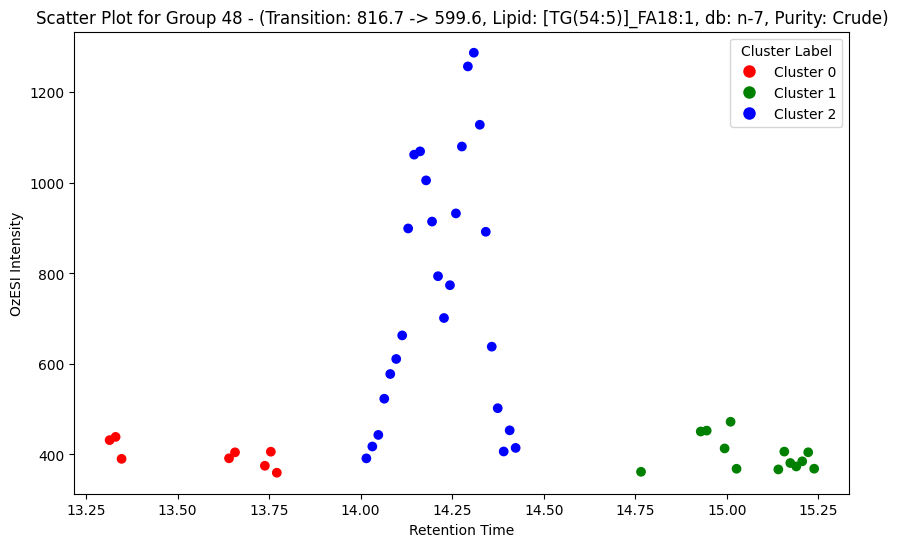

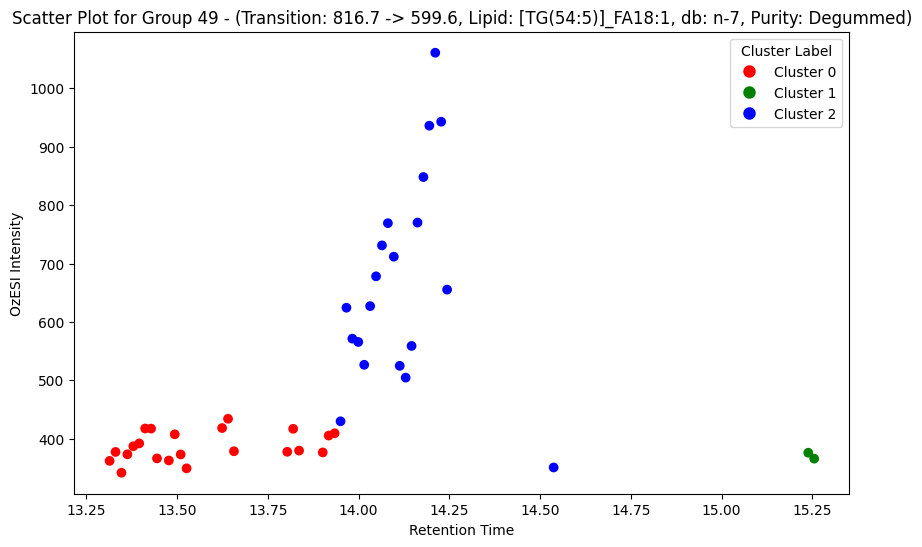

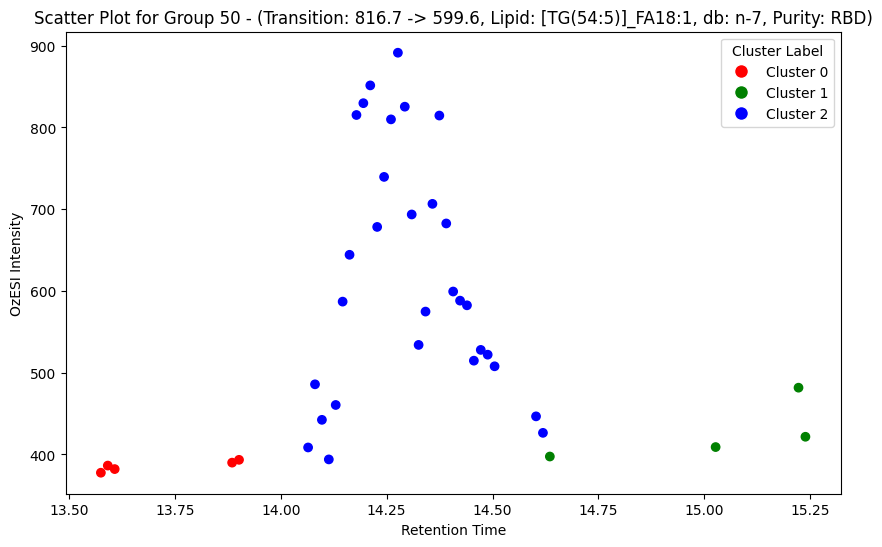

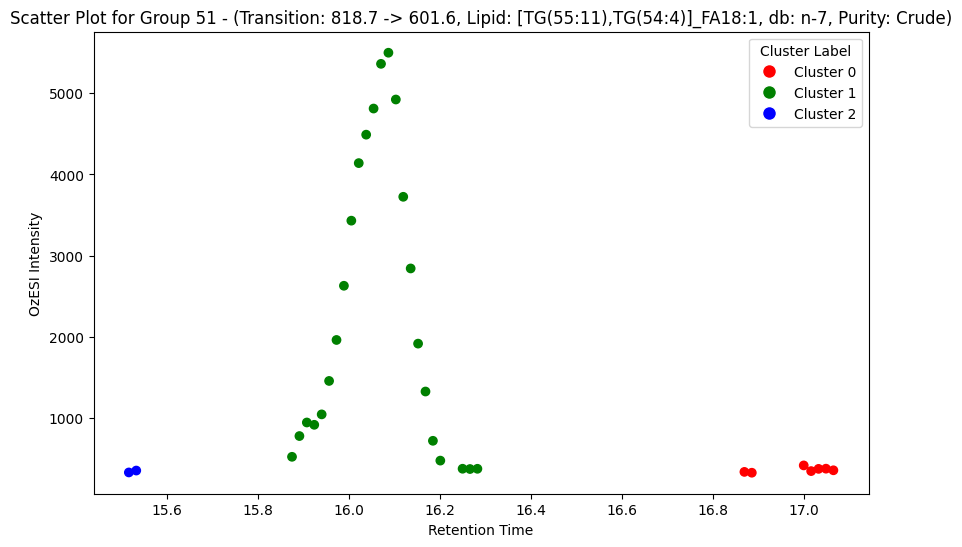

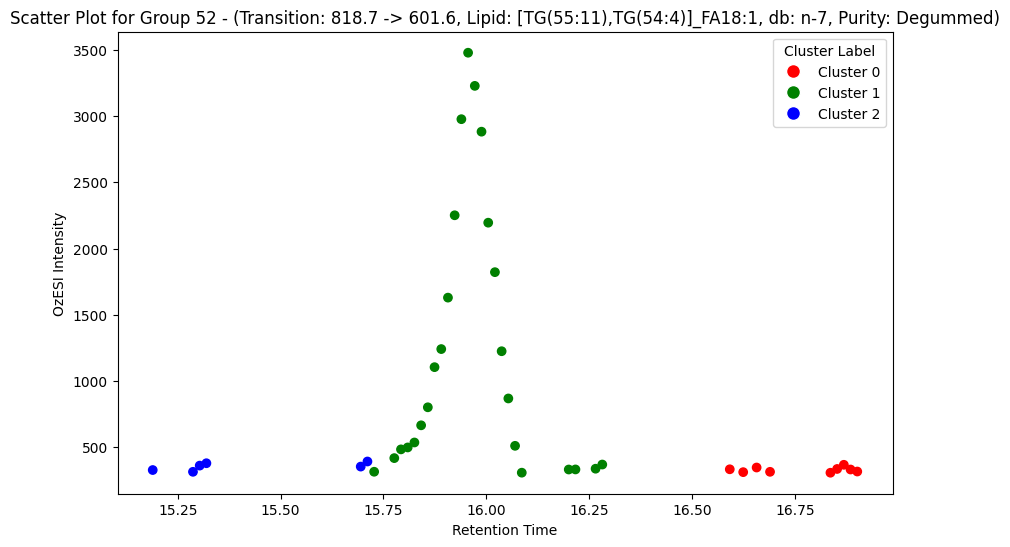

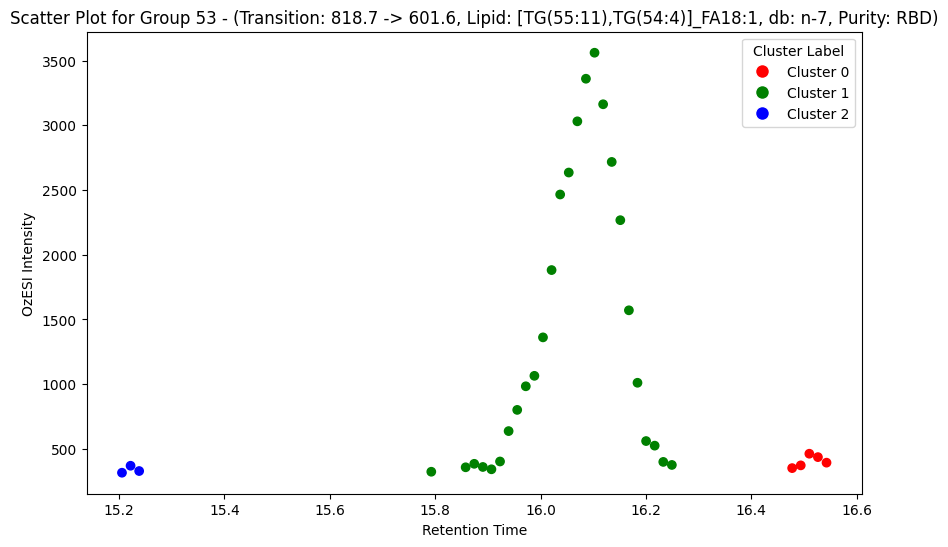

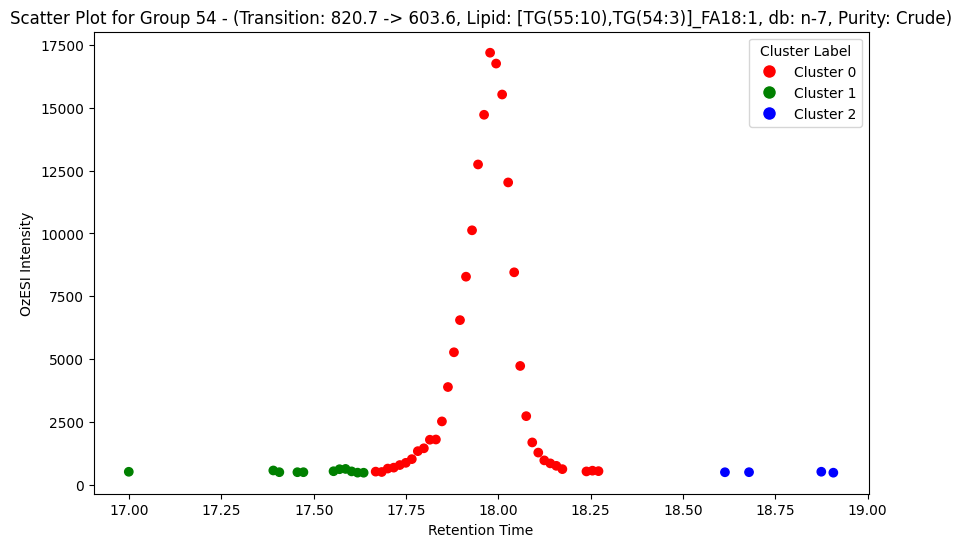

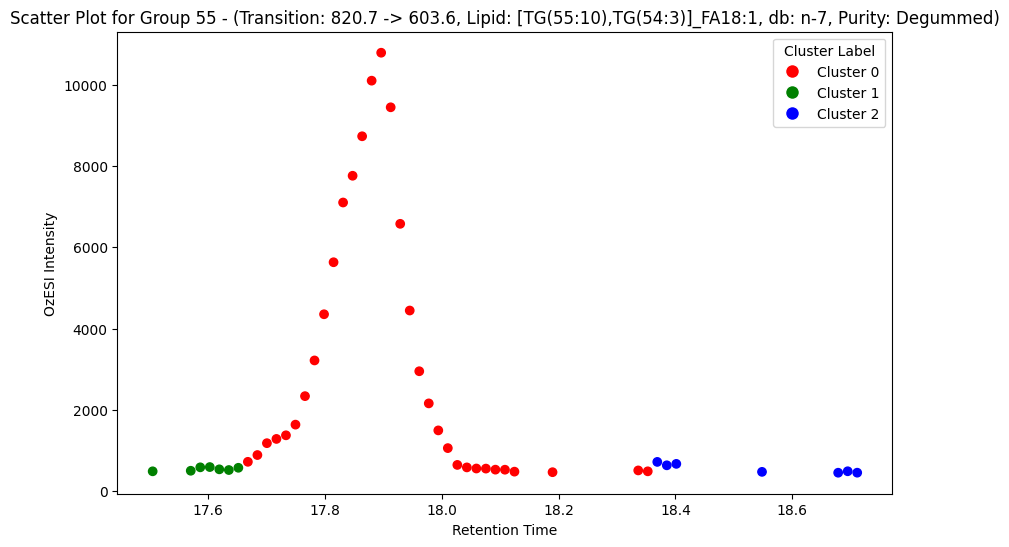

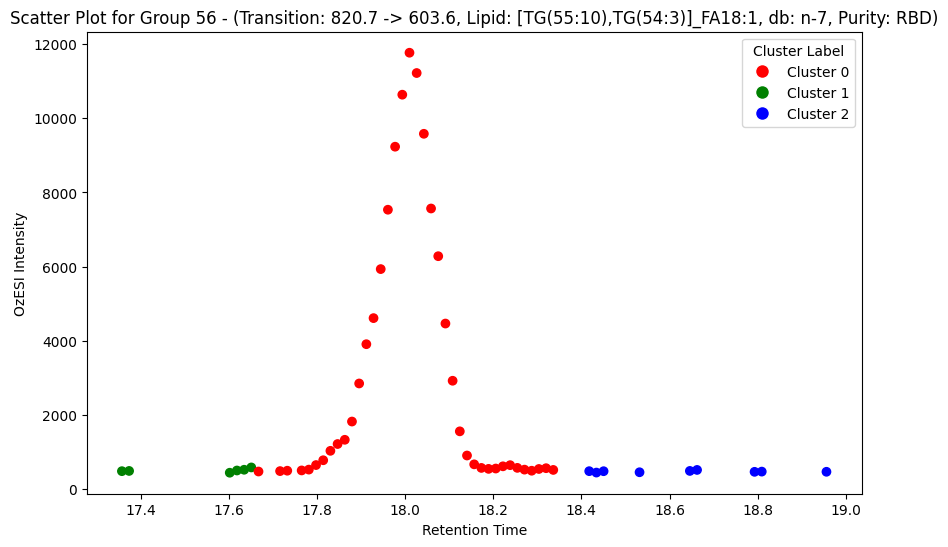

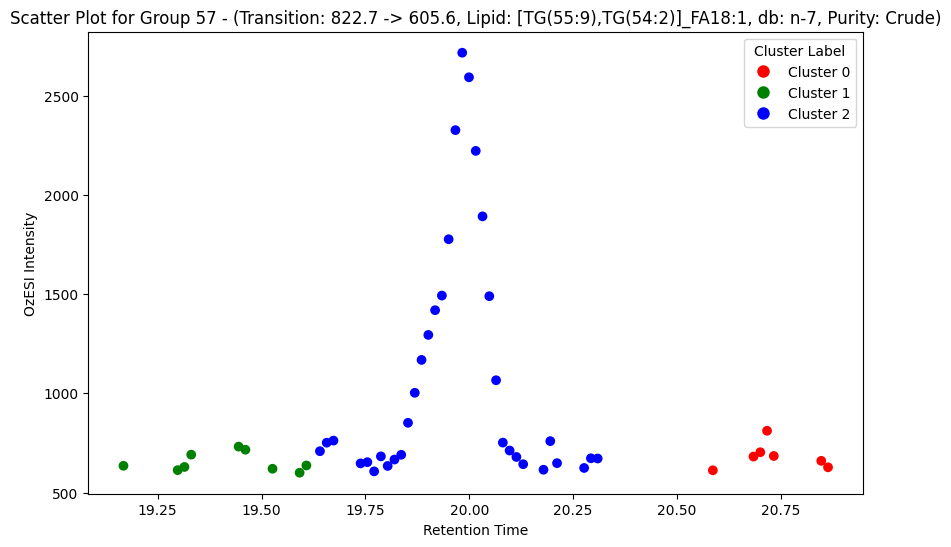

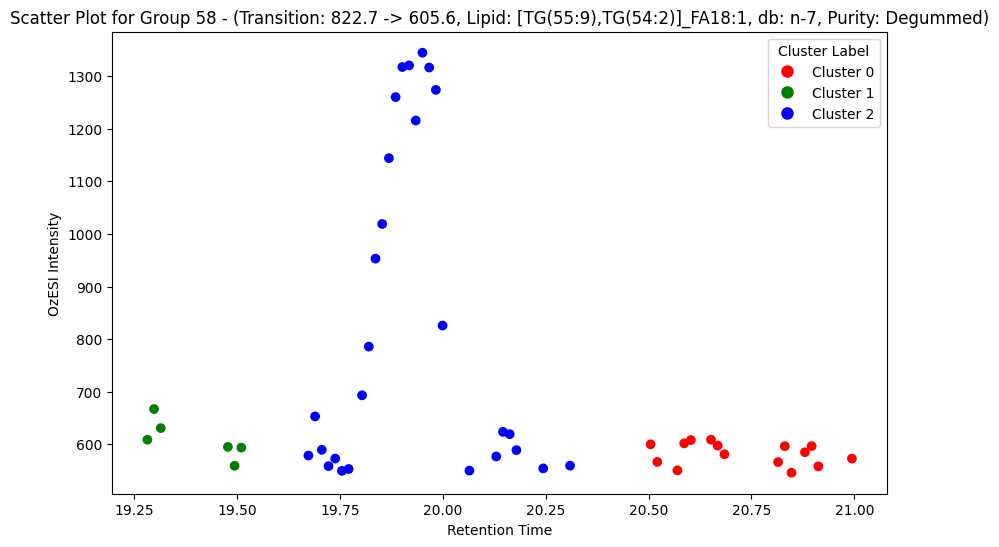

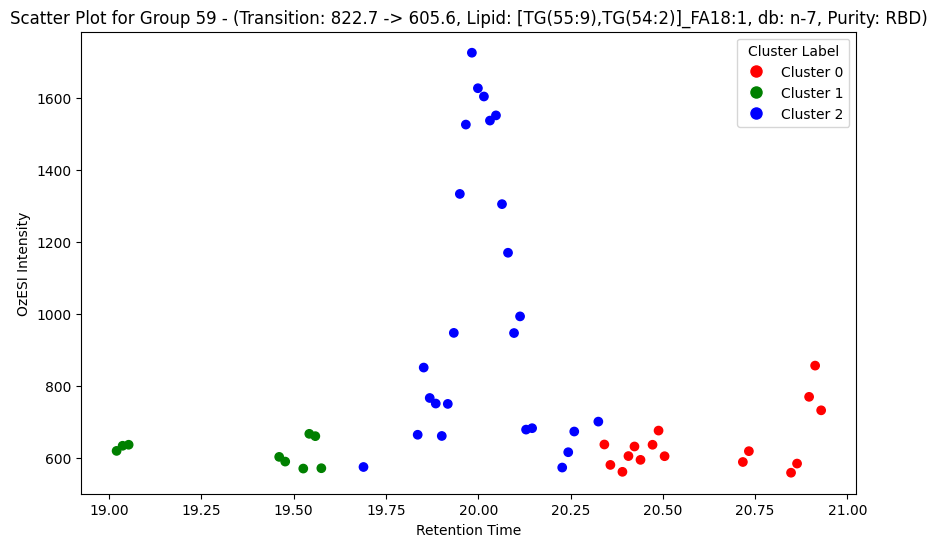

In [2412]:
import matplotlib.pyplot as plt
import os

# Assuming 'Purity' and 'Cluster_Label' are categorical columns in d5e

# Define a color map for Cluster_Label
cluster_label_color_map = {
    0: 'red',
    1: 'green',
    2: 'blue',
    # Add more colors if there are more Cluster_Label values
}

# Define the directory where the plots will be saved
save_directory = 'Projects/canola/plots/val_purity/'  # Update this path to your desired directory

# Get unique Group values from d5e
unique_groups = d5['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = d5e[d5e['Group'] == group]

    if not group_filtered_data.empty:
        # Continue with your existing code
        # Map Cluster_Label values to colors
        cluster_colors = group_filtered_data['Cluster_Label'].map(cluster_label_color_map)

        # Extract values
        transition_value = group_filtered_data['Transition'].iloc[0]
        lipid_name = group_filtered_data['Lipid'].iloc[0]
        db_value = group_filtered_data['db'].iloc[0]
        purity_value = group_filtered_data['Purity'].iloc[0]
        

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], c=cluster_colors, label='Cluster Label')

    # Add labels and title including Purity
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value}, Purity: {purity_value})')

    # Create a legend for Cluster Labels
    cluster_patches = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label}', markersize=10, markerfacecolor=color) for label, color in cluster_label_color_map.items()]
    plt.legend(handles=cluster_patches, title='Cluster Label')

    # Save the plot as a PNG file
    filename = f'{lipid_name}_{db_value}_{purity_value}.png'
    plt.savefig(os.path.join(save_directory, filename), bbox_inches='tight')

    # Show the plot
    plt.show()



In [2413]:
import pandas as pd
d5h = d5g.copy()
# Assuming d5 is your DataFrame
# First, find the row in each group with the max OzESI_Intensity
max_intensity_rows = d5h.loc[d5h.groupby(['Lipid', 'Sample_ID', 'db'])['OzESI_Intensity'].idxmax()]

# Create a new DataFrame with the necessary columns
max_rt_df = max_intensity_rows[['Lipid', 'Sample_ID', 'db', 'Retention_Time']]

# Rename the 'Retention_Time' column to 'Cluster_RT'
max_rt_df.rename(columns={'Retention_Time': 'Cluster_RT'}, inplace=True)
#round the retention time to 2 decimal places
max_rt_df['Cluster_RT'] = max_rt_df['Cluster_RT'].round(2)

# Merge this back with the original d5h DataFrame
# This adds the 'Cluster_RT' column to d5h, aligning each row with its corresponding retention time for the max intensity
d5h = pd.merge(d5h, max_rt_df, on=['Lipid', 'Sample_ID', 'db'])

# Now d5h will have an additional column 'Cluster_RT' which is the retention time for the max intensity for each Lipid-Cluster for each Sample_ID
d5h

import pandas as pd

# Assuming d5h is your DataFrame and Lipid is a column in it
# Filter rows where the Lipid column contains the string "TG(54:2)"
filtered_rows = d5h[d5h['Lipid'].str.contains("TG\(52:3\)")]

# Print the filtered rows from the Lipid column
filtered_rows

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
195        764.6        575.6       15.328133       862.140076   
196        764.6        575.6       15.507517       885.880066   
197        764.6        575.6       15.523833       939.660095   
198        764.6        575.6       15.540133       838.560059   
199        764.6        575.6       15.621683       835.380066   
...          ...          ...             ...              ...   
1418       792.7        575.6       16.937533       415.200043   
1419       792.7        575.6       16.953833       455.080017   
1420       792.7        575.6       16.970150       424.640045   
1421       792.7        575.6       17.100600       412.380035   
1422       792.7        575.6       17.116917       554.080017   

                             Sample_ID      Transition   db  \
195   CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  n-9   
196   CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  n-9   
197   CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  n-9   
198   CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  n-9   
199   CrudeCanola_O3on_150gN3_02082023  764.6 -> 575.6  n-9   
...                                ...             ...  ...   
1418    RBDCanola_O3on_150gN3_02082023  792.7 -> 575.6  n-7   
1419    RBDCanola_O3on_150gN3_02082023  792.7 -> 575.6  n-7   
1420    RBDCanola_O3on_150gN3_02082023  792.7 -> 575.6  n-7   
1421    RBDCanola_O3on_150gN3_02082023  792.7 -> 575.6  n-7   
1422    RBDCanola_O3on_150gN3_02082023  792.7 -> 575.6  n-7   

                            Lipid  Cluster_Label Purity  Group   Area_RT  \
195   [TG(53:10),TG(52:3)]_FA18:1              0  Crude      6  0.619700   
196   [TG(53:10),TG(52:3)]_FA18:1              0  Crude      6  0.619700   
197   [TG(53:10),TG(52:3)]_FA18:1              0  Crude      6  0.619700   
198   [TG(53:10),TG(52:3)]_FA18:1              0  Crude      6  0.619700   
199   [TG(53:10),TG(52:3)]_FA18:1              0  Crude      6  0.619700   
...                           ...            ...    ...    ...       ...   
1418  [TG(53:10),TG(52:3)]_FA18:1              1    RBD     35  0.652333   
1419  [TG(53:10),TG(52:3)]_FA18:1              1    RBD     35  0.652333   
1420  [TG(53:10),TG(52:3)]_FA18:1              1    RBD     35  0.652333   
1421  [TG(53:10),TG(52:3)]_FA18:1              1    RBD     35  0.652333   
1422  [TG(53:10),TG(52:3)]_FA18:1              1    RBD     35  0.652333   

       Area  Area_HW                                    Group_Intensity  \
195   439.0    600.0  [465.1200256347656, 514.8400268554688, 524.380...   
196   439.0    600.0  [465.1200256347656, 514.8400268554688, 524.380...   
197   439.0    600.0  [465.1200256347656, 514.8400268554688, 524.380...   
198   439.0    600.0  [465.1200256347656, 514.8400268554688, 524.380...   
199   439.0    600.0  [465.1200256347656, 514.8400268554688, 524.380...   
...     ...      ...                                                ...   
1418  224.0    343.0  [133.6800079345703, 155.9400177001953, 169.620...   
1419  224.0    343.0  [133.6800079345703, 155.9400177001953, 169.620...   
1420  224.0    343.0  [133.6800079345703, 155.9400177001953, 169.620...   
1421  224.0    343.0  [133.6800079345703, 155.9400177001953, 169.620...   
1422  224.0    343.0  [133.6800079345703, 155.9400177001953, 169.620...   

      Group_Threshold  Area_DDT  Area_HW_DDT  Cluster_RT  
195             826.0     328.0        363.0       16.09  
196             826.0     328.0        363.0       16.09  
197             826.0     328.0        363.0       16.09  
198             826.0     328.0        363.0       16.09  
199             826.0     328.0        363.0       16.09  
...               ...       ...          ...         ...  
1418            393.0     252.0        325.0       16.07  
1419            393.0     252.0        325.0       16.07  
1420            393.0     252.0        325.0       16.07  
1421            393.0     252.0        325.0       1

# compare d5 cluster RT to ground truth RT in df_db_pos

In [2414]:
import pandas as pd
import numpy as np

# Step 1: Create a mapping from Lipid to ground truth Retention_Time in df_db_pos
ground_truth_rt = dict(zip(df_db_pos['Lipid'], df_db_pos['Retention_Time']))

# # Step 2: Calculate the distance to the ground truth for each row in d5h
# d5['distance_to_truth'] = d5.apply(lambda row: abs(row['Cluster_RT'] - ground_truth_rt.get(row['Lipid'], np.nan)), axis=1)
# Step 2: Calculate the distance to the ground truth for each row in d5
d5h['distance_to_truth'] = d5h.apply(lambda row: abs(row['Retention_Time'] - ground_truth_rt.get(row['Lipid'], np.nan)), axis=1)

# Step 3: Retain only the cluster closest to the ground truth for each Sample_ID and Lipid
closest_clusters = d5h.loc[d5h.groupby(['Sample_ID', 'Lipid','db'])['distance_to_truth'].idxmin()]

# # Optional: Drop the 'distance_to_truth' column if no longer needed
# closest_clusters = closest_clusters.drop(columns=['distance_to_truth'])

closest_clusters

d5h = closest_clusters.copy()
d5h



Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
990        790.7        573.6       14.312883       615.420044   
89         762.6        573.6       14.317517      1863.420166   
674        788.6        571.6       12.552550       230.200012   
14         760.6        571.6       12.491483       300.120026   
1304       792.7        575.6       16.122117       940.400085   
218        764.6        575.6       16.127217      2959.280273   
1647       794.7        577.6       18.045533      3814.960205   
357        766.7        577.6       18.034800     16069.981445   
1918       816.7        599.6       14.292833      1257.220093   
712        788.6        599.6       14.297500      4674.780273   
1815       814.7        597.6       12.434183       436.100037   
595        786.6        597.6       12.423000       905.760071   
1756       812.7        595.6       11.048483       248.880020   
539        784.6        595.6       10.499583       252.200012   
2161       820.7        603.6       17.993817     16755.121094   
1112       792.6        603.6       17.998017     94700.367188   
2038       818.7        601.6       16.086233      5501.260254   
862        790.6        601.6       16.074600     27000.621094   
2308       822.7        605.6       19.999217      2592.680176   
1450       794.6        605.6       20.002950     11693.081055   
1032       790.7        573.6       14.280283       316.920013   
135        762.6        573.6       14.317533       508.200043   
677        788.6        571.6       12.487350       236.740021   
34         760.6        571.6       12.475217       352.800018   
1352       792.7        575.6       16.073217       436.660034   
254        764.6        575.6       16.127250       804.960083   
1691       794.7        577.6       18.045550       757.500061   
426        766.7        577.6       18.034817      1878.320190   
1980       816.7        599.6       14.243933       655.320068   
788        788.6        599.6       14.297533       696.620056   
1832       814.7        597.6       12.417917       389.900024   
619        786.6        597.6       12.406733       380.460022   
1770       812.7        595.6       10.820200       217.380020   
561        784.6        595.6       10.776850       299.740021   
2207       820.7        603.6       17.993833      1493.840088   
1174       792.6        603.6       17.998033      5256.580566   
2082       818.7        601.6       16.086267       306.380035   
907        790.6        601.6       16.074617      1101.340088   
2355       822.7        605.6       19.999233       825.720032   
1517       794.6        605.6       20.002967      1786.740112   
1054       790.7        573.6       14.312883       492.080048   
169        762.6        573.6       14.317517      1269.480103   
687        788.6        571.6       12.780867       262.640015   
65         760.6        571.6       12.149033       316.280029   
1398       792.7        575.6       16.122133       993.520081   
300        764.6        575.6       16.127233      2530.780273   
1728       794.7        577.6       18.045533      2483.460205   
486        766.7        577.6       18.034800      7909.340332   
2003       816.7        599.6       14.292833       825.460083   
825        788.6        599.6       14.297500      2841.880127   
1882       814.7        597.6       12.417900       371.680023   
649        786.6        597.6       12.423017       397.800018   
1778       812.7        595.6       10.510333       270.540009   
570        784.6        595.6       10.760517       309.520020   
2249       820.7        603.6       17.993800     10638.360352   
1236       792.6        603.6       17.998000     56029.765625   
2114       818.7        601.6       16.086233      3359.160156   
953        790.6        601.6       16.074600     13130.800781   
2398       822.7        605.6       19.999217      1626.700073   
1572       794.6        605.6       20.002950 

In [2415]:
# # Assuming d5a is your actual DataFrame and contains Groups 4 and 27

# # Extract the 'Area' for Group 4
# area_group_4 = d5f[d5f['Group'] == 4]['Area_DDT'].iloc[0] if not d5f[d5f['Group'] == 4].empty else "Group 4 not found"

# # Extract the 'Area_DDT' for Group 27
# area_group_27 = d5f[d5f['Group'] == 28]['Area_DDT'].iloc[0] if not d5f[d5f['Group'] == 28].empty else "Group 27 not found"

# print("Area_DDT for Group 4:", area_group_4)
# print("Area_DDT for Group 28:", area_group_27)


# Remove clusters not being used

In [2416]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first

d6 = d5h.copy()
# Assuming your DataFrame is named d6
d6 = d6[d6['db'] != '']
d6




#sort d6 by max OzESI_Intensity
d6 = d6.sort_values(by='OzESI_Intensity', ascending=False)

d6 = d6.groupby(['Lipid', 'Sample_ID', 'db']).first().reset_index()



#round the retention time to 2 decimal places
d6['Retention_Time'] = d6['Retention_Time'].round(2)
#round intensity to 0 decimal places
d6['OzESI_Intensity'] = d6['OzESI_Intensity'].round(0)

d6

Lipid                            Sample_ID   db  \
0             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
1             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
2             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
3             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
4             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
5             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
6             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
7             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
8             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
9             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
10            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
11            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
12  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
13  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
14  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
15  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
16  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
17  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
18   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
19   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
20   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
21   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
22   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
23   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
24            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
25            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
26            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
27            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
28            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
29            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
30            [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
31            [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
32            [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
33            [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
34            [TG(54:6)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
35            [TG(54:6)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
36   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
37   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
38   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
39   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
40   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
41   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
42  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
43  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
44  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
45  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
46  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
47  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
48  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
49  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
50  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
51  [TG(55:11),TG(54:4

Calculate Area Ratio

In [2417]:
# import pandas as pd

# # Filter for 'n-9' and 'n-7' in the 'db' column
# filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# # Group by 'Lipid' and 'Sample_ID'
# grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# # DataFrame for Area Ratios
# area_ratios = pd.DataFrame(columns=['Lipid', 'Sample_ID', 'Area_Ratio'])

# # Calculate Area Ratio for each group
# for (lipid, sample_id), group in grouped:
#     n9_area = group[group['db'] == 'n-9']['Area'].sum()  # Sum if there are multiple 'n-9' entries
#     n7_area = group[group['db'] == 'n-7']['Area'].sum()  # Sum if there are multiple 'n-7' entries
#     ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

#     # Append to DataFrame
#     area_ratios = area_ratios.append({
#         'Lipid': lipid,
#         'Sample_ID': sample_id,
#         'Area_Ratio': ratio
#     }, ignore_index=True)

# # Merge the Area Ratio DataFrame with the original DataFrame
# d7 = pd.merge(d6, area_ratios, on=['Lipid', 'Sample_ID'], how='left')

# d7.head(50)  # Display the updated DataFrame with 'Area_Ratio'


# calculte area Ratio for one

In [2418]:
# import pandas as pd

# # Assume d6 is your original DataFrame

# # Filter for 'n-9' and 'n-7' in the 'db' column
# filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# # Group by 'Lipid' and 'Sample_ID'
# grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# # Initialize Area_Ratio column in the original DataFrame
# d6['Area_Ratio'] = None

# # Calculate Area Ratio for each group and update the original DataFrame
# for (lipid, sample_id), group in grouped:
#     if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
#         n9_area = group[group['db'] == 'n-9']['Area'].sum()
#         n7_area = group[group['db'] == 'n-7']['Area'].sum()
#         ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

#         # Update only relevant rows in the original DataFrame
#         indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
#         d6.loc[indices, 'Area_Ratio'] = ratio

# # Now d6 should have the correctly assigned Area_Ratio
# d6  # Display the updated DataFrame



import pandas as pd

# Assume d6 is your original DataFrame

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# Initialize Area_Ratio column in the original DataFrame
d6['Area_Ratio_DDT'] = None

# Calculate Area Ratio for each group and update the original DataFrame
for (lipid, sample_id), group in grouped:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        n9_area = group[group['db'] == 'n-9']['Area_DDT'].sum()
        n7_area = group[group['db'] == 'n-7']['Area_DDT'].sum()
        ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

        # Update only relevant rows in the original DataFrame
        indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
        d6.loc[indices, 'Area_Ratio_DDT'] = ratio



# Now d6 should have the correctly assigned Area_Ratio
d6  # Display the updated DataFrame


Lipid                            Sample_ID   db  \
0             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
1             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
2             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
3             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
4             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
5             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
6             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
7             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
8             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
9             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
10            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
11            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
12  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
13  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
14  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
15  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
16  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
17  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
18   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
19   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
20   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
21   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
22   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
23   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
24            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
25            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
26            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
27            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
28            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
29            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
30            [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
31            [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
32            [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
33            [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
34            [TG(54:6)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
35            [TG(54:6)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
36   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
37   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
38   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
39   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
40   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
41   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
42  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
43  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
44  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
45  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
46  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
47  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
48  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
49  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
50  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
51  [TG(55:11),TG(54:4

# Calculate Area for all 4

In [2419]:
# Assuming 'd6' is your pandas DataFrame and contains the necessary columns and data

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# Initialize the Ratio columns in the original DataFrame
d6['Area_Ratio'] = None
d6['Area_HW_Ratio'] = None
d6['Area_DDT_Ratio'] = None
d6['Area_HW_DDT_Ratio'] = None

# Calculate Area Ratio for each group and update the original DataFrame
for (lipid, sample_id), group in grouped:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        # Ratio based on Area
        n9_area = group[group['db'] == 'n-9']['Area'].sum()
        n7_area = group[group['db'] == 'n-7']['Area'].sum()
        area_ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

        # Ratio based on Area_HW
        n9_area_hw = group[group['db'] == 'n-9']['Area_HW'].sum()
        n7_area_hw = group[group['db'] == 'n-7']['Area_HW'].sum()
        area_hw_ratio = round(n9_area_hw / n7_area_hw, 2) if n7_area_hw != 0 else None

        # Ratio based on Area_DDT
        n9_area_ddt = group[group['db'] == 'n-9']['Area_DDT'].sum()
        n7_area_ddt = group[group['db'] == 'n-7']['Area_DDT'].sum()
        area_ddt_ratio = round(n9_area_ddt / n7_area_ddt, 2) if n7_area_ddt != 0 else None

        # Ratio based on Area_HW_DDT
        n9_area_hw_ddt = group[group['db'] == 'n-9']['Area_HW_DDT'].sum()
        n7_area_hw_ddt = group[group['db'] == 'n-7']['Area_HW_DDT'].sum()
        area_hw_ddt_ratio = round(n9_area_hw_ddt / n7_area_hw_ddt, 2) if n7_area_hw_ddt != 0 else None

        # Update only relevant rows in the original DataFrame
        indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
        d6.loc[indices, 'Area_Ratio'] = area_ratio
        d6.loc[indices, 'Area_HW_Ratio'] = area_hw_ratio
        d6.loc[indices, 'Area_DDT_Ratio'] = area_ddt_ratio
        d6.loc[indices, 'Area_HW_DDT_Ratio'] = area_hw_ddt_ratio

# The d6 DataFrame now has four new columns for each type of ratio
d6.head()  # Display the first few rows of the updated DataFrame


Lipid                            Sample_ID   db  Parent_Ion  \
0  [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       790.7   
1  [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       762.6   
2  [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       790.7   
3  [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       762.6   
4  [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       790.7   

   Product_Ion  Retention_Time  OzESI_Intensity      Transition  \
0        573.6           14.31            615.0  790.7 -> 573.6   
1        573.6           14.32           1863.0  762.6 -> 573.6   
2        573.6           14.28            317.0  790.7 -> 573.6   
3        573.6           14.32            508.0  762.6 -> 573.6   
4        573.6           14.31            492.0  790.7 -> 573.6   

   Cluster_Label    Purity  ...  Group_Threshold  Area_DDT  Area_HW_DDT  \
0              2     Crude  ...            284.0     133.0        120.0   
1              0     Crude  ...            328.0     397.0        245.0   
2              2  Degummed  ...            278.0     229.0        344.0   
3              0  Degummed  ...            366.0     427.0        186.0   
4              2       RBD  ...            294.0     169.0        225.0   

   Cluster_RT distance_to_truth  Area_Ratio_DDT  Area_Ratio  Area_HW_Ratio  \
0       14.31          0.007117            2.98        1.96           2.04   
1       14.30          0.002483            2.98        1.96           2.04   
2       14.20          0.039717            1.86        1.96           0.54   
3       14.19          0.002467            1.86        1.96           0.54   
4       14.31          0.007117            2.11        1.75           1.01   

   Area_DDT_Ratio  Area_HW_DDT_Ratio  
0            2.98               2.04  
1            2.98               2.04  
2            1.86               0.54  
3            1.86               0.54  
4            2.11               1.34  

[5 rows x 25 columns]

FAC and TG sorting

In [2420]:
import pandas as pd

# Assume d6 is your DataFrame

# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
d6['FAC'] = d6['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
d6['TG'] = d6['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
d6['TG'] = d6['TG'].apply(sort_tg_values)
d6 = d6.sort_values(by=['FAC', 'TG'])

# Display the DataFrame
d6


Lipid                            Sample_ID   db  \
18   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
19   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
20   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
21   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
22   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
23   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
12  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
13  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
14  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
15  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
16  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
17  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
0             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
1             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
2             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
3             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
4             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
5             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
6             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
7             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
8             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
9             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
10            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
11            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
36   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
37   [TG(54:7),TG(53:0)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
38   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
39   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
40   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
41   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
54   [TG(55:9),TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
55   [TG(55:9),TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
56   [TG(55:9),TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
57   [TG(55:9),TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
58   [TG(55:9),TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
59   [TG(55:9),TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
42  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
43  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
44  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
45  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
46  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
47  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
48  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
49  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
50  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
51  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
52  [TG(55:11),TG(54:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
53  [TG(55:11),TG(54:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
24            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
25            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
26            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
27            [TG(54:5

In [2421]:
import pandas as pd

# Assuming d6 and df_db_pos are your DataFrames and user_window is the time window specified by the user
user_window = 0.2  # Replace 0.5 with the value specified by the user

# Copy d6 to d7
d7 = d6.copy()

# Iterate over each row in d7
for index, row in d7.iterrows():
    # Extract Lipid and Retention_Time from the row in d7
    lipid = row['Lipid']
    retention_time_d7 = row['Retention_Time']

    # Find the corresponding row in df_db_pos
    df_db_pos_row = df_db_pos[df_db_pos['Lipid'] == lipid]

    # Check if the lipid was found in df_db_pos
    if not df_db_pos_row.empty:
        # Extract the Average_Retention_Time from df_db_pos
        retention_time_db_pos = df_db_pos_row.iloc[0]['Retention_Time']

        # Check if the retention time in d7 is outside the specified window
        if abs(retention_time_d7 - retention_time_db_pos) > user_window:
            # Remove the row from d7 if it is outside the window
            d7.drop(index, inplace=True)

# #show all TG(52:5)
# d7[d7['Lipid'].str.contains('TG\(54:3\)')].head(60)


d7

# # Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
# filtered_rows = d7[(d7['Lipid'].str.contains('TG\(54:2\)')) ]

# filtered_rows

Lipid                            Sample_ID   db  \
18   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
19   [TG(53:9),TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
20   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
21   [TG(53:9),TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
22   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
23   [TG(53:9),TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
12  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
13  [TG(53:10),TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
14  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
15  [TG(53:10),TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
16  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
17  [TG(53:10),TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
0             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
1             [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
2             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
3             [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
4             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
5             [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
6             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
7             [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
8             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
9             [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
10            [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
38   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
39   [TG(54:7),TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
41   [TG(54:7),TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
54   [TG(55:9),TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
55   [TG(55:9),TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
56   [TG(55:9),TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
57   [TG(55:9),TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
58   [TG(55:9),TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
59   [TG(55:9),TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
42  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
43  [TG(55:10),TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
44  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
45  [TG(55:10),TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
46  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
47  [TG(55:10),TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
48  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
49  [TG(55:11),TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
50  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
51  [TG(55:11),TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
52  [TG(55:11),TG(54:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
53  [TG(55:11),TG(54:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
24            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
25            [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9   
26            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7   
27            [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9   
28            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7   
29            [TG(54:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   
30            [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7   
31            [TG(54:6

Remove extra TG so can compare vs caitlin data

In [2422]:

# Make a copy of the DataFrame
d8 = d7.copy()

# Function to remove the first TG if there are two TGs
def remove_first_tg(lipid):
    tg_parts = lipid.split(',')
    if len(tg_parts) > 1:
        return '[' + tg_parts[1]
    else:
        return lipid

# Apply the function to the Lipid column
d8['Lipid'] = d8['Lipid'].apply(remove_first_tg)


# Sorting by 'Purity' and then by 'Lipid'
d8 = d8.sort_values(by=['Purity', 'Lipid'])

d8.head()  # Displa

d8

Lipid                            Sample_ID   db  Parent_Ion  \
18  [TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       794.7   
19  [TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       766.7   
12  [TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       792.7   
13  [TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       764.6   
0   [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       790.7   
1   [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       762.6   
6   [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       788.6   
7   [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       760.6   
54  [TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       822.7   
55  [TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       794.6   
42  [TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       820.7   
43  [TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       792.6   
48  [TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       818.7   
49  [TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       790.6   
24  [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       816.7   
25  [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       788.6   
30  [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       814.7   
31  [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       786.6   
20  [TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       794.7   
21  [TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       766.7   
14  [TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       792.7   
15  [TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       764.6   
2   [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       790.7   
3   [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       762.6   
8   [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       788.6   
9   [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       760.6   
38  [TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       812.7   
39  [TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       784.6   
56  [TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       822.7   
57  [TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       794.6   
44  [TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       820.7   
45  [TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       792.6   
50  [TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       818.7   
51  [TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       790.6   
26  [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       816.7   
27  [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       788.6   
32  [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       814.7   
33  [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       786.6   
22  [TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       794.7   
23  [TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       766.7   
16  [TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       792.7   
17  [TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       764.6   
4   [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       790.7   
5   [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       762.6   
10  [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       788.6   
41  [TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       784.6   
58  [TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       822.7   
59  [TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       794.6   
46  [TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       820.7   
47  [TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   

In [2423]:
# # Extract the necessary columns (modify as per your actual data structure)
# extracted_data = d8[['Lipid', 'Retention_Time', 'Sample_ID']]

# # Step 2: Grouping and Aggregating
# # Here you'll need to group by 'Lipid' and 'Retention_Time' and then calculate the values for each type
# # Example calculation (modify this as per your actual calculation logic)
# grouped_data = extracted_data.groupby(['Lipid', 'Retention_Time']).apply(your_calculation_function)

# # Step 3: Reformatting into the compact form
# # Convert the grouped data into the desired format
# compact_df = grouped_data.unstack()

# # The 'compact_df' now should have a structure similar to your desired compact DataFrame
# # You may need to rename columns or adjust the DataFrame further to match your exact format

# # Display the compact DataFrame
# compact_df

Purity for Canola Oil

In [2424]:
# import matplotlib.pyplot as plt
# import os

# # Assuming d6 is your DataFrame
# # List of lipids to exclude
# excluded_lipids = ['[TG(54:6)]_FA18:1', '[TG(54:7),TG(53:0)]_FA18:1']

# # Get unique Sample_ID values
# unique_sample_ids = d6['Sample_ID'].unique()

# # Loop through each Sample_ID and create a separate plot
# for sample_id in unique_sample_ids:
#     # Filter the DataFrame for the current Sample_ID
#     df_filtered = d6[d6['Sample_ID'] == sample_id]

#     # Exclude specific lipids
#     df_filtered = df_filtered[~df_filtered['Lipid'].isin(excluded_lipids)]

#     # Removing rows where Ratio is NaN or 0
#     df_filtered = df_filtered[df_filtered['Area_Ratio'].notna() & (df_filtered['Area_Ratio'] != 0)]

#     # Skip plotting if there are no valid data points left after filtering
#     if df_filtered.empty:
#         continue

#     # Setting up the plot
#     plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

#     # Plotting with larger dots
#     plt.plot(df_filtered['Lipid'], df_filtered['Area_Ratio'], color='blue', marker='o', linestyle='-', markersize=12)

#     # Adding labels and title
#     plt.xlabel('Lipid')
#     plt.ylabel('Area Ratio')
#     plt.title(f'Area Ratio for Sample ID: {sample_id}')
#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#     # Set y-axis bottom range to 0
#     plt.ylim(bottom=0)
#     plt.ylim(top=6)

#     # # Save plot
#     # # Uncomment and adjust the directory as needed
#     # plt.savefig(os.path.join(save_dir, f'Area Ratio for Sample ID - {sample_id}.png'), bbox_inches='tight')

#     plt.tight_layout()
#     plt.show()
#     plt.close()  # Close the plot to free up memory


In [2425]:
# caitlin = pd.read_csv('Projects/canola/data/Canola_Caitlin_Purity.csv')
# caitlin

In [2426]:
sanjay = pd.read_csv('Projects/canola/data/Sanjay_manual.csv')
sanjay

Lipid  RT (min)  Crude n-9/n-7  Degummed n-9/n-7  RBD n-9/n-7
0  [TG(52:2)]_FA18:1     18.05           3.92              3.76         4.13
1  [TG(52:3)]_FA18:1     16.30           2.20              3.25         2.34
2  [TG(52:4)]_FA18:1     14.31           2.31              2.25         2.18
3  [TG(54:2)]_FA18:1     20.00           4.27              3.03         4.36
4  [TG(54:3)]_FA18:1     18.00           4.88              4.94         4.57
5  [TG(54:4)]_FA18:1     16.00           3.78              4.06         4.04
6  [TG(54:5)]_FA18:1     14.00           5.58              5.65         4.45

In [2427]:
d8

Lipid                            Sample_ID   db  Parent_Ion  \
18  [TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       794.7   
19  [TG(52:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       766.7   
12  [TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       792.7   
13  [TG(52:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       764.6   
0   [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       790.7   
1   [TG(52:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       762.6   
6   [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       788.6   
7   [TG(52:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       760.6   
54  [TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       822.7   
55  [TG(54:2)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       794.6   
42  [TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       820.7   
43  [TG(54:3)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       792.6   
48  [TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       818.7   
49  [TG(54:4)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       790.6   
24  [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       816.7   
25  [TG(54:5)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       788.6   
30  [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-7       814.7   
31  [TG(54:6)]_FA18:1     CrudeCanola_O3on_150gN3_02082023  n-9       786.6   
20  [TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       794.7   
21  [TG(52:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       766.7   
14  [TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       792.7   
15  [TG(52:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       764.6   
2   [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       790.7   
3   [TG(52:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       762.6   
8   [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       788.6   
9   [TG(52:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       760.6   
38  [TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       812.7   
39  [TG(53:0)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       784.6   
56  [TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       822.7   
57  [TG(54:2)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       794.6   
44  [TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       820.7   
45  [TG(54:3)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       792.6   
50  [TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       818.7   
51  [TG(54:4)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       790.6   
26  [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       816.7   
27  [TG(54:5)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       788.6   
32  [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-7       814.7   
33  [TG(54:6)]_FA18:1  DegummedCanola_O3on_150gN3_02082023  n-9       786.6   
22  [TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       794.7   
23  [TG(52:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       766.7   
16  [TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       792.7   
17  [TG(52:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       764.6   
4   [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       790.7   
5   [TG(52:4)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       762.6   
10  [TG(52:5)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       788.6   
41  [TG(53:0)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       784.6   
58  [TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       822.7   
59  [TG(54:2)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9       794.6   
46  [TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-7       820.7   
47  [TG(54:3)]_FA18:1       RBDCanola_O3on_150gN3_02082023  n-9   

# Plot just 1 Area

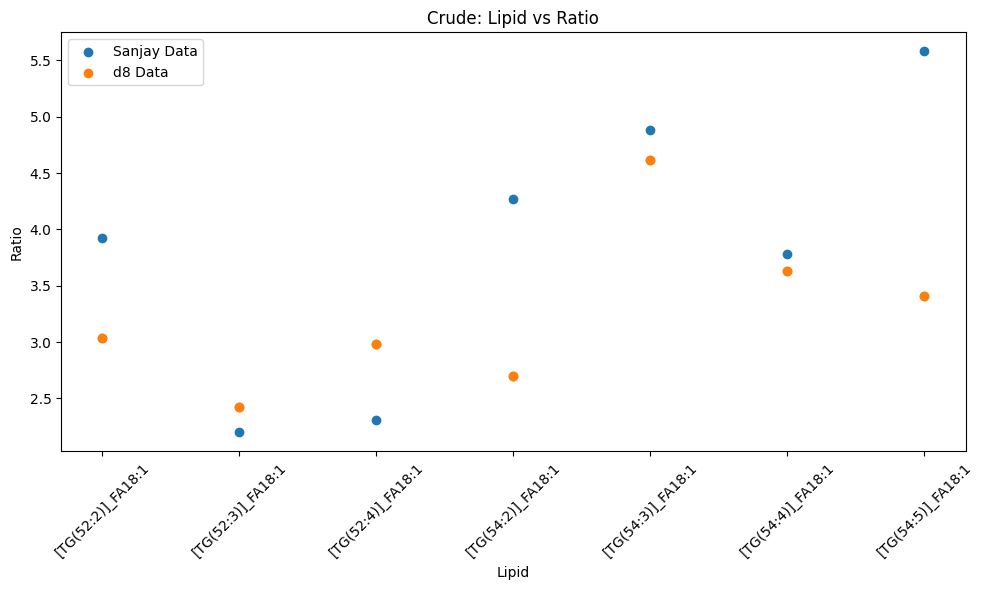

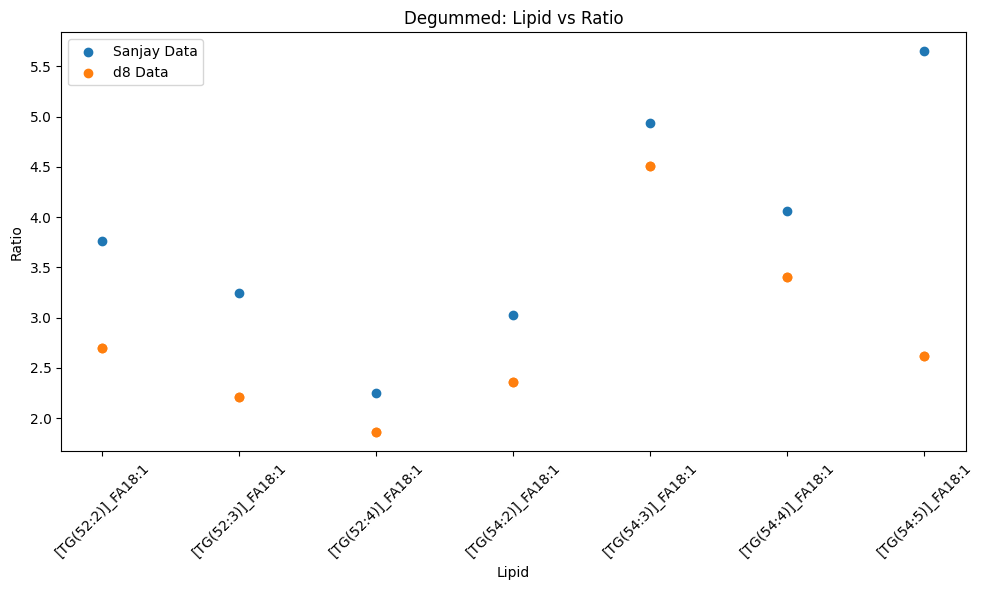

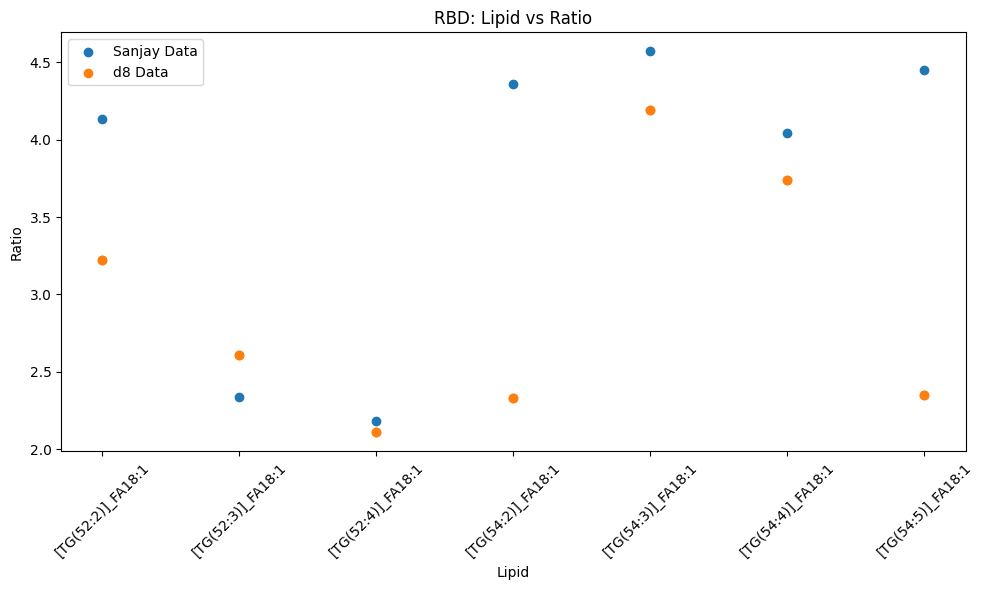

In [2428]:
d9 = d8.copy()
#delete TG(50:3) and TG(52:5) and TG(54:6)
d9 = d9[~d9['Lipid'].str.contains('TG\(53:0\)')]
d9 = d9[~d9['Lipid'].str.contains('TG\(52:5\)')]
d9 = d9[~d9['Lipid'].str.contains('TG\(54:6\)')]

# Function to create a combined scatter plot
def create_combined_scatter_plot(df1, df2, x_column_df1, y_column_df1, x_column_df2, y_column_df2, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[x_column_df1], df1[y_column_df1], label='Sanjay Data')
    plt.scatter(df2[x_column_df2], df2[y_column_df2], label='d8 Data')
    plt.xlabel('Lipid')
    plt.ylabel('Ratio')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Filter d8 DataFrame for each category
df_crude_d9 = d9[d9['Purity'] == 'Crude']
df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
df_rbd_d9 = d9[d9['Purity'] == 'RBD']

# Plotting combined scatter plots for Crude, Degummed, and RBD
create_combined_scatter_plot(sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'Crude: Lipid vs Ratio')
create_combined_scatter_plot(sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'Degummed: Lipid vs Ratio')
create_combined_scatter_plot(sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'RBD: Lipid vs Ratio')


In [2429]:
# d9

# Plot all the areas

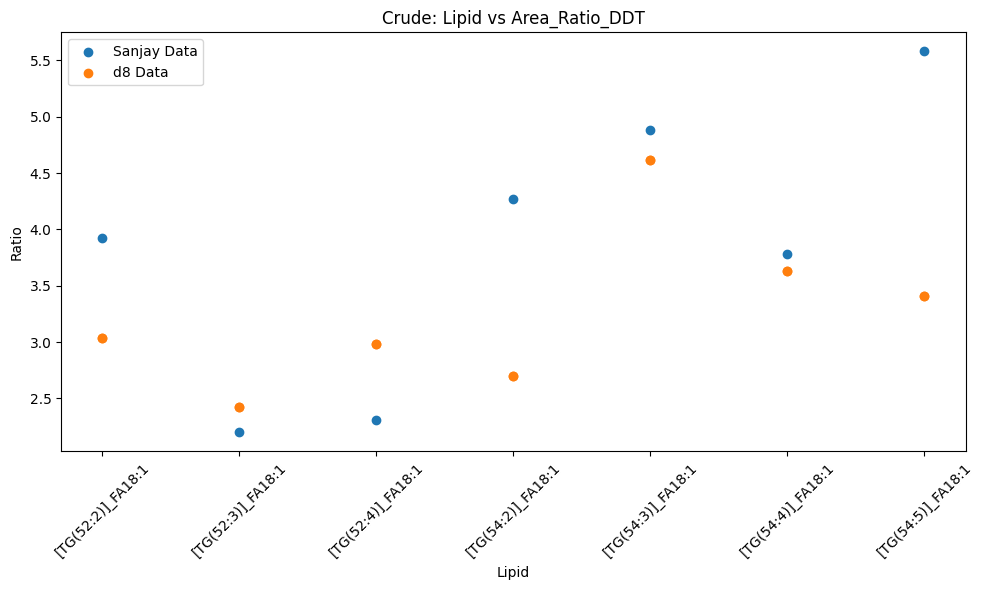

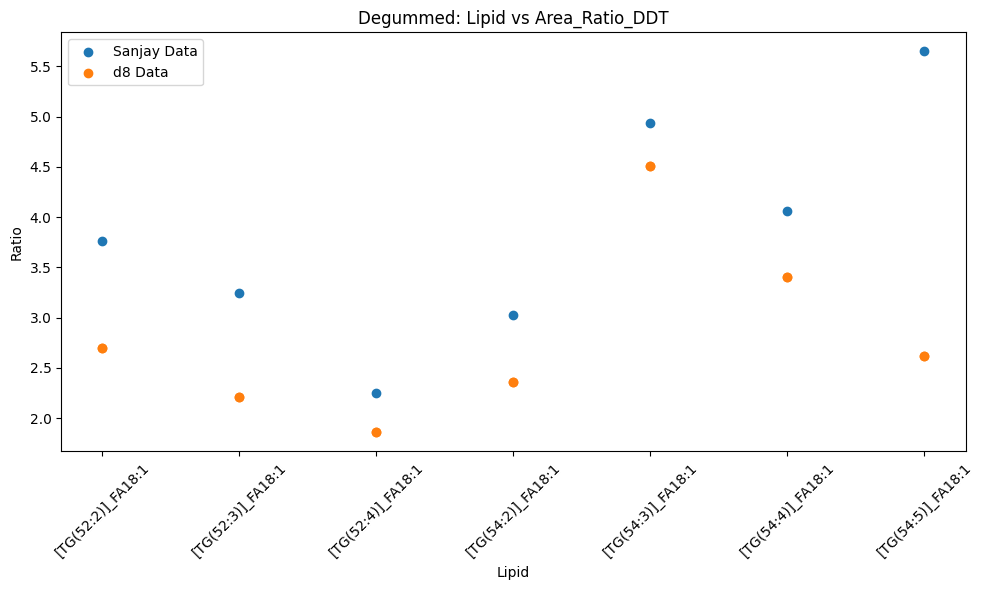

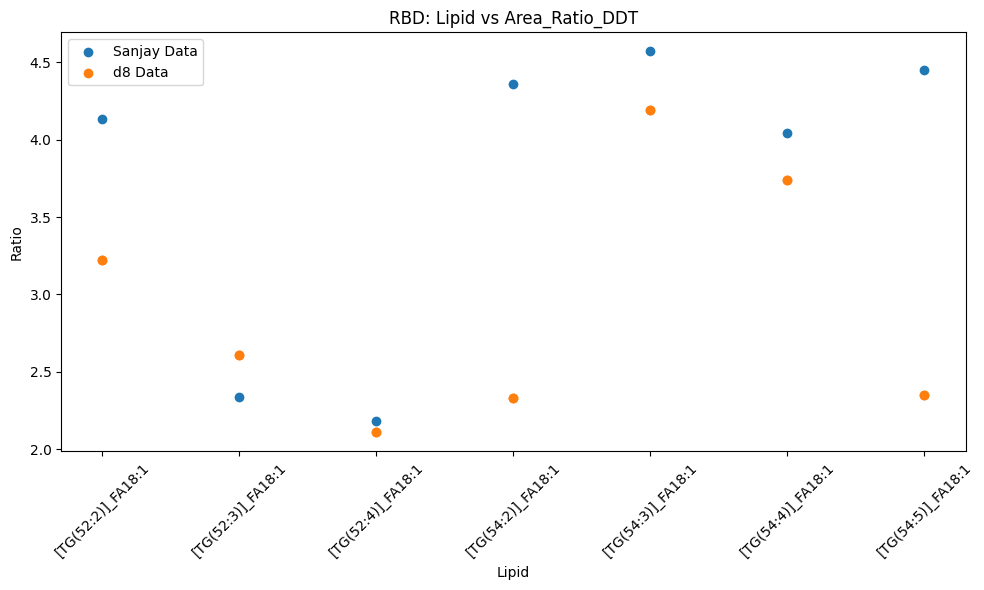

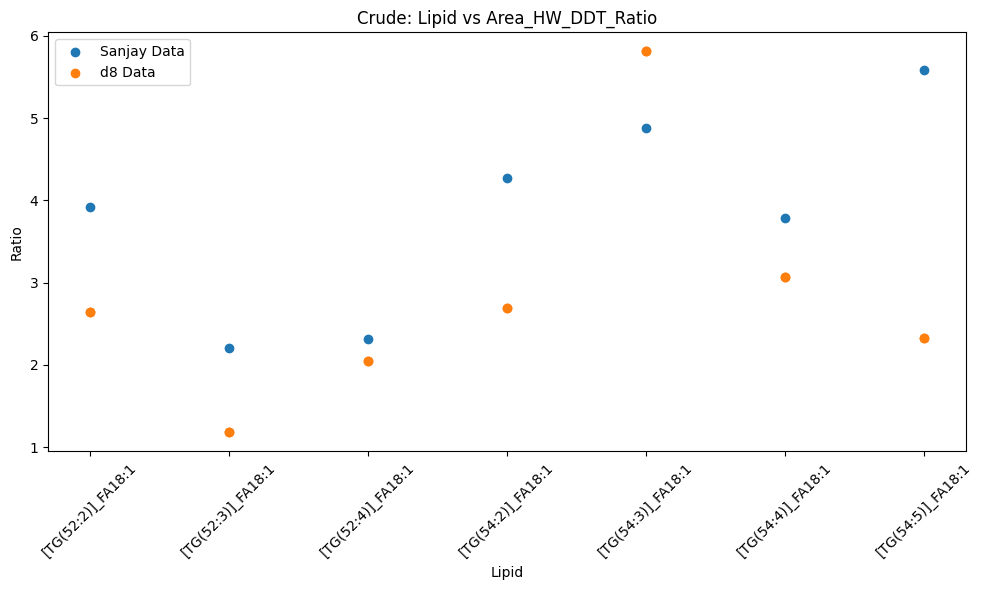

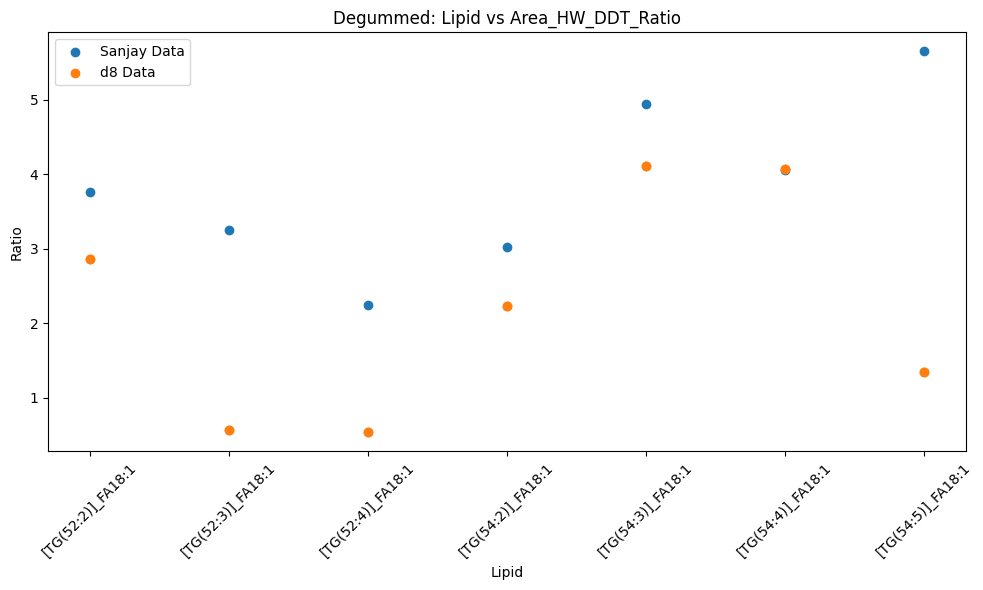

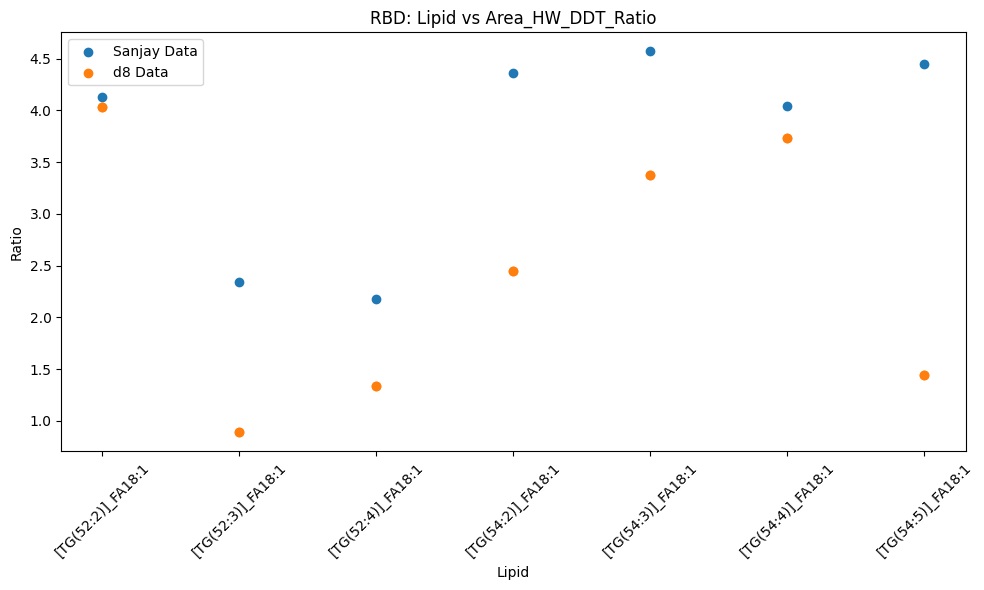

In [2430]:
# Assuming 'd8', 'd9', and 'caitlin' DataFrames are already defined and contain the necessary data

# Function to create a combined scatter plot
def create_combined_scatter_plot(df1, df2, x_column_df1, y_column_df1, x_column_df2, y_column_df2, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[x_column_df1], df1[y_column_df1], label='Sanjay Data')
    plt.scatter(df2[x_column_df2], df2[y_column_df2], label='d8 Data')
    plt.xlabel('Lipid')
    plt.ylabel('Ratio')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Filter d9 DataFrame for each category
df_crude_d9 = d9[d9['Purity'] == 'Crude']
df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
df_rbd_d9 = d9[d9['Purity'] == 'RBD']


# # Column names for the different area ratio columns
# area_ratio_columns = ['Area_Ratio', 'Area_Ratio_DDT', 'Area_HW_Ratio', 'Area_HW_DDT_Ratio']
# Column names for the different area ratio columns
area_ratio_columns = ['Area_Ratio_DDT', 'Area_HW_DDT_Ratio']

# # Plotting combined scatter plots for each area ratio column and for each purity category
for area_ratio_column in area_ratio_columns:
    create_combined_scatter_plot(sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Lipid', area_ratio_column, f'Crude: Lipid vs {area_ratio_column}')
    create_combined_scatter_plot(sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Lipid', area_ratio_column, f'Degummed: Lipid vs {area_ratio_column}')
    create_combined_scatter_plot(sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'Lipid', area_ratio_column, f'RBD: Lipid vs {area_ratio_column}')


In [2431]:
# # Function to create scatter plots for the 'Crude', 'Degummed', and 'RBD' categories
# def plot_n9n7_values(df1, df2, lipid_column, value_column, title):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df1[lipid_column], df1[value_column], label='Sanjay Data')
#     plt.scatter(df2[lipid_column], df2[value_column], label='Caitlin Data', alpha=0.6)
#     plt.xlabel('Lipid')
#     plt.ylabel(f'{value_column} Ratio')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Now we will plot for each of the 'Crude', 'Degummed', and 'RBD' categories separately.
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'Crude n-9/n-7', 'Crude n-9/n-7: Lipid vs Ratio')
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'Degummed n-9/n-7', 'Degummed n-9/n-7: Lipid vs Ratio')
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'RBD n-9/n-7', 'RBD n-9/n-7: Lipid vs Ratio')

In [2432]:
# # Simulate deletion of certain rows in 'd9' based on 'Lipid' column content
# d9 = d8.copy()
# d9 = d9[~d9['Lipid'].str.contains('52:5')]
# d9 = d9[~d9['Lipid'].str.contains('54:6')]
# d9 = d9[~d9['Lipid'].str.contains('53:0')]

# # Adjusting the plotting function to include 'd9' DataFrame
# def create_combined_scatter_plot(df1, df2, df3, x_column, y_column_df1, y_column_df2, y_column_df3, title):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df1[x_column], df1[y_column_df1], label='Caitlin Manual', alpha=0.7, marker='p')
#     plt.scatter(df2[x_column], df2[y_column_df2], label='Sanjay Manual', alpha=0.7, marker='s')
#     plt.scatter(df3[x_column], df3[y_column_df3], label='Claw', alpha=0.4)
#     plt.xlabel('Lipid')
#     plt.ylabel('Ratio')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Filter 'd9' DataFrame for each purity category
# df_crude_d9 = d9[d9['Purity'] == 'Crude']
# df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
# df_rbd_d9 = d9[d9['Purity'] == 'RBD']



# # Plotting combined scatter plots for Crude, Degummed, and RBD
# create_combined_scatter_plot(caitlin, sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Crude: Lipid vs Ratio')
# create_combined_scatter_plot(caitlin, sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Degummed: Lipid vs Ratio')
# create_combined_scatter_plot(caitlin, sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'RBD n-9/n-7', 'Area_Ratio_DDT', 'RBD: Lipid vs Ratio')

In [2433]:
def print_lipid_ratios(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, category):
    print(f"--- {category} Data ---")
    print("Sanjay Data\t\t\tDDT Data\t\t\tDDT_HW Data")
    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else "N/A"
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else "N/A"
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else "N/A"
        print(f"{lipid}: {value_df1}\t\t{lipid}: {value_df2}\t\t{lipid}: {value_df3}")
    print("\n")

# Filter d8 DataFrame for each category
df_crude_d9 = d8[d8['Purity'] == 'Crude']
df_degummed_d9 = d8[d8['Purity'] == 'Degummed']
df_rbd_d9 = d8[d8['Purity'] == 'RBD']

# Area_Ratio_DDT	Area_Ratio	Area_HW_Ratio	Area_DDT_Ratio	Area_HW_DDT_Ratio
# Printing Lipid and Ratio values
print_lipid_ratios(sanjay, df_crude_d9, df_crude_d9, 'Crude n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'Crude')
print_lipid_ratios(sanjay, df_degummed_d9, df_degummed_d9, 'Degummed n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'Degummed')
print_lipid_ratios(sanjay, df_rbd_d9, df_rbd_d9, 'RBD n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'RBD')


--- Crude Data ---
Sanjay Data			DDT Data			DDT_HW Data
[TG(52:2)]_FA18:1: 3.92		[TG(52:2)]_FA18:1: 3.04		[TG(52:2)]_FA18:1: 2.64
[TG(52:3)]_FA18:1: 2.2		[TG(52:3)]_FA18:1: 2.42		[TG(52:3)]_FA18:1: 1.18
[TG(52:4)]_FA18:1: 2.31		[TG(52:4)]_FA18:1: 2.98		[TG(52:4)]_FA18:1: 2.04
[TG(54:2)]_FA18:1: 4.27		[TG(54:2)]_FA18:1: 2.7		[TG(54:2)]_FA18:1: 2.69
[TG(54:3)]_FA18:1: 4.88		[TG(54:3)]_FA18:1: 4.62		[TG(54:3)]_FA18:1: 5.81
[TG(54:4)]_FA18:1: 3.78		[TG(54:4)]_FA18:1: 3.63		[TG(54:4)]_FA18:1: 3.07
[TG(54:5)]_FA18:1: 5.58		[TG(54:5)]_FA18:1: 3.41		[TG(54:5)]_FA18:1: 2.33


--- Degummed Data ---
Sanjay Data			DDT Data			DDT_HW Data
[TG(52:2)]_FA18:1: 3.76		[TG(52:2)]_FA18:1: 2.7		[TG(52:2)]_FA18:1: 2.87
[TG(52:3)]_FA18:1: 3.25		[TG(52:3)]_FA18:1: 2.21		[TG(52:3)]_FA18:1: 0.57
[TG(52:4)]_FA18:1: 2.25		[TG(52:4)]_FA18:1: 1.86		[TG(52:4)]_FA18:1: 0.54
[TG(54:2)]_FA18:1: 3.03		[TG(54:2)]_FA18:1: 2.36		[TG(54:2)]_FA18:1: 2.24
[TG(54:3)]_FA18:1: 4.94		[TG(54:3)]_FA18:1: 4.51		[TG(54:3)]_FA18:1: 4.1

In [2434]:
def print_lipid_ratios_diff(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, category):
    print(f"--- {category} Data Differences ---")
    print("Lipid\t\t\tSanjay vs DDT\t\tSanjay vs DDT_HW")
    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else None
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else None
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else None
        
        diff_ddt = "N/A" if value_df1 is None or value_df2 is None else abs(round(value_df1 - value_df2, 2))
        diff_ddt_hw = "N/A" if value_df1 is None or value_df3 is None else abs(round(value_df1 - value_df3, 2))
        
        print(f"{lipid}\t\t{diff_ddt}\t\t\t{diff_ddt_hw}")
    print("\n")

# Filter d8 DataFrame for each category
df_crude_d8 = d8[d8['Purity'] == 'Crude']
df_degummed_d8 = d8[d8['Purity'] == 'Degummed']
df_rbd_d8 = d8[d8['Purity'] == 'RBD']

# Printing Lipid and Ratio differences
print_lipid_ratios_diff(sanjay, df_crude_d8, df_crude_d8, 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Crude')
print_lipid_ratios_diff(sanjay, df_degummed_d8, df_degummed_d8, 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Degummed')
print_lipid_ratios_diff(sanjay, df_rbd_d8, df_rbd_d8, 'RBD n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'RBD')



--- Crude Data Differences ---
Lipid			Sanjay vs DDT		Sanjay vs DDT_HW
[TG(52:2)]_FA18:1		0.88			1.28
[TG(52:3)]_FA18:1		0.22			1.02
[TG(52:4)]_FA18:1		0.67			0.27
[TG(54:2)]_FA18:1		1.57			1.58
[TG(54:3)]_FA18:1		0.26			0.93
[TG(54:4)]_FA18:1		0.15			0.71
[TG(54:5)]_FA18:1		2.17			3.25


--- Degummed Data Differences ---
Lipid			Sanjay vs DDT		Sanjay vs DDT_HW
[TG(52:2)]_FA18:1		1.06			0.89
[TG(52:3)]_FA18:1		1.04			2.68
[TG(52:4)]_FA18:1		0.39			1.71
[TG(54:2)]_FA18:1		0.67			0.79
[TG(54:3)]_FA18:1		0.43			0.83
[TG(54:4)]_FA18:1		0.66			0.01
[TG(54:5)]_FA18:1		3.03			4.3


--- RBD Data Differences ---
Lipid			Sanjay vs DDT		Sanjay vs DDT_HW
[TG(52:2)]_FA18:1		0.91			0.1
[TG(52:3)]_FA18:1		0.27			1.45
[TG(52:4)]_FA18:1		0.07			0.84
[TG(54:2)]_FA18:1		2.03			1.91
[TG(54:3)]_FA18:1		0.38			1.19
[TG(54:4)]_FA18:1		0.3			0.31
[TG(54:5)]_FA18:1		2.1			3.01




In [2435]:
def create_compare_df_with_purity(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, purity_category):
    compare_data = []

    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else None
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else None
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else None

        diff_ddt = None if value_df1 is None or value_df2 is None else abs(value_df1 - value_df2)
        diff_ddt_hw = None if value_df1 is None or value_df3 is None else abs(value_df1 - value_df3)

        compare_data.append({'Lipid': lipid, 'Purity': purity_category, 'Sanjay_vs_DDT': diff_ddt, 'Sanjay_vs_DDT_HW': diff_ddt_hw})

    compare_df = pd.DataFrame(compare_data)
    return compare_df

# Create DataFrames to compare differences, including Purity category
compare_crude = create_compare_df_with_purity(sanjay, df_crude_d8, df_crude_d8, 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Crude')
compare_degummed = create_compare_df_with_purity(sanjay, df_degummed_d8, df_degummed_d8, 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Degummed')
compare_rbd = create_compare_df_with_purity(sanjay, df_rbd_d8, df_rbd_d8, 'RBD n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'RBD')

# Concatenate the different purity category DataFrames
compare_df = pd.concat([compare_crude, compare_degummed, compare_rbd])

# Display the combined DataFrame
compare_df


Lipid    Purity  Sanjay_vs_DDT  Sanjay_vs_DDT_HW
0  [TG(52:2)]_FA18:1     Crude           0.88              1.28
1  [TG(52:3)]_FA18:1     Crude           0.22              1.02
2  [TG(52:4)]_FA18:1     Crude           0.67              0.27
3  [TG(54:2)]_FA18:1     Crude           1.57              1.58
4  [TG(54:3)]_FA18:1     Crude           0.26              0.93
5  [TG(54:4)]_FA18:1     Crude           0.15              0.71
6  [TG(54:5)]_FA18:1     Crude           2.17              3.25
0  [TG(52:2)]_FA18:1  Degummed           1.06              0.89
1  [TG(52:3)]_FA18:1  Degummed           1.04              2.68
2  [TG(52:4)]_FA18:1  Degummed           0.39              1.71
3  [TG(54:2)]_FA18:1  Degummed           0.67              0.79
4  [TG(54:3)]_FA18:1  Degummed           0.43              0.83
5  [TG(54:4)]_FA18:1  Degummed           0.66              0.01
6  [TG(54:5)]_FA18:1  Degummed           3.03              4.30
0  [TG(52:2)]_FA18:1       RBD           0.91              0.10
1  [TG(52:3)]_FA18:1       RBD           0.27              1.45
2  [TG(52:4)]_FA18:1       RBD           0.07              0.84
3  [TG(54:2)]_FA18:1       RBD           2.03              1.91
4  [TG(54:3)]_FA18:1       RBD           0.38              1.19
5  [TG(54:4)]_FA18:1       RBD           0.30              0.31
6  [TG(54:5)]_FA18:1       RBD           2.10              3.01

In [2436]:
def calculate_std_dev_across_purities_for_column(df, column_name):
    """
    Calculate the standard deviation across different purity categories for each Lipid.
    """
    # Group by Lipid and aggregate the column into a list
    grouped = df.groupby('Lipid')[column_name].apply(list)

    # Calculate the standard deviation for each group, handling non-numeric values
    std_dev = grouped.apply(lambda x: np.std([y for y in x if isinstance(y, (int, float)) and y is not None]))

    return std_dev

# Assuming the 'compare_df' DataFrame has been created and contains 'Lipid', 'Sanjay_vs_DDT', 'Sanjay_vs_DDT_HW' columns

# Calculate standard deviation across purities for 'Sanjay_vs_DDT'
std_dev_sanjay_vs_ddt = calculate_std_dev_across_purities_for_column(compare_df, 'Sanjay_vs_DDT')
#round to 2 decimal places
std_dev_sanjay_vs_ddt = std_dev_sanjay_vs_ddt.round(2)


# Calculate standard deviation across purities for 'Sanjay_vs_DDT_HW'
std_dev_sanjay_vs_ddt_hw = calculate_std_dev_across_purities_for_column(compare_df, 'Sanjay_vs_DDT_HW')
#round to 2 decimal places
std_dev_sanjay_vs_ddt_hw = std_dev_sanjay_vs_ddt_hw.round(2)

# Create new columns for standard deviation in 'compare_df'
compare_df['Std Dev Sanjay_vs_DDT'] = compare_df['Lipid'].map(std_dev_sanjay_vs_ddt)
compare_df['Std Dev Sanjay_vs_DDT_HW'] = compare_df['Lipid'].map(std_dev_sanjay_vs_ddt_hw)

def calculate_avg_std_dev_for_each(df, std_dev_columns):
    """
    Calculate the average of standard deviations for each specified column and add as a new column.
    """
    for col in std_dev_columns:
        avg_col_name = f'Avg Std Dev {col}'
        df[avg_col_name] = df[col].mean()
    return df

# Assuming the 'compare_df' DataFrame has been updated with 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'

# Calculate the average of standard deviations for 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'
compare_df = calculate_avg_std_dev_for_each(compare_df, ['Std Dev Sanjay_vs_DDT', 'Std Dev Sanjay_vs_DDT_HW'])
#round to 2 decimal places
compare_df = compare_df.round(2)

# Calculate the average of standard deviations for 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'
avg_std_dev_ddt = compare_df['Std Dev Sanjay_vs_DDT'].mean().round(2)
avg_std_dev_ddt_hw = compare_df['Std Dev Sanjay_vs_DDT_HW'].mean().round(2)

# Print the average standard deviations to the terminal
print(f"Average Standard Deviation for Sanjay_vs_DDT: {avg_std_dev_ddt}")
print(f"Average Standard Deviation for Sanjay_vs_DDT_HW: {avg_std_dev_ddt_hw}")



# Display the updated DataFrame with the new average standard deviation columns
compare_df






Average Standard Deviation for Sanjay_vs_DDT: 0.28
Average Standard Deviation for Sanjay_vs_DDT_HW: 0.46


Lipid    Purity  Sanjay_vs_DDT  Sanjay_vs_DDT_HW  \
0  [TG(52:2)]_FA18:1     Crude           0.88              1.28   
1  [TG(52:3)]_FA18:1     Crude           0.22              1.02   
2  [TG(52:4)]_FA18:1     Crude           0.67              0.27   
3  [TG(54:2)]_FA18:1     Crude           1.57              1.58   
4  [TG(54:3)]_FA18:1     Crude           0.26              0.93   
5  [TG(54:4)]_FA18:1     Crude           0.15              0.71   
6  [TG(54:5)]_FA18:1     Crude           2.17              3.25   
0  [TG(52:2)]_FA18:1  Degummed           1.06              0.89   
1  [TG(52:3)]_FA18:1  Degummed           1.04              2.68   
2  [TG(52:4)]_FA18:1  Degummed           0.39              1.71   
3  [TG(54:2)]_FA18:1  Degummed           0.67              0.79   
4  [TG(54:3)]_FA18:1  Degummed           0.43              0.83   
5  [TG(54:4)]_FA18:1  Degummed           0.66              0.01   
6  [TG(54:5)]_FA18:1  Degummed           3.03              4.30   
0  [TG(52:2)]_FA18:1       RBD           0.91              0.10   
1  [TG(52:3)]_FA18:1       RBD           0.27              1.45   
2  [TG(52:4)]_FA18:1       RBD           0.07              0.84   
3  [TG(54:2)]_FA18:1       RBD           2.03              1.91   
4  [TG(54:3)]_FA18:1       RBD           0.38              1.19   
5  [TG(54:4)]_FA18:1       RBD           0.30              0.31   
6  [TG(54:5)]_FA18:1       RBD           2.10              3.01   

   Std Dev Sanjay_vs_DDT  Std Dev Sanjay_vs_DDT_HW  \
0                   0.08                      0.49   
1                   0.38                      0.70   
2                   0.25                      0.59   
3                   0.56                      0.47   
4                   0.07                      0.15   
5                   0.21                      0.29   
6                   0.42                      0.56   
0                   0.08                      0.49   
1                   0.38                      0.70   
2                   0.25                      0.59   
3                   0.56                      0.47   
4                   0.07                      0.15   
5                   0.21                      0.29   
6                   0.42                      0.56   
0                   0.08                      0.49   
1                   0.38                      0.70   
2                   0.25                      0.59   
3                   0.56                      0.47   
4                   0.07                      0.15   
5                   0.21                      0.29   
6                   0.42                      0.56   

   Avg Std Dev Std Dev Sanjay_vs_DDT  Avg Std Dev Std Dev Sanjay_vs_DDT_HW  
0                               0.28                                  0.46  
1                               0.28                                  0.46  
2                               0.28                                  0.46  
3                               0.28                                  0.46  
4                               0.28                                  0.46  
5                               0.28                                  0.46  
6                               0.28                                  0.46  
0                               0.28                                  0.46  
1                               0.28                                  0.46  
2                               0.28                                  0.46  
3                               0.28                                  0.46  
4                               0.28                                  0.46  
5                               0.28                                  0.46  
6                               0.28                                  0.46  
0                               0.28                                  0.46  
1                               0.28                                  0.46  
2                               0.28      

In [2437]:
import pandas as pd
import numpy as np

def calculate_std_dev(df, column_name):
    """
    Calculate the standard deviation of the specified column across different purity categories for each Lipid.
    """
    # Group by Lipid and aggregate the column into a list
    grouped = df.groupby('Lipid')[column_name].apply(list)

    # Calculate the standard deviation for each group, handling non-numeric values
    std_dev = grouped.apply(lambda x: np.std([y for y in x if isinstance(y, (int, float)) and y is not None]))

    return std_dev
# Assuming 'Area_Ratio_DDT' is the column you are interested in for d8, and 'Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7' for Caitlin
# Combine the different purity dataframes into one for d8
d8_combined = pd.concat([df_crude_d9, df_degummed_d9, df_rbd_d9])
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(53:0\)')]
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(52:5\)')]
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(54:6\)')]

# For Caitlin, ensure the data is structured so that each Lipid has a row for each purity type with the corresponding ratio
# If not, you might need to reshape the data accordingly

# Calculate standard deviation for each Lipid in d8
std_dev_d8 = calculate_std_dev(d8_combined, 'Area_Ratio_DDT')
std_dev_d8_HW = calculate_std_dev(d8_combined, 'Area_HW_DDT_Ratio')
print("Standard Deviation for d8:")
print(std_dev_d8)
print("Standard Deviation for d8_HW:")
print(std_dev_d8_HW)

# Function to calculate standard deviation for each Lipid in 'sanjay'
def calculate_std_dev_for_lipid(row):
    ratios = [row[col] for col in ['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7'] if isinstance(row[col], (int, float))]
    return np.std(ratios)

# Apply the function to each row in the Caitlin DataFrame
sanjay['Std Dev'] = sanjay.apply(calculate_std_dev_for_lipid, axis=1)

# print(sanjay[['Lipid', 'Std Dev']])

Standard Deviation for d8:
Lipid
[TG(52:2)]_FA18:1    0.215613
[TG(52:3)]_FA18:1    0.163367
[TG(52:4)]_FA18:1    0.480023
[TG(54:2)]_FA18:1    0.167796
[TG(54:3)]_FA18:1    0.182392
[TG(54:4)]_FA18:1    0.141657
[TG(54:5)]_FA18:1    0.449765
Name: Area_Ratio_DDT, dtype: float64
Standard Deviation for d8_HW:
Lipid
[TG(52:2)]_FA18:1    0.608331
[TG(52:3)]_FA18:1    0.249132
[TG(52:4)]_FA18:1    0.612826
[TG(54:2)]_FA18:1    0.183848
[TG(54:3)]_FA18:1    1.018048
[TG(54:4)]_FA18:1    0.415157
[TG(54:5)]_FA18:1    0.442292
Name: Area_HW_DDT_Ratio, dtype: float64


In [2438]:
# Calculating the average standard deviation for each DataFrame
avg_std_dev_d8 = std_dev_d8.mean().round(2)
avg_std_dev_sanjay = sanjay['Std Dev'].mean().round(2)
avg_std_dev_d8_HW = std_dev_d8_HW.mean().round(2)

# Print the average standard deviations to the terminal
print(f"Average Differance Standard Deviation for Sanjay_vs_DDT: {avg_std_dev_ddt}")
print(f"Average Differance Standard Deviation for Sanjay_vs_DDT_HW: {avg_std_dev_ddt_hw}")
print('____')
print(f"CLAW Across Purities Std Dev={avg_std_dev_d8}\n"
      f"HW Across Purities Std Dev={avg_std_dev_d8_HW}\n"
      f"Manual Across Purities Std Dev={avg_std_dev_sanjay}")





Average Differance Standard Deviation for Sanjay_vs_DDT: 0.28
Average Differance Standard Deviation for Sanjay_vs_DDT_HW: 0.46
____
CLAW Across Purities Std Dev=0.26
HW Across Purities Std Dev=0.5
Manual Across Purities Std Dev=0.3
